In [this video](https://www.youtube.com/watch?v=ho6JXE3EbZ8) the author explains how to extract various visualizations of what CNNs learn. [Your course site](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/cnn/cnn-example-architectures/visualizing-what-convnets-learn.html) also covers the topic.

Using the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html), train a ResNet-50 based CNN on the classification task of $K=9$ classes (filter out the class `ship`) and create the following visualizations for first, middle and last blocks of ResNet-50. You are free to select a class to showcase such visualizations.

* Visualizing intermediate convnet outputs (“intermediate activations”). This is useful to understand how successive convnet layers transform their input.

* Visualizing convnets filters. This is useful to understand precisely what visual pattern or concept each filter in a convnet is receptive to.

* Visualizing heatmaps of class activation in an image. This is useful to understand which part of an image where identified as belonging to a given class, and thus allows to localize objects in images.

In [38]:
import tensorflow as tf
import keras
from tensorflow.keras import backend as K
import numpy as np
from keras import layers
from keras import models
from keras import optimizers
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import resnet50
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from tensorflow.keras.applications.resnet50 import ResNet50
from matplotlib import pyplot as plt
import os
import sys
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [39]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#Filter out ship (ship is label 8)
k=9
X_train, y_train = X_train[np.where(y_train.reshape(-1) != 8)], y_train[y_train.reshape(-1) != 8]
X_test, y_test = X_test[y_test.reshape(-1) != 8], y_test[y_test.reshape(-1) != 8]
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = tf.keras.applications.resnet50.preprocess_input(X_train)
X_test = tf.keras.applications.resnet50.preprocess_input(X_test)

print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(45000, 32, 32, 3)
(45000, 1)
Shape of test data:
(9000, 32, 32, 3)
(9000, 1)


In [40]:
def classifier(inputs):
    output = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    output = tf.keras.layers.Flatten()(output)
    output = tf.keras.layers.Dense(1024, activation="relu")(output)
    output = tf.keras.layers.Dense(512, activation="relu")(output)
    output = tf.keras.layers.Dense(10, activation="softmax", name="classification")(output)
    return output

In [41]:
resmodel = tf.keras.applications.ResNet50(
    input_shape=(32,32,3),
    pooling='avg',
    classes=10,
    weights='imagenet',
    include_top=False)

for layer in resmodel.layers:
    layer.trainable=False

flattened = tf.keras.layers.Flatten()(resmodel.output)
fc1=tf.keras.layers.Dense(128, activation='relu', name='Dense1')(flattened)
fc2=tf.keras.layers.Dense(10, activation='softmax', name='Dense2')(fc1)
model = tf.keras.models.Model(inputs=resmodel.input,outputs=fc2)

model.summary()

Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_5[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [42]:
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [43]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=20, batch_size=256, verbose=1)

Epoch 1/20
176/176 [==============================] - 10s 39ms/step - loss: 1.5043 - acc: 0.5168 - val_loss: 1.2102 - val_acc: 0.5811
Epoch 2/20
176/176 [==============================] - 5s 31ms/step - loss: 1.1082 - acc: 0.6129 - val_loss: 1.1086 - val_acc: 0.6172
Epoch 3/20
176/176 [==============================] - 5s 30ms/step - loss: 1.0123 - acc: 0.6453 - val_loss: 1.0671 - val_acc: 0.6328
Epoch 4/20
176/176 [==============================] - 5s 30ms/step - loss: 0.9536 - acc: 0.6655 - val_loss: 1.0450 - val_acc: 0.6358
Epoch 5/20
176/176 [==============================] - 5s 30ms/step - loss: 0.9108 - acc: 0.6790 - val_loss: 1.0257 - val_acc: 0.6451
Epoch 6/20
176/176 [==============================] - 5s 30ms/step - loss: 0.8763 - acc: 0.6921 - val_loss: 1.0158 - val_acc: 0.6503
Epoch 7/20
176/176 [==============================] - 5s 30ms/step - loss: 0.8476 - acc: 0.7028 - val_loss: 1.0076 - val_acc: 0.6516
Epoch 8/20
176/176 [==============================] - 5s 31ms/step -

In [44]:
model.save('cifar_resnet50.keras')

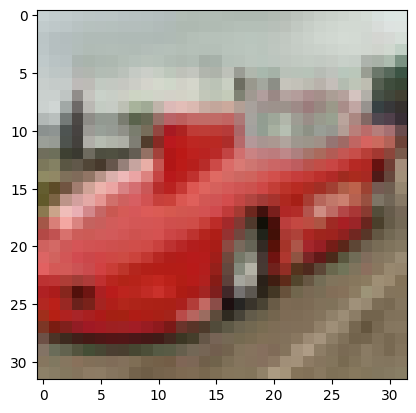

car  


In [45]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_test, y_test = X_test[y_test.reshape(-1) != 8], y_test[y_test.reshape(-1) != 8]
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

sample_img = X_test[100]
label = y_test[100]
plt.imshow((sample_img).astype(np.uint8))
sample_img = sample_img.astype('float32')
sample_img = tf.keras.applications.resnet50.preprocess_input(sample_img)
sample_img = np.expand_dims(sample_img, axis=0)
plt.show()
sample_img /= 255
print(f'{classes[label[0]]:5s}')

In [46]:
layer_outputs = []
layer_names = []
for layer in model.layers:
  if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
    layer_outputs.append(layer.output)
    layer_names.append(layer.name)

#splice into block 1, 3, and 6
block1_names = []
block1_outputs = []
for layer, out in zip(layer_names, layer_outputs):
  if 'block1' in layer:
    if 'conv5' not in layer:
      block1_outputs.append(out)
      block1_names.append(layer)

block3_names = []
block3_outputs = []
for layer, out in zip(layer_names, layer_outputs):
  if 'block3' in layer:
    if 'conv5' not in layer:
      block3_outputs.append(out)
      block3_names.append(layer)

block6_names = []
block6_outputs = []
for layer, out in zip(layer_names, layer_outputs):
  if 'block6' in layer:
    if 'conv5' not in layer:
      block6_outputs.append(out)
      block6_names.append(layer)


In [47]:
activation1_model = keras.Model(inputs=model.input, outputs=block1_outputs)
activation3_model = keras.Model(inputs=model.input, outputs=block3_outputs)
activation6_model = keras.Model(inputs=model.input, outputs=block6_outputs)

In [48]:
activations1 = activation1_model.predict(sample_img)
activations3 = activation3_model.predict(sample_img)
activations6 = activation6_model.predict(sample_img)

first_layer_activation = activations1[0]
print(first_layer_activation.shape)

1/1 [==============================] - 1s 673ms/step
(1, 8, 8, 64)


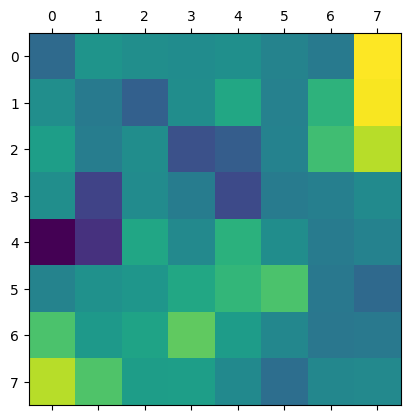

In [49]:
plt.matshow(first_layer_activation[0, :, :, 5], cmap="viridis")

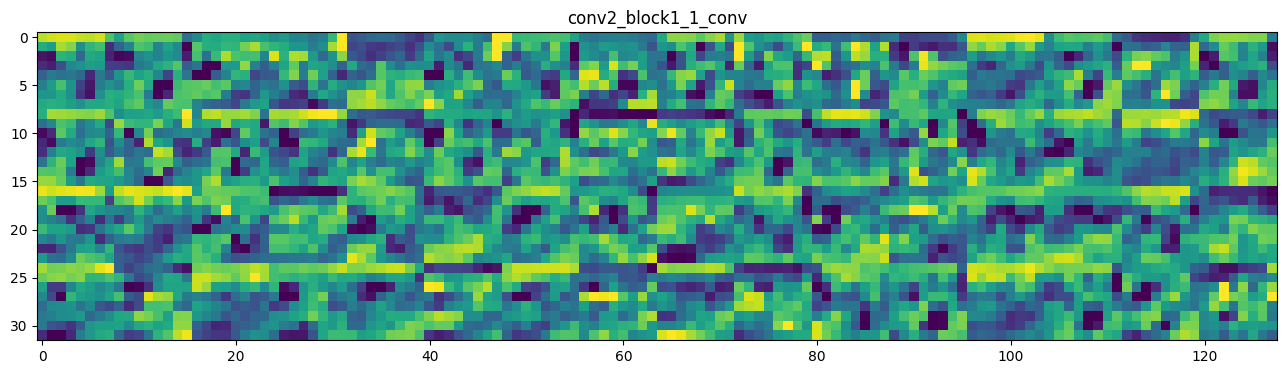

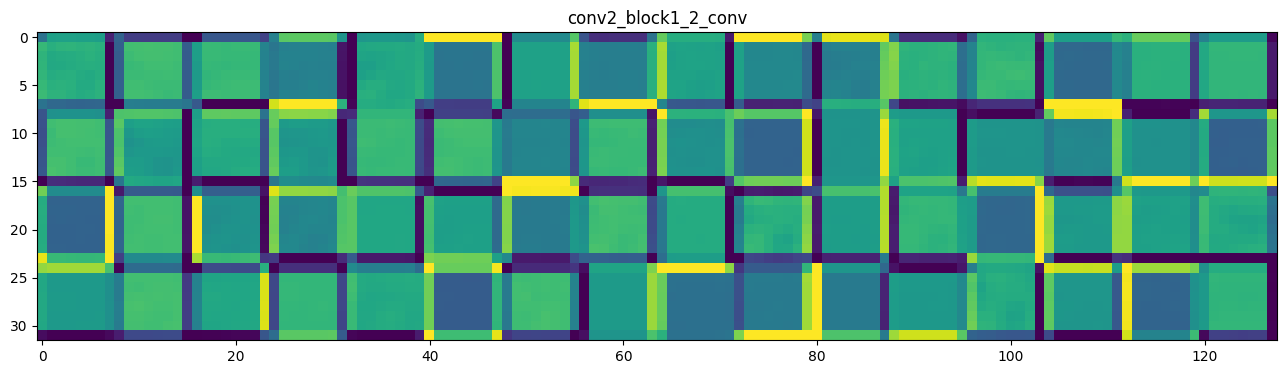

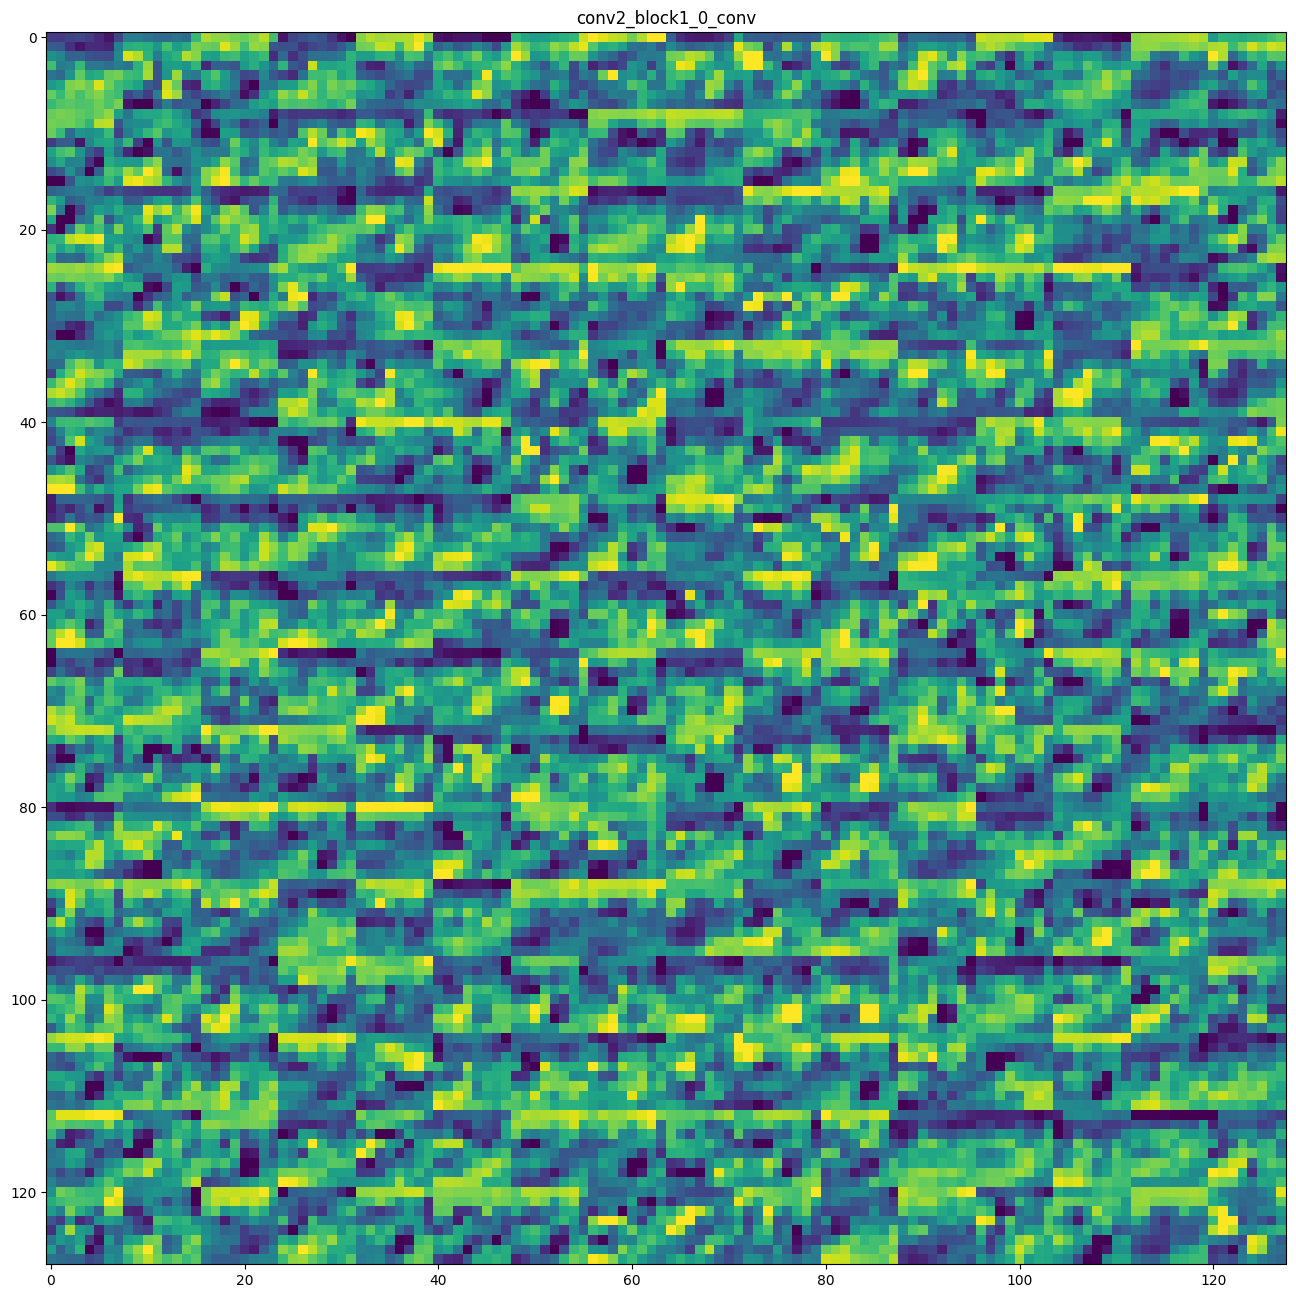

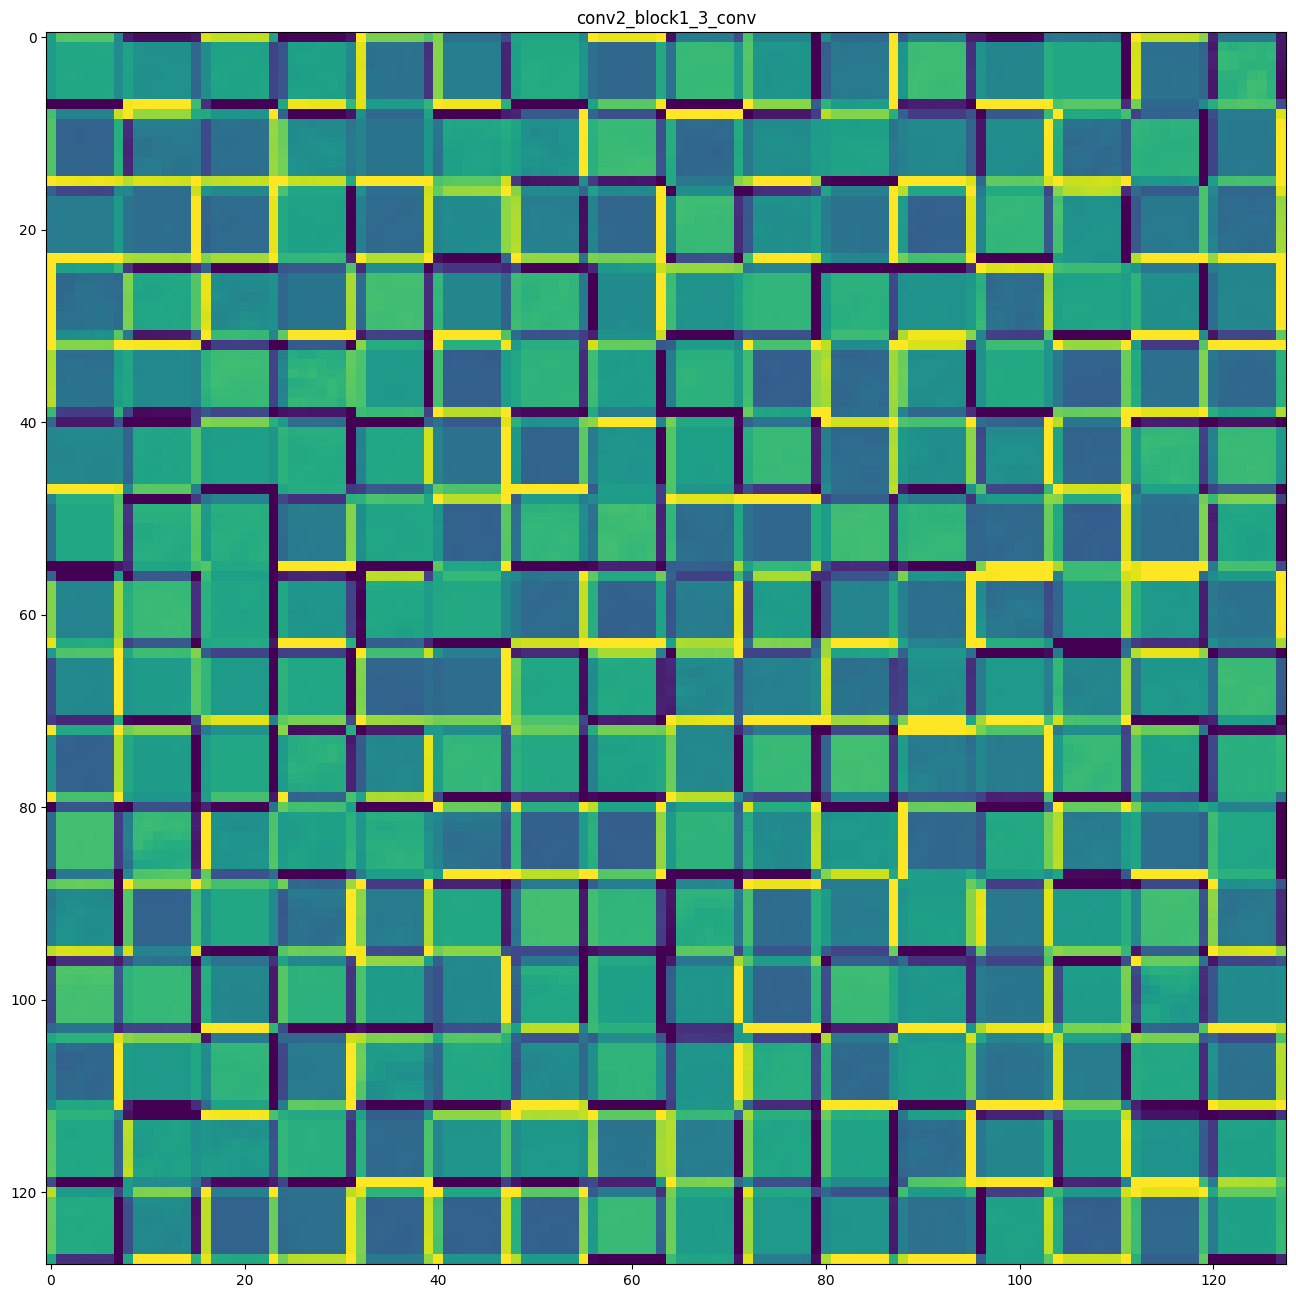

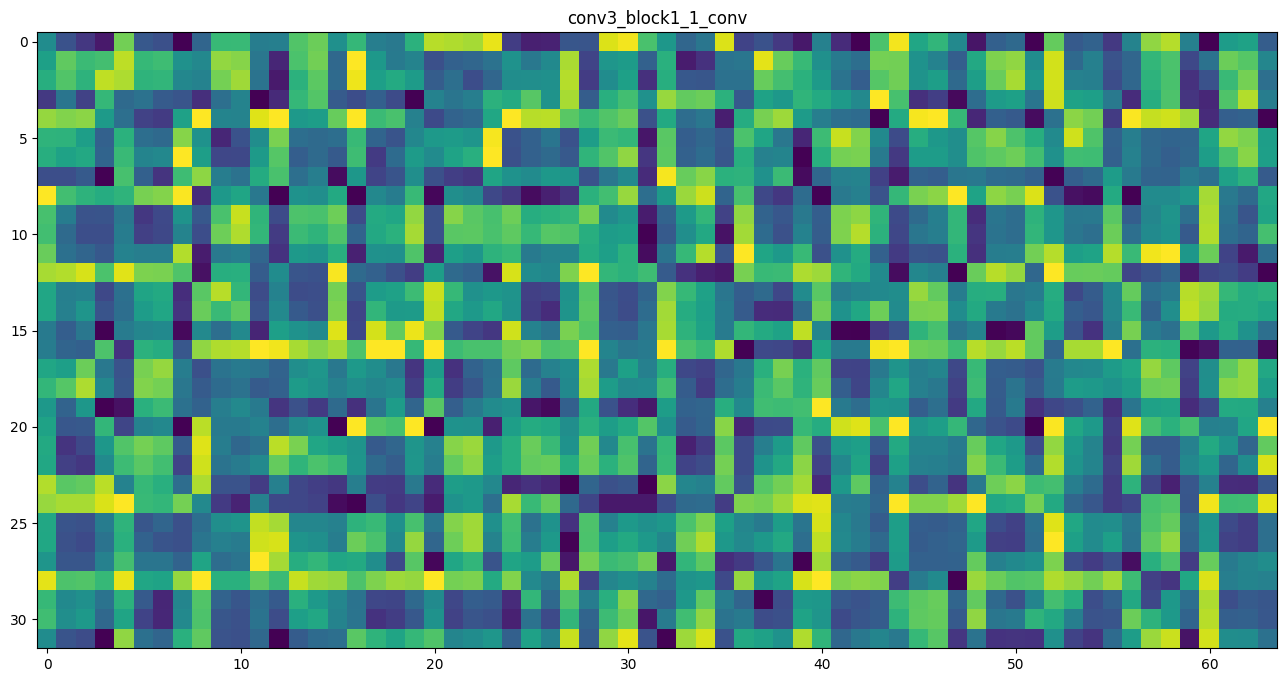

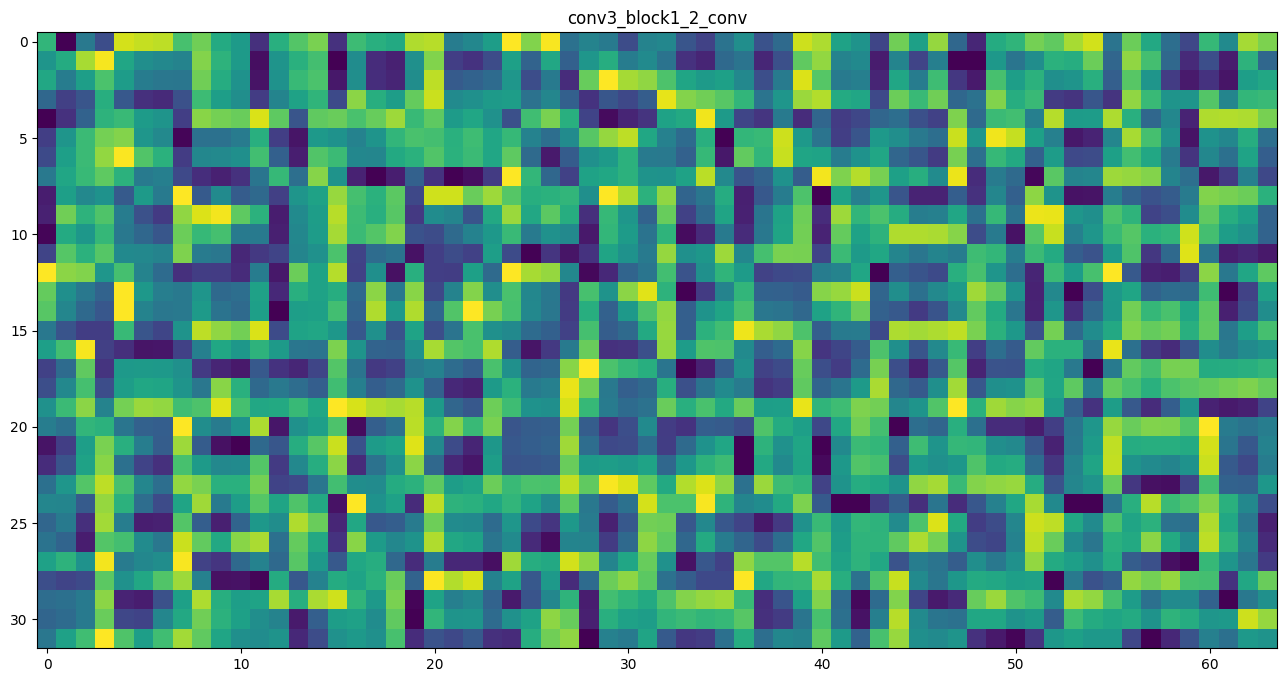

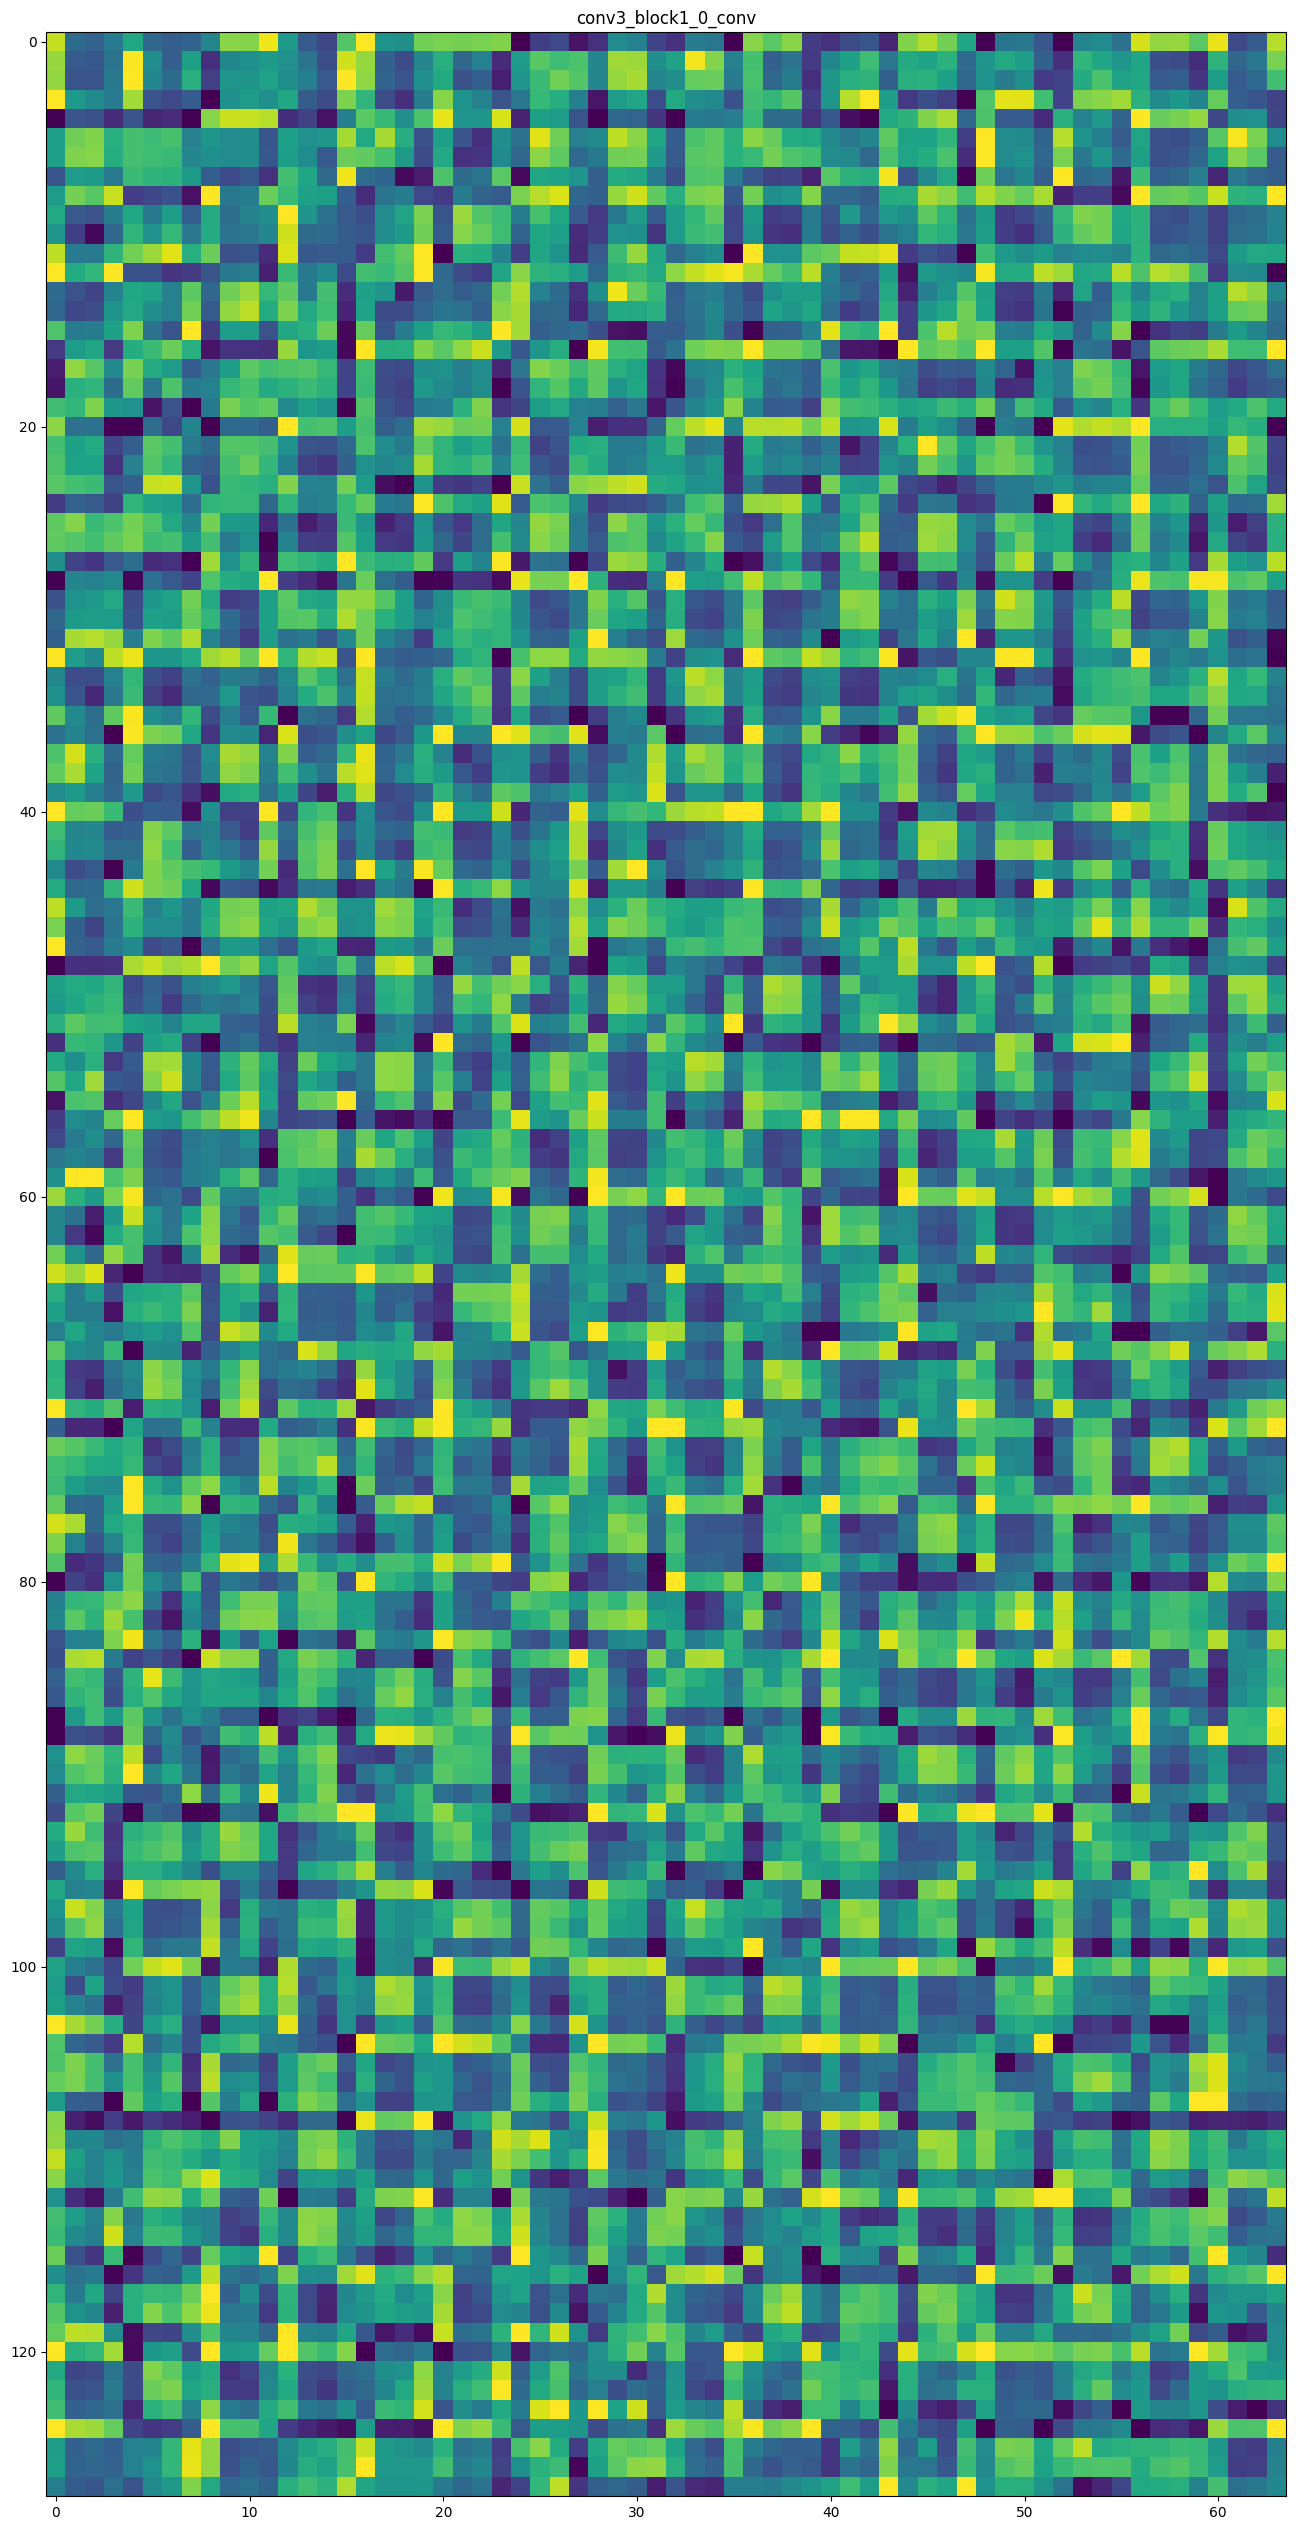

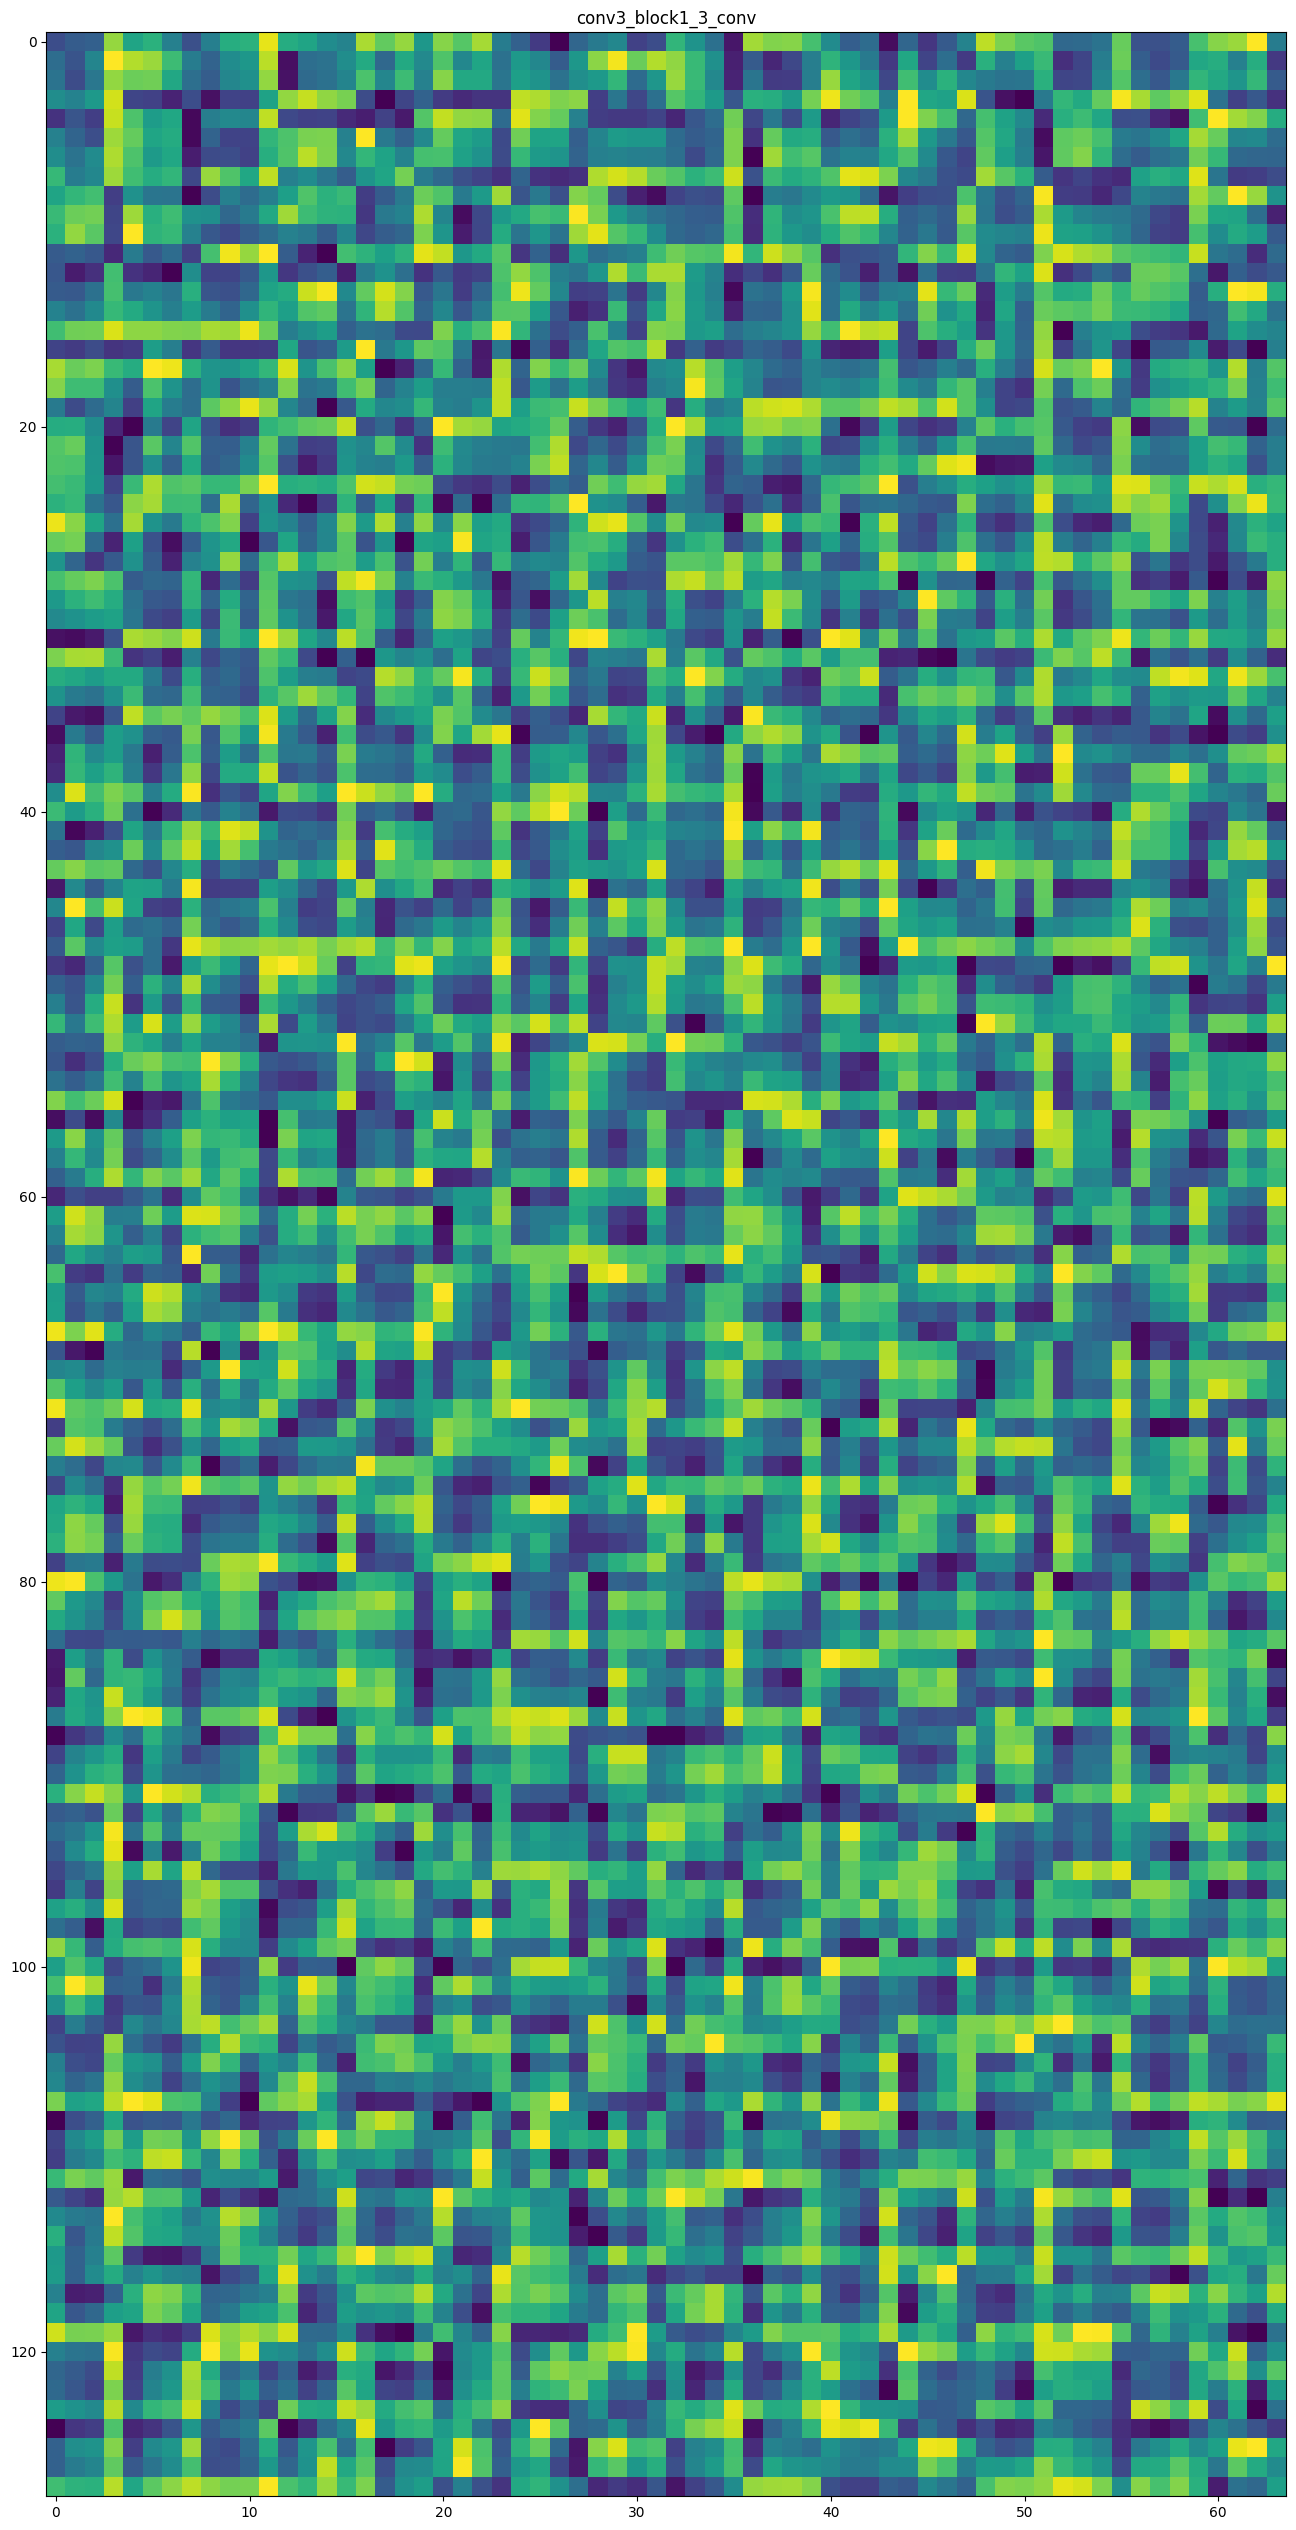

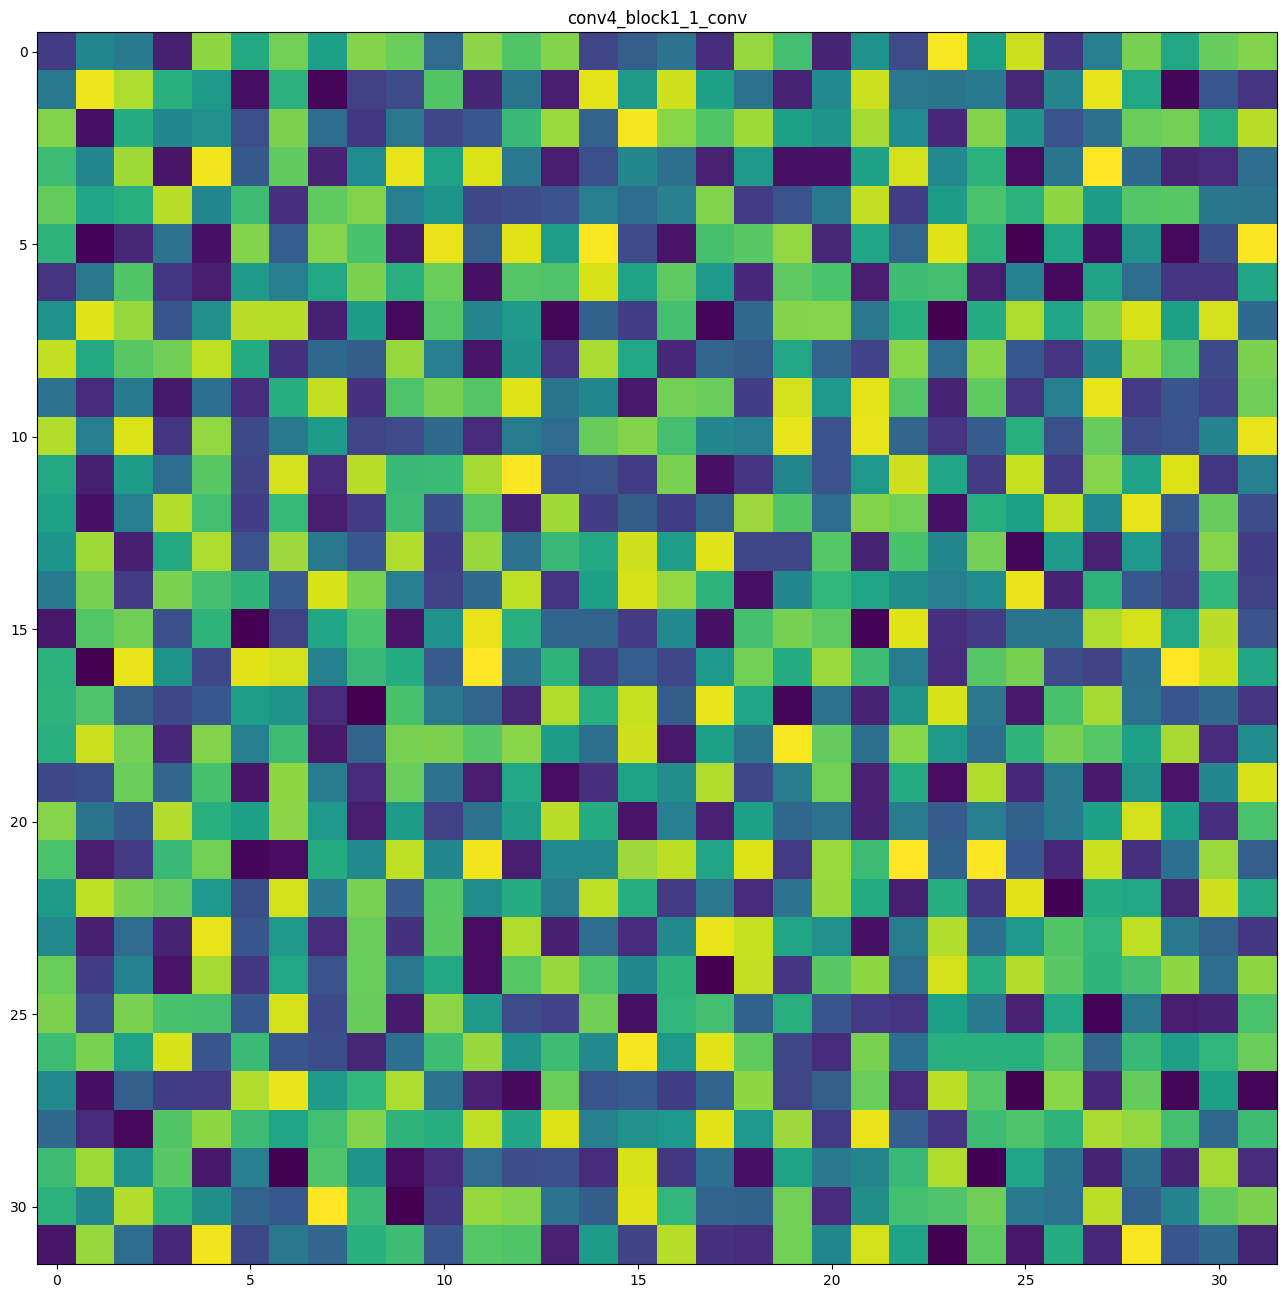

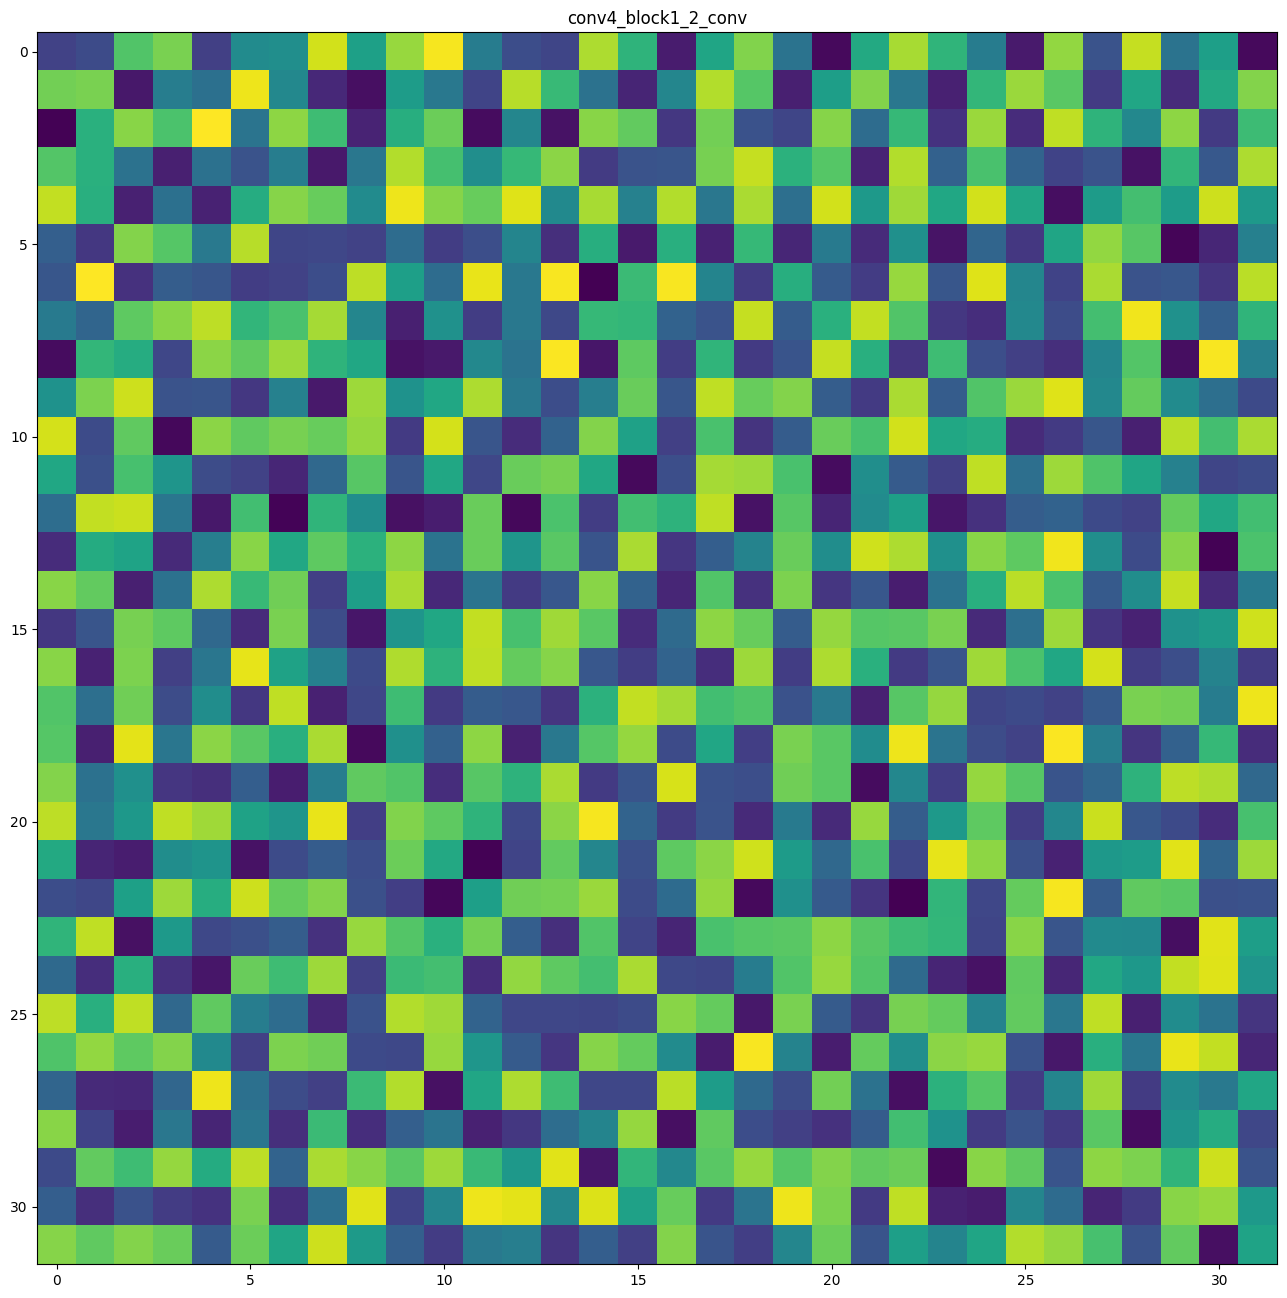

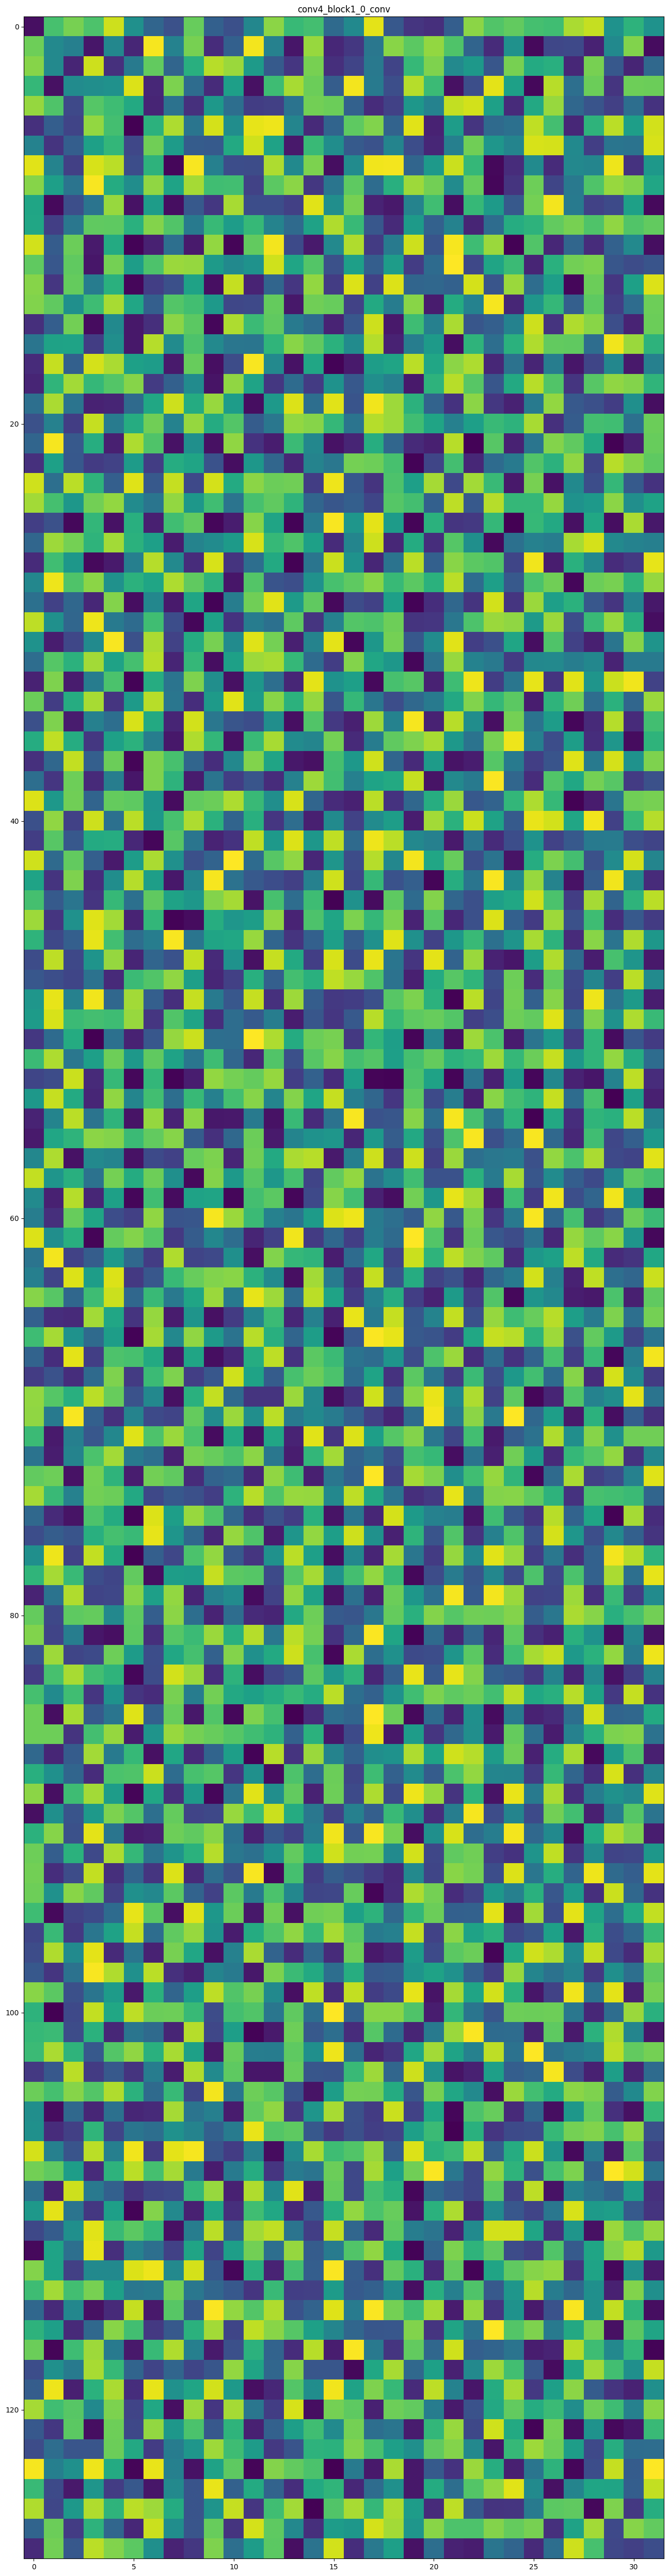

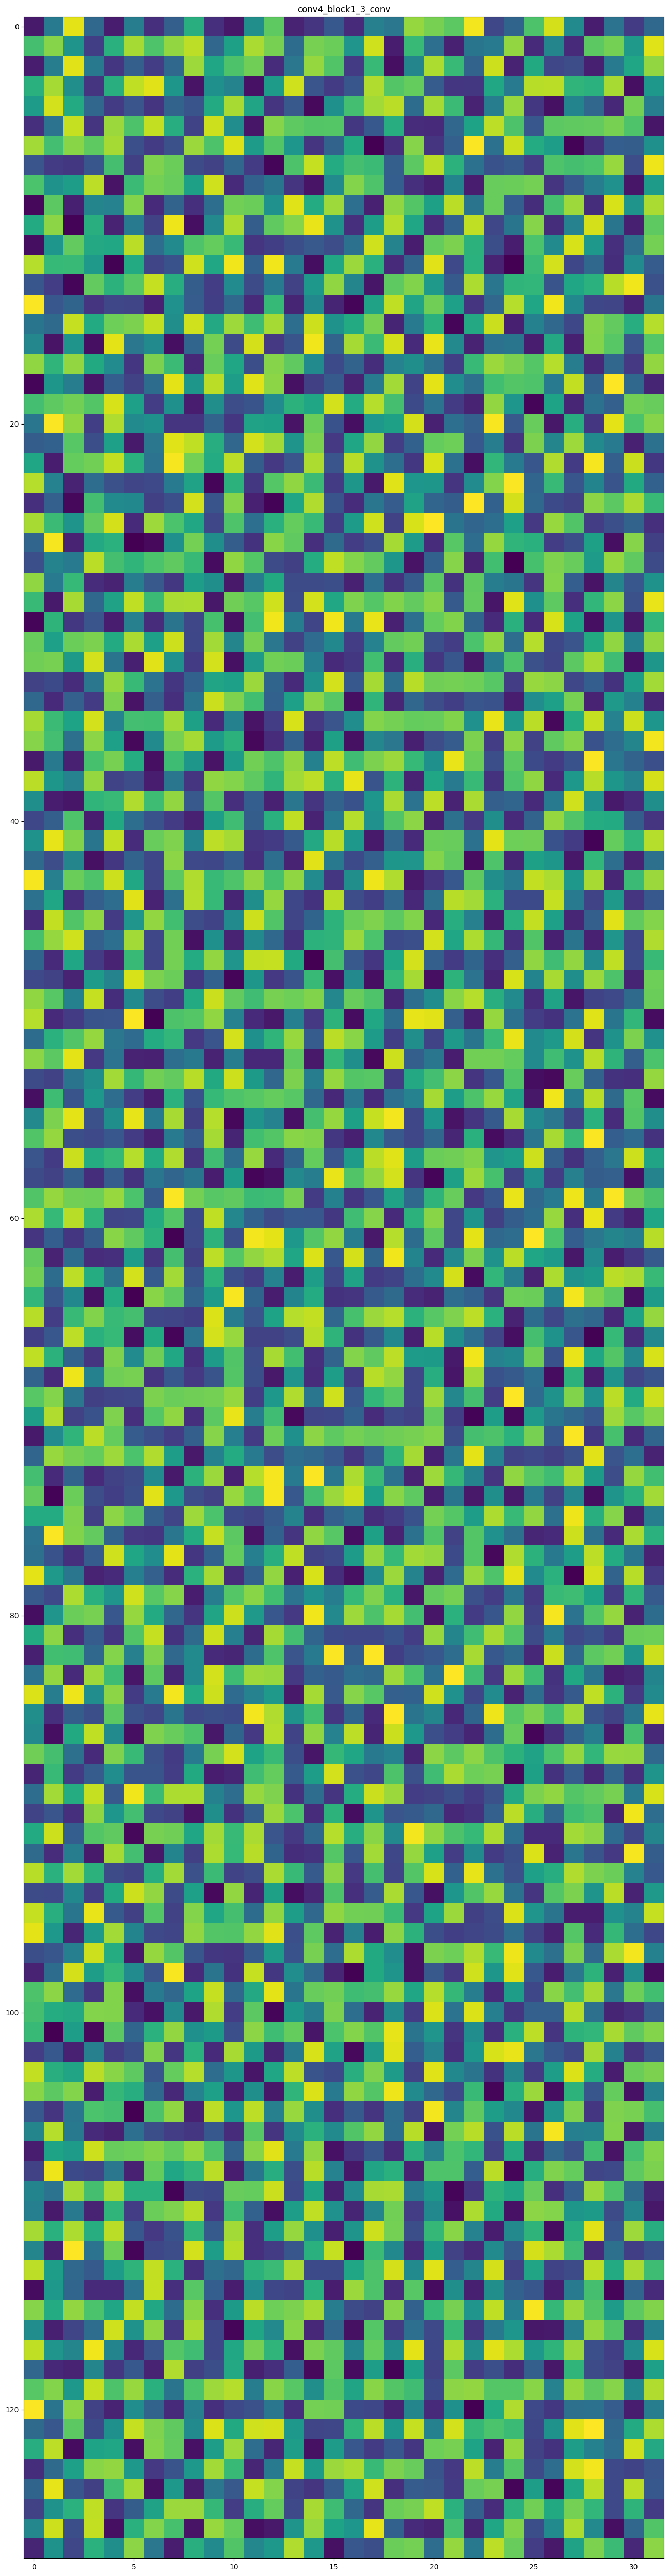

In [50]:
images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(block1_names, activations1):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()

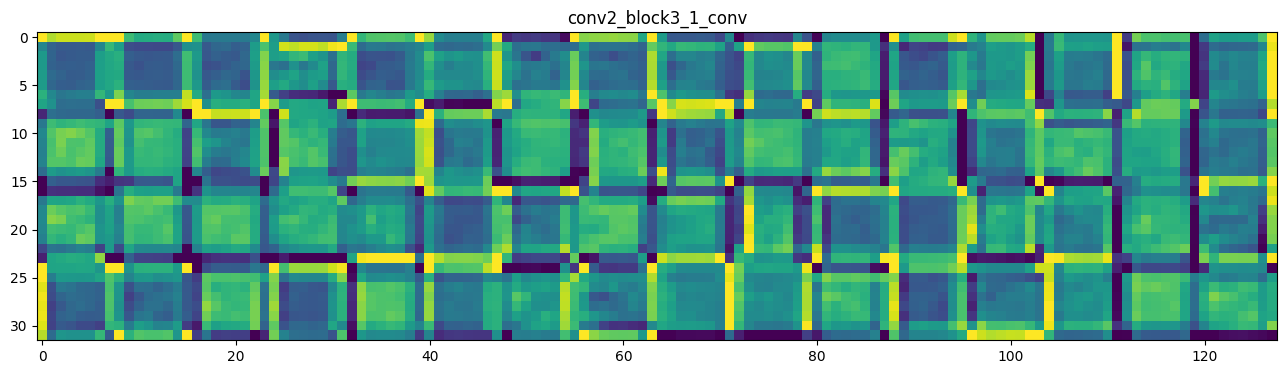

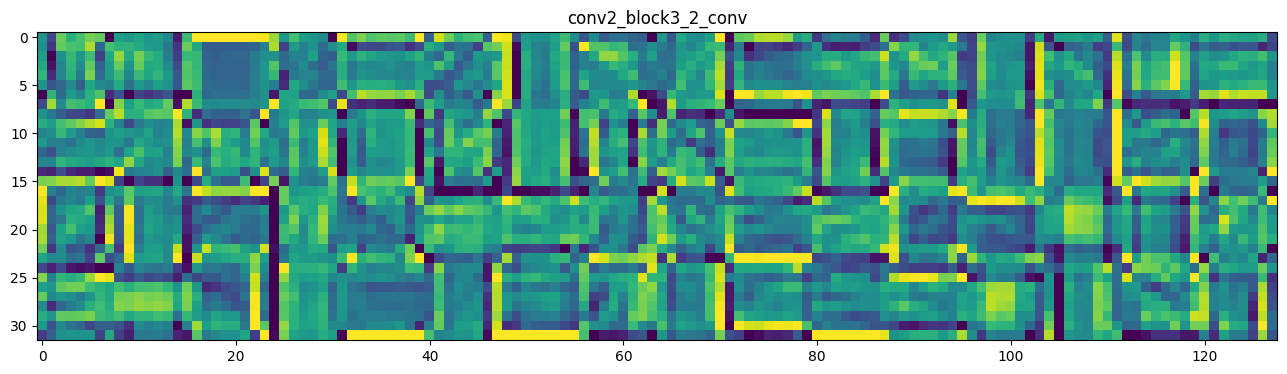

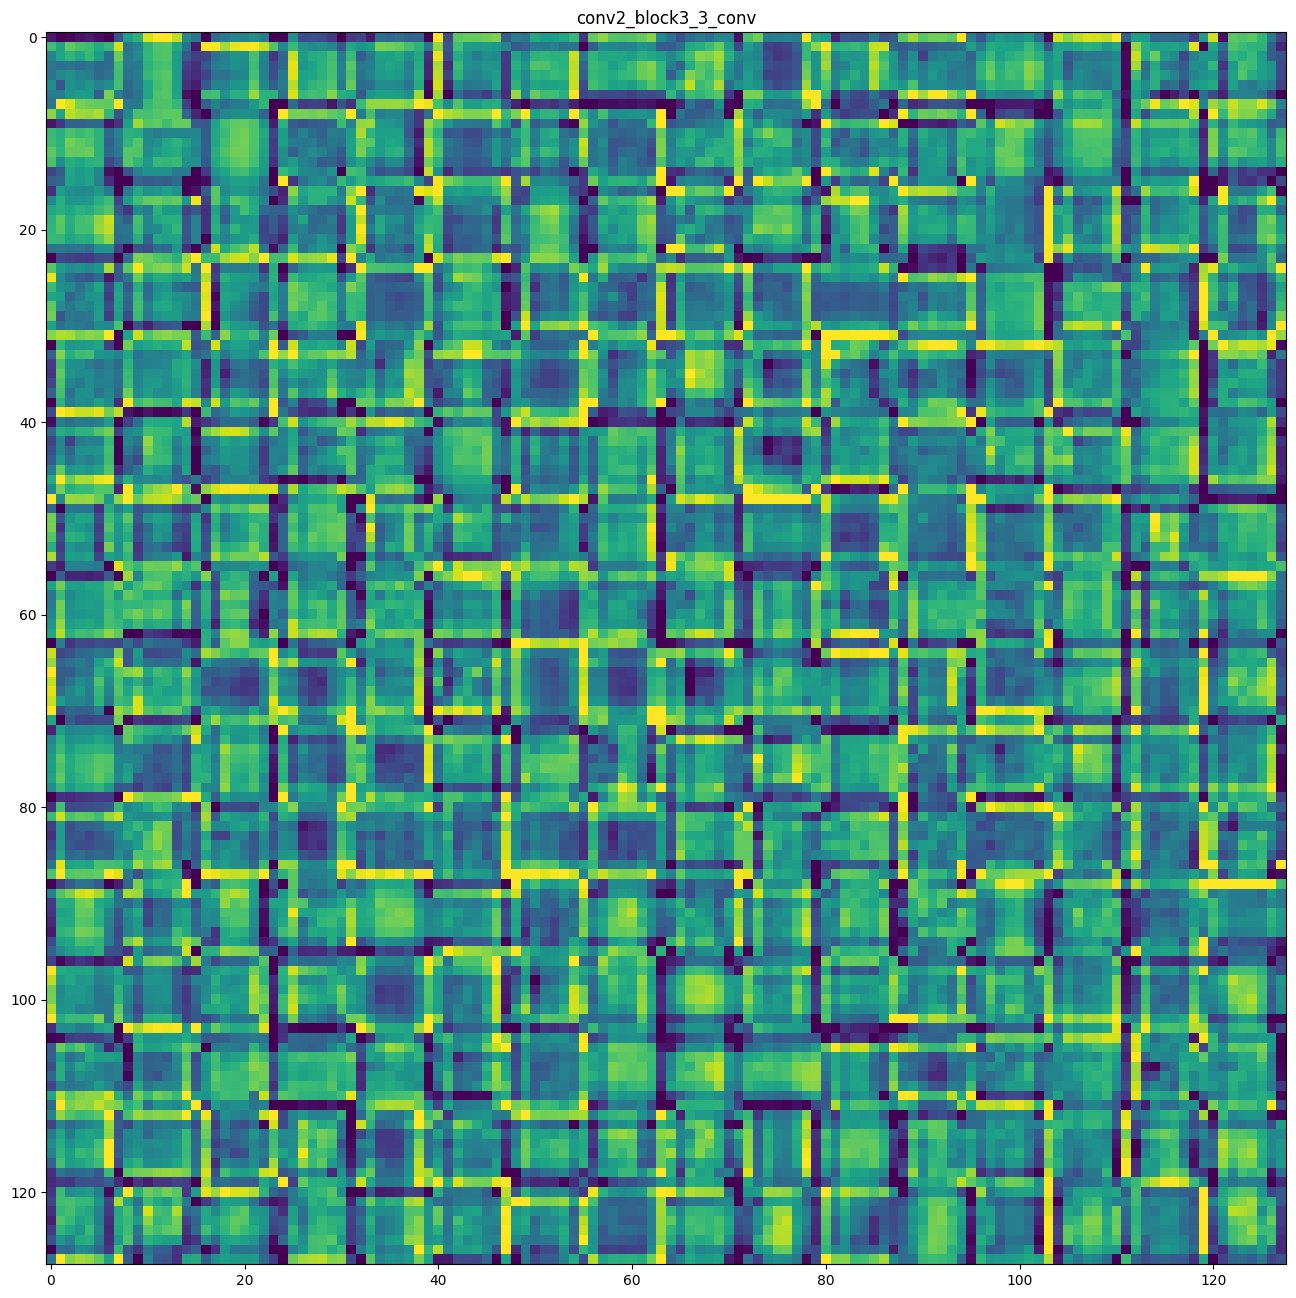

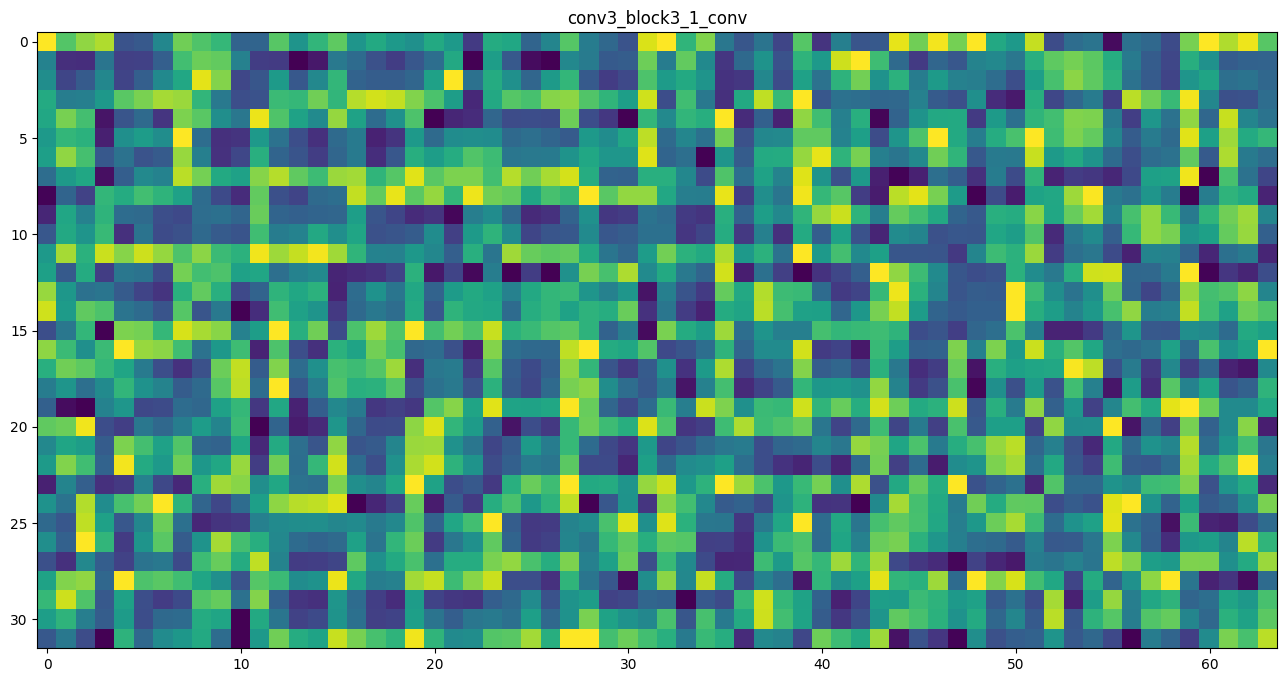

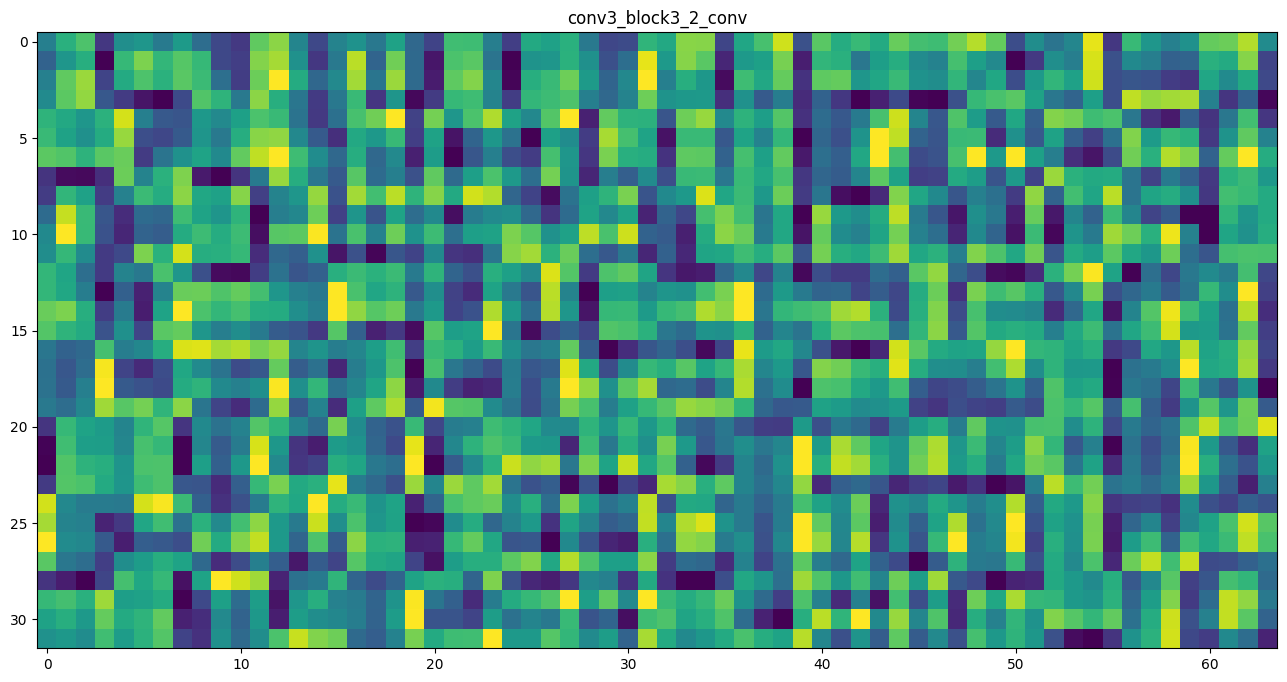

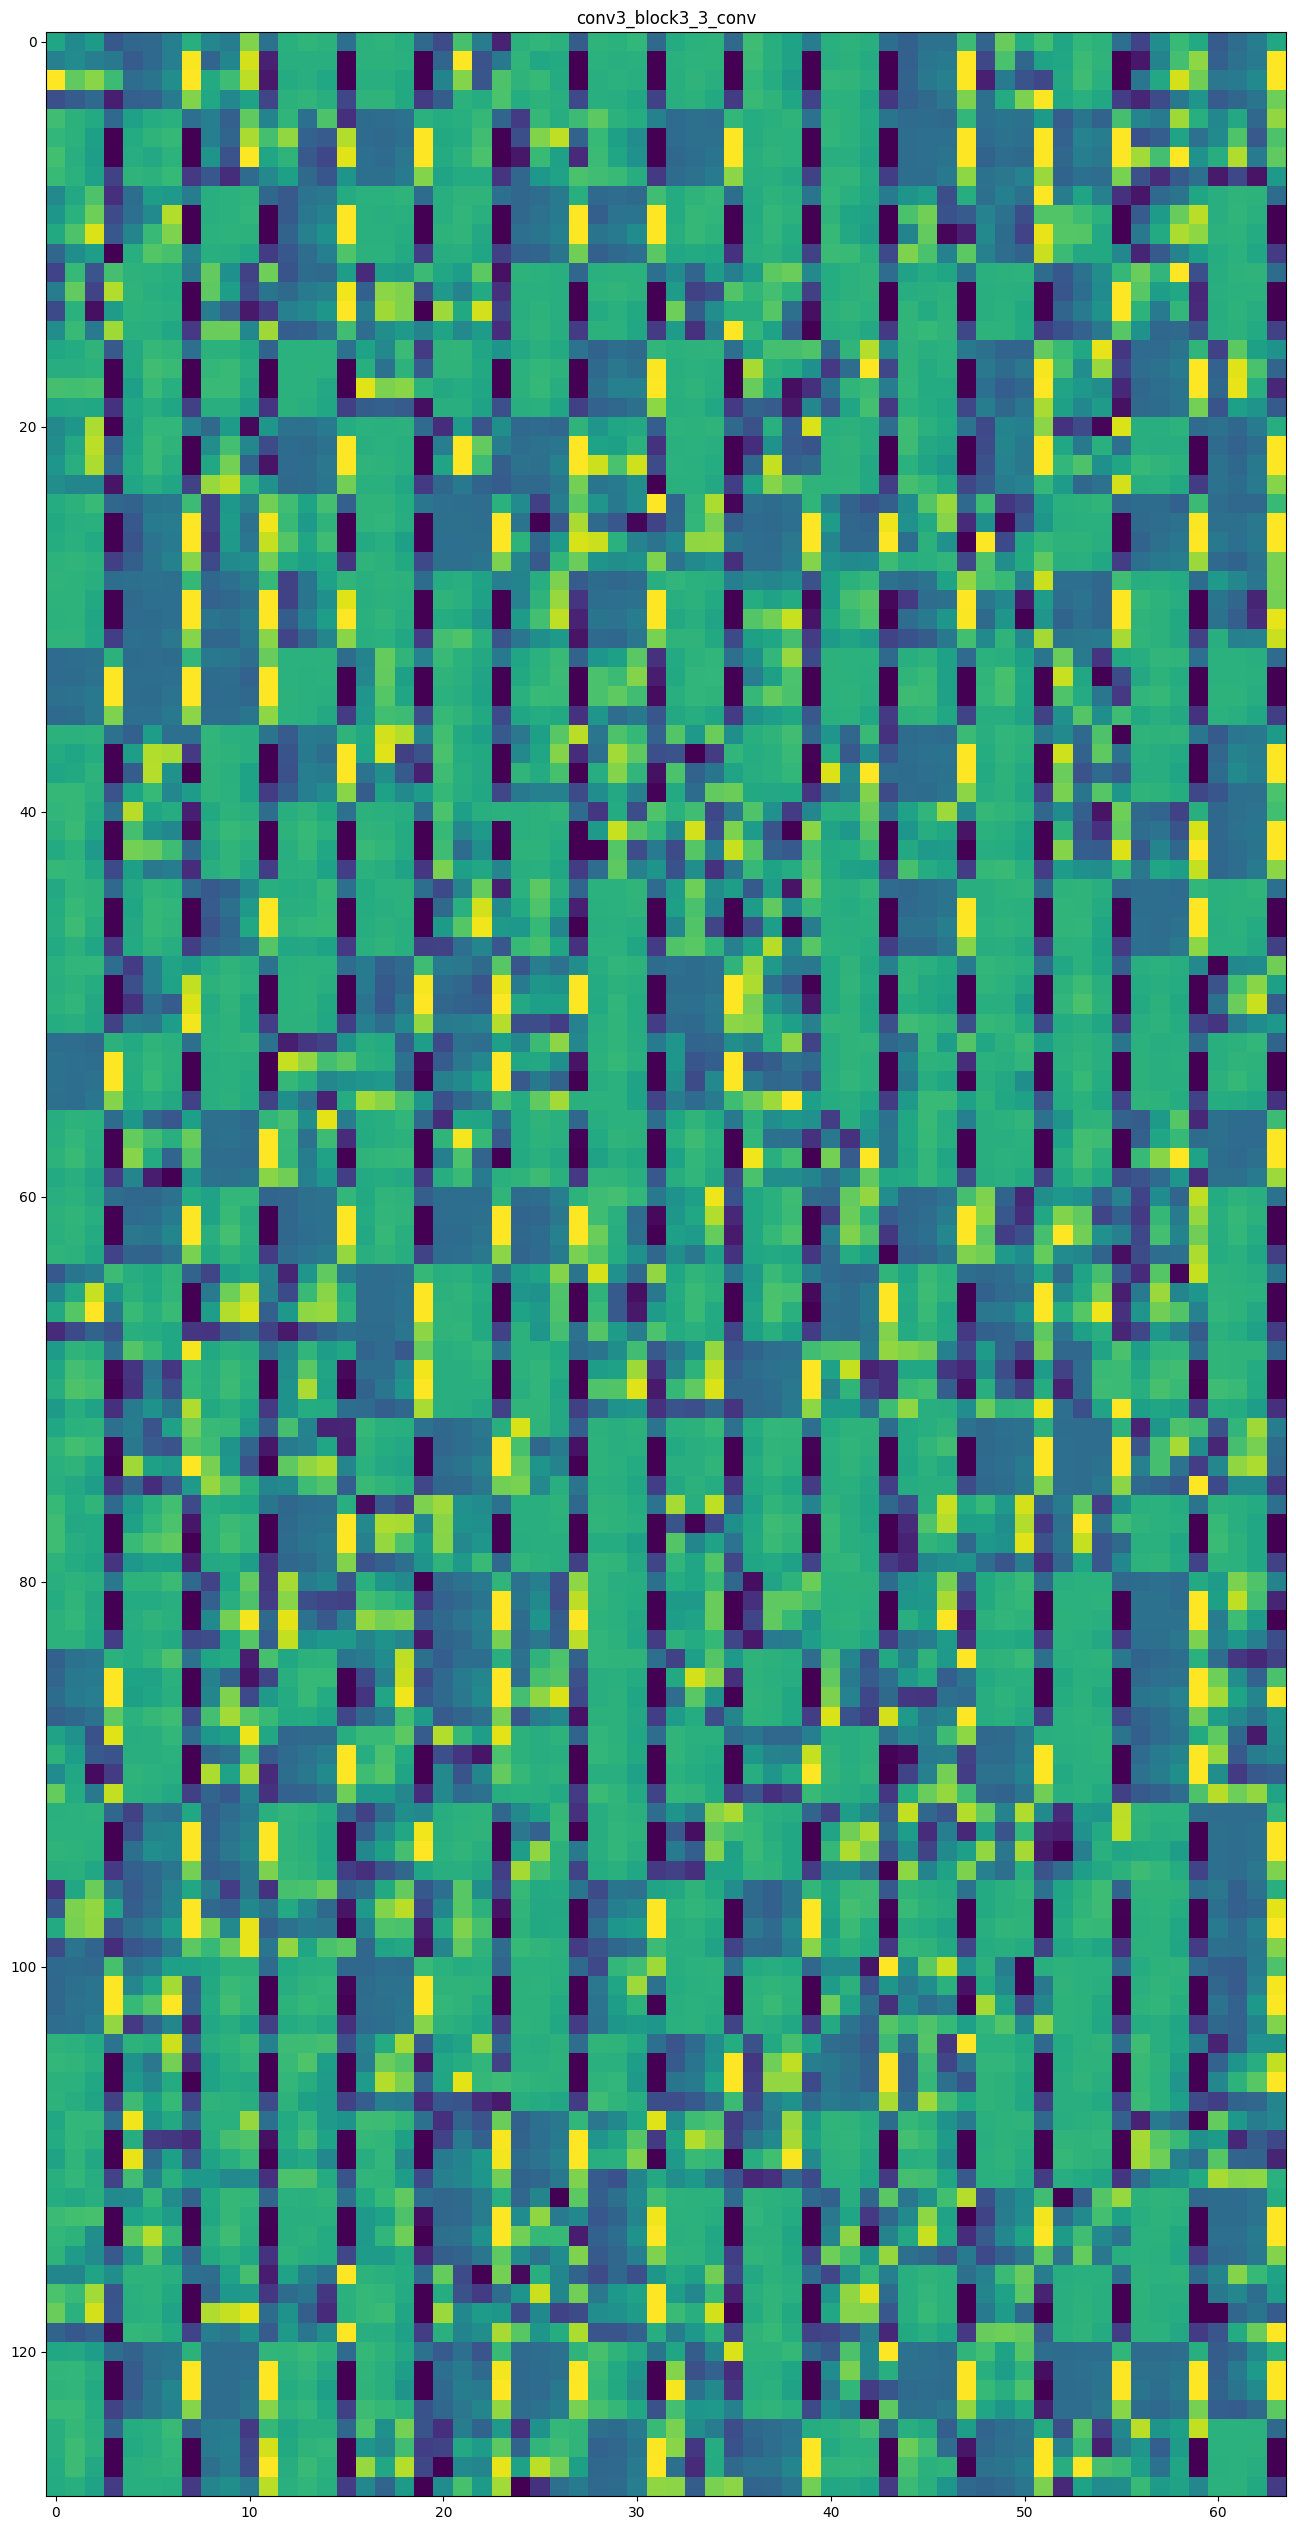

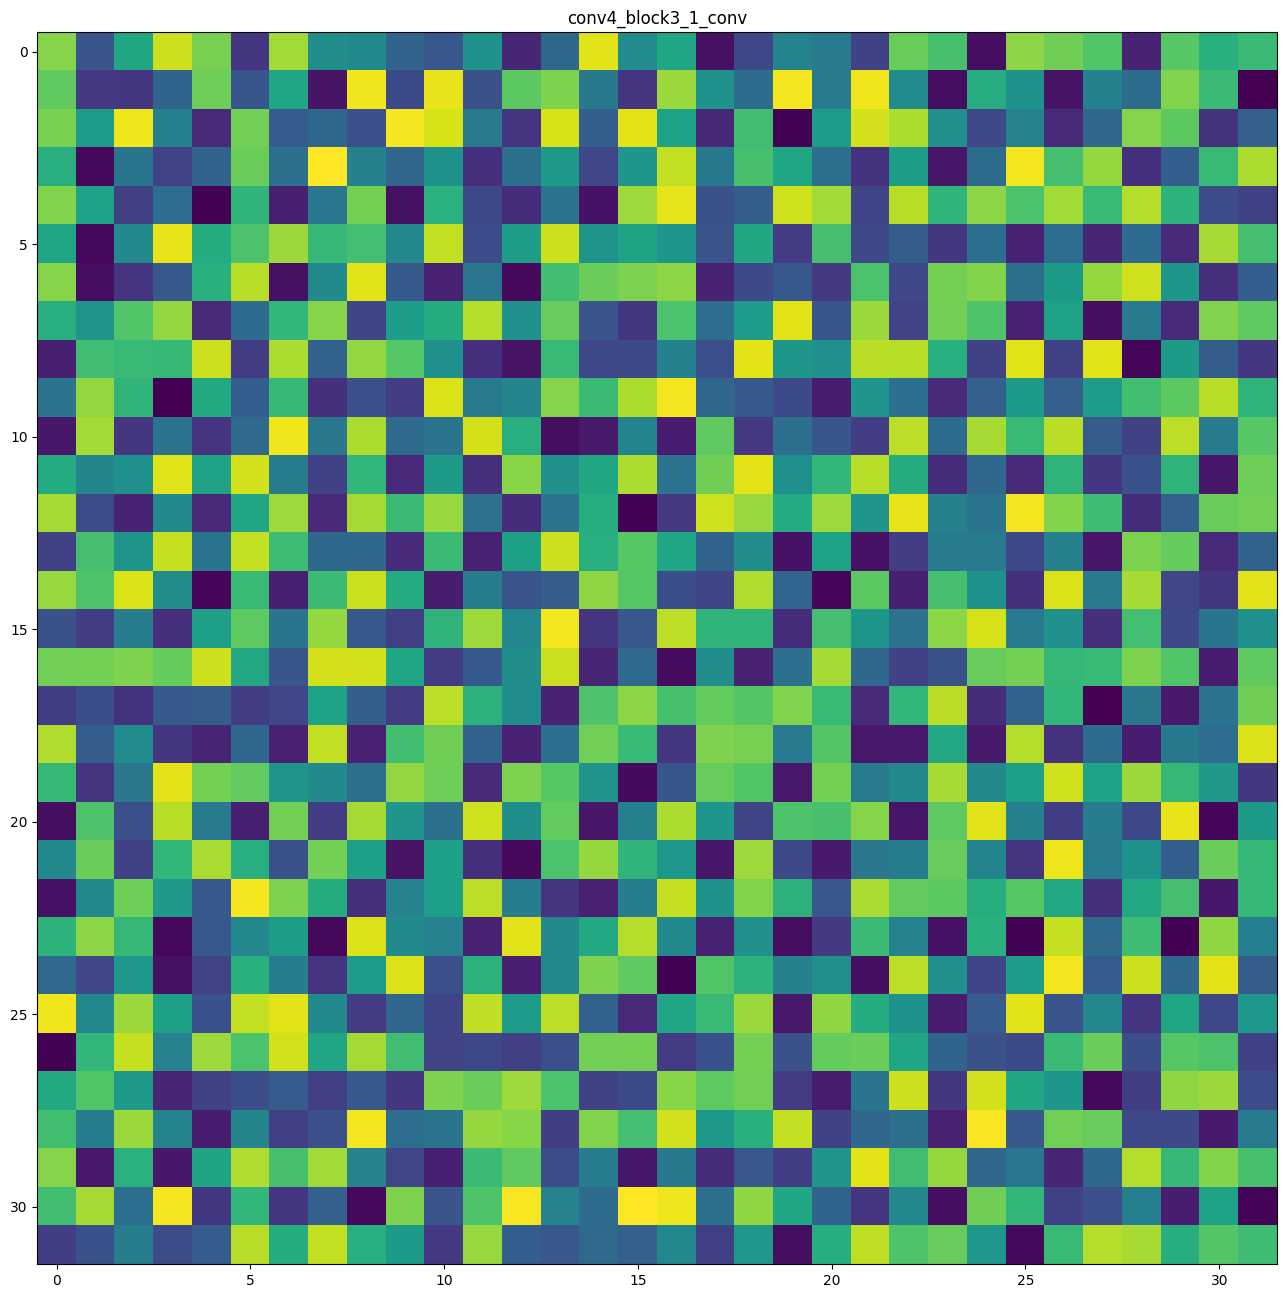

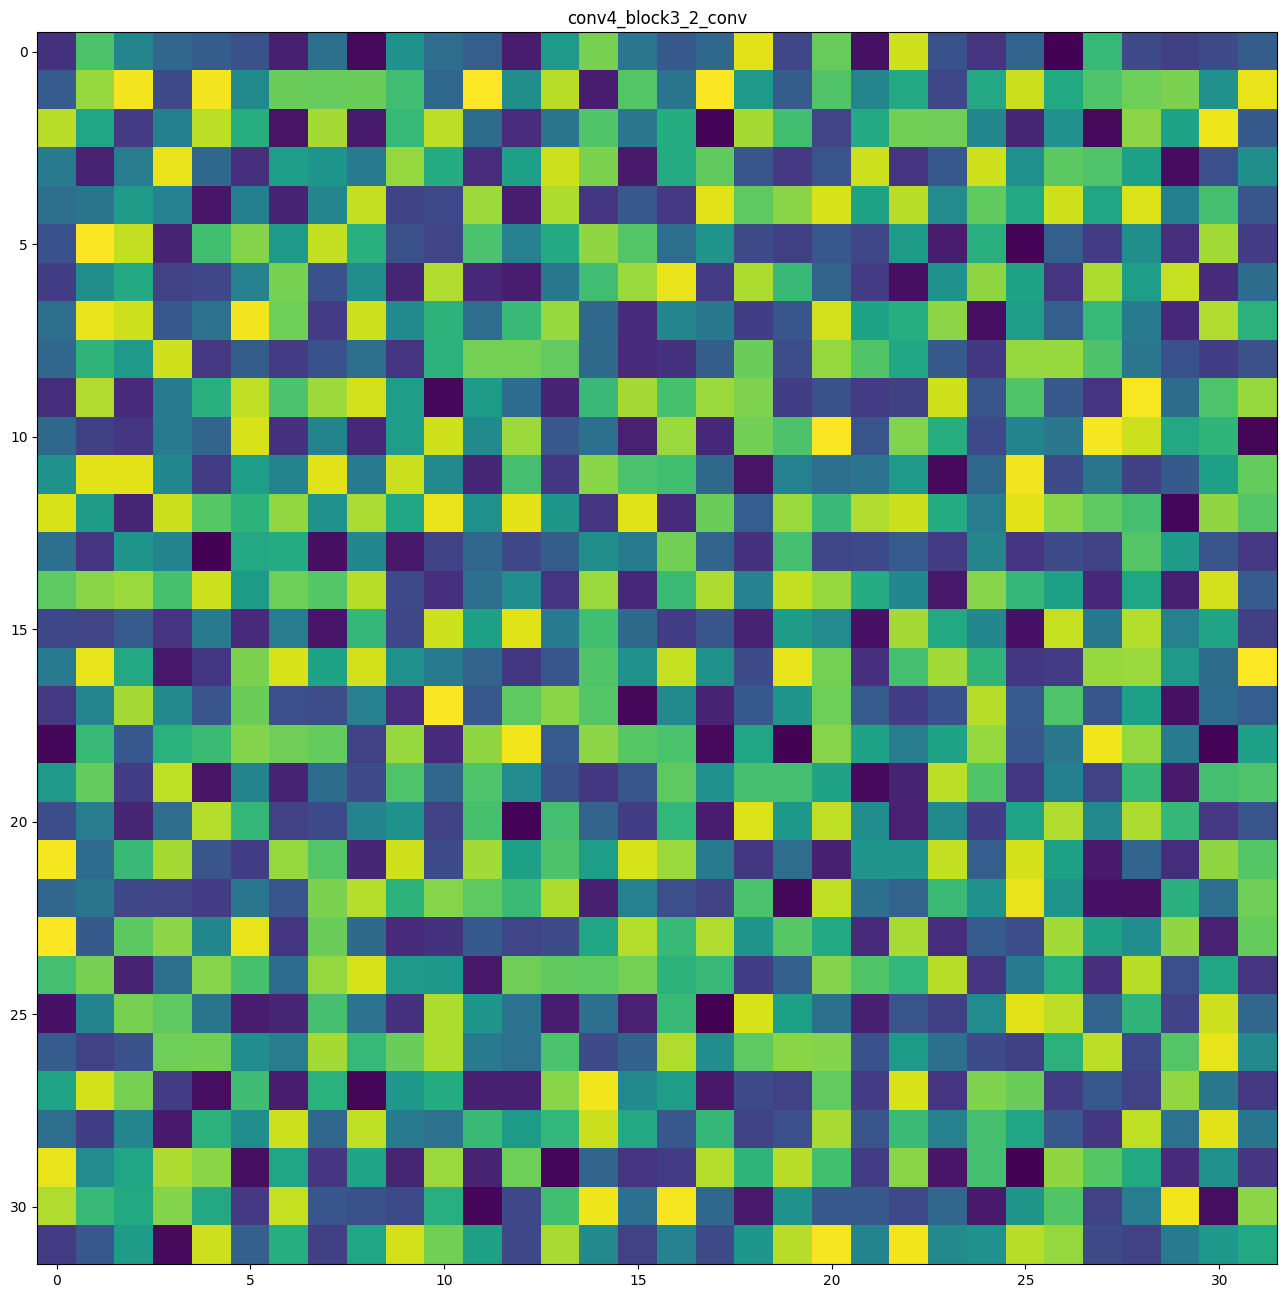

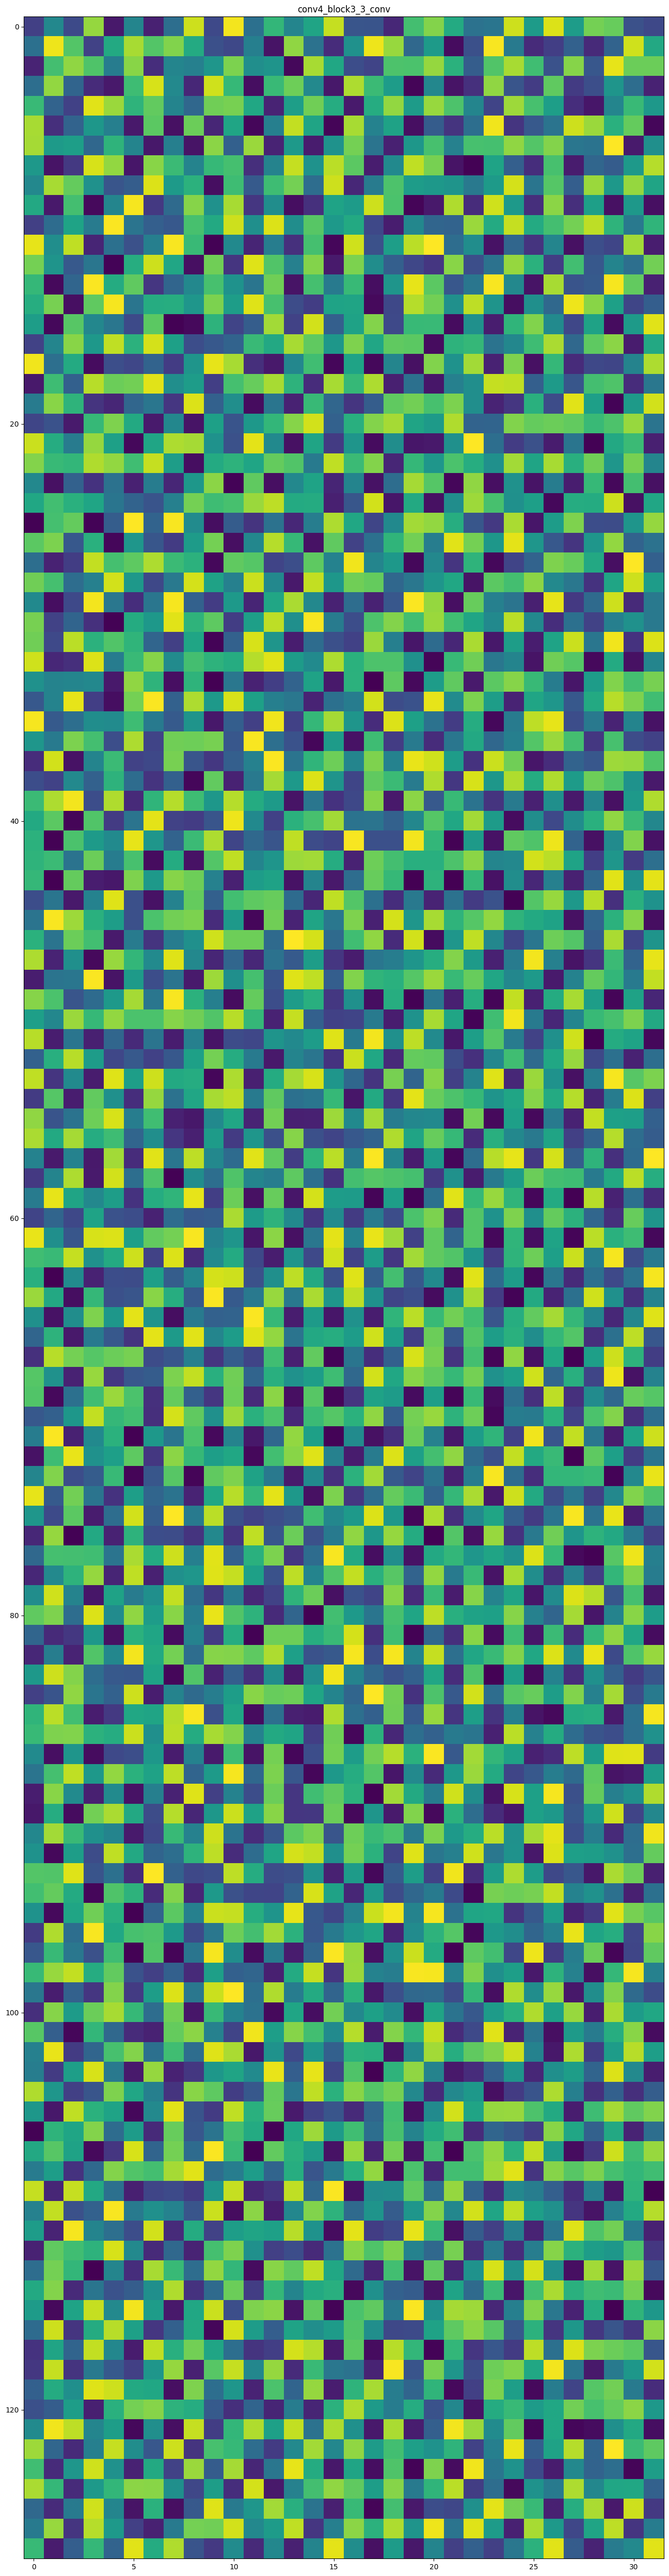

In [51]:
##### BLOCK 3 ########

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(block3_names, activations3):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()

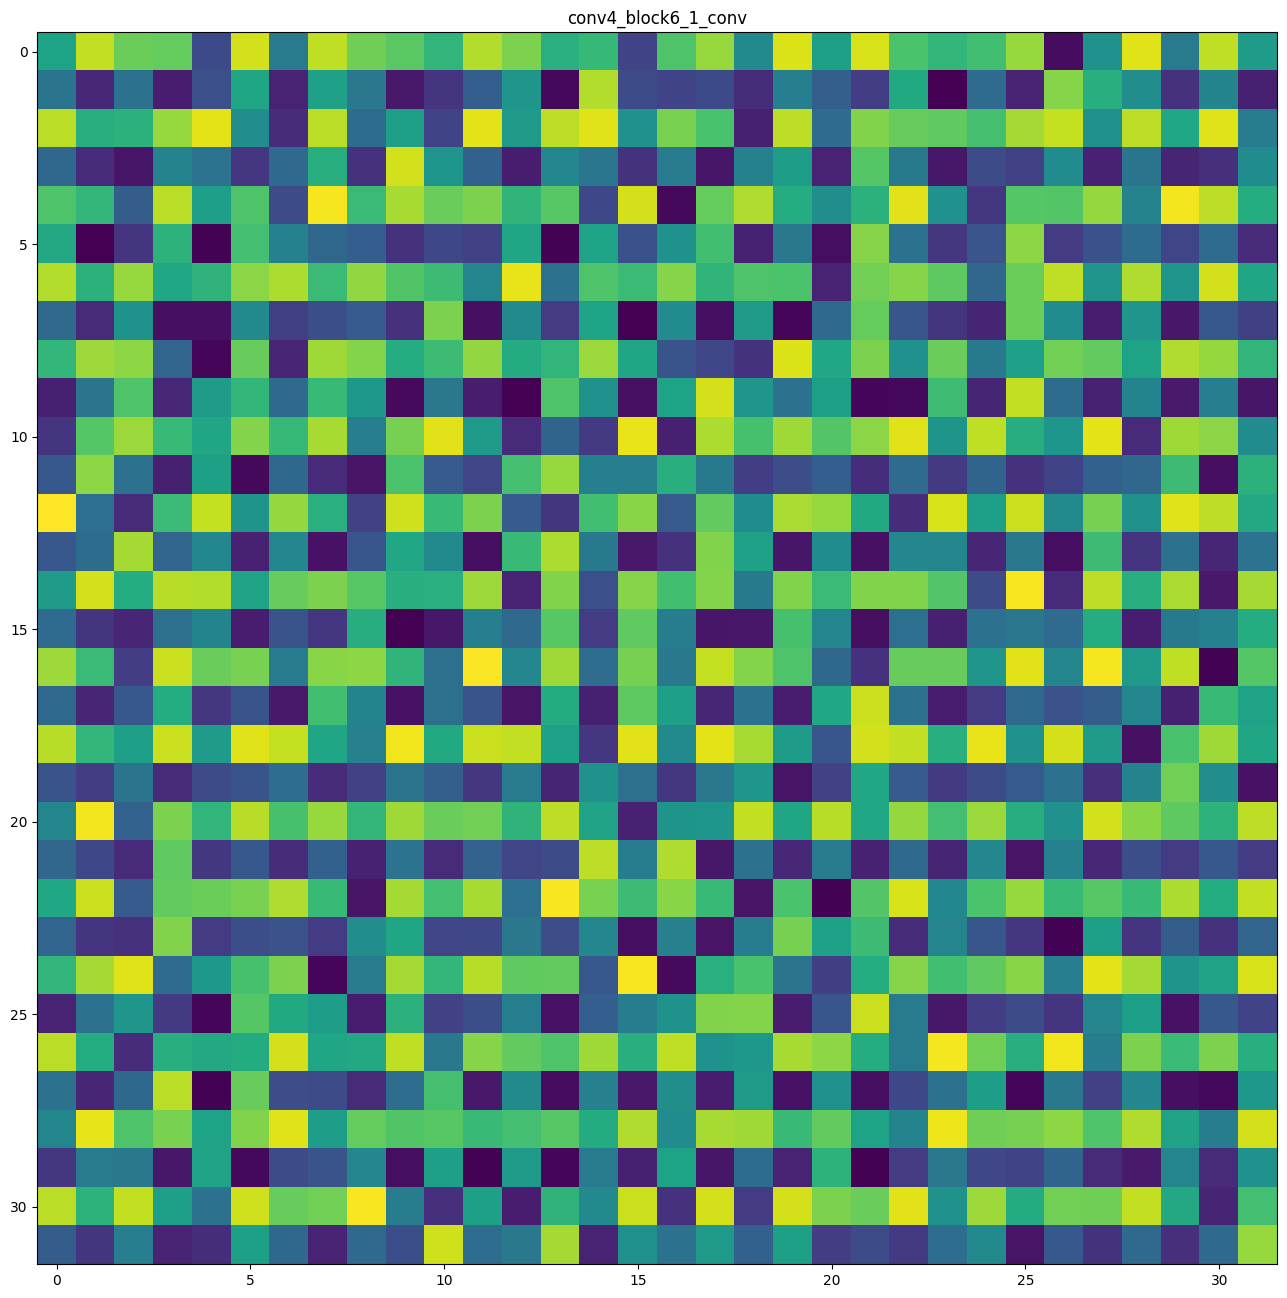

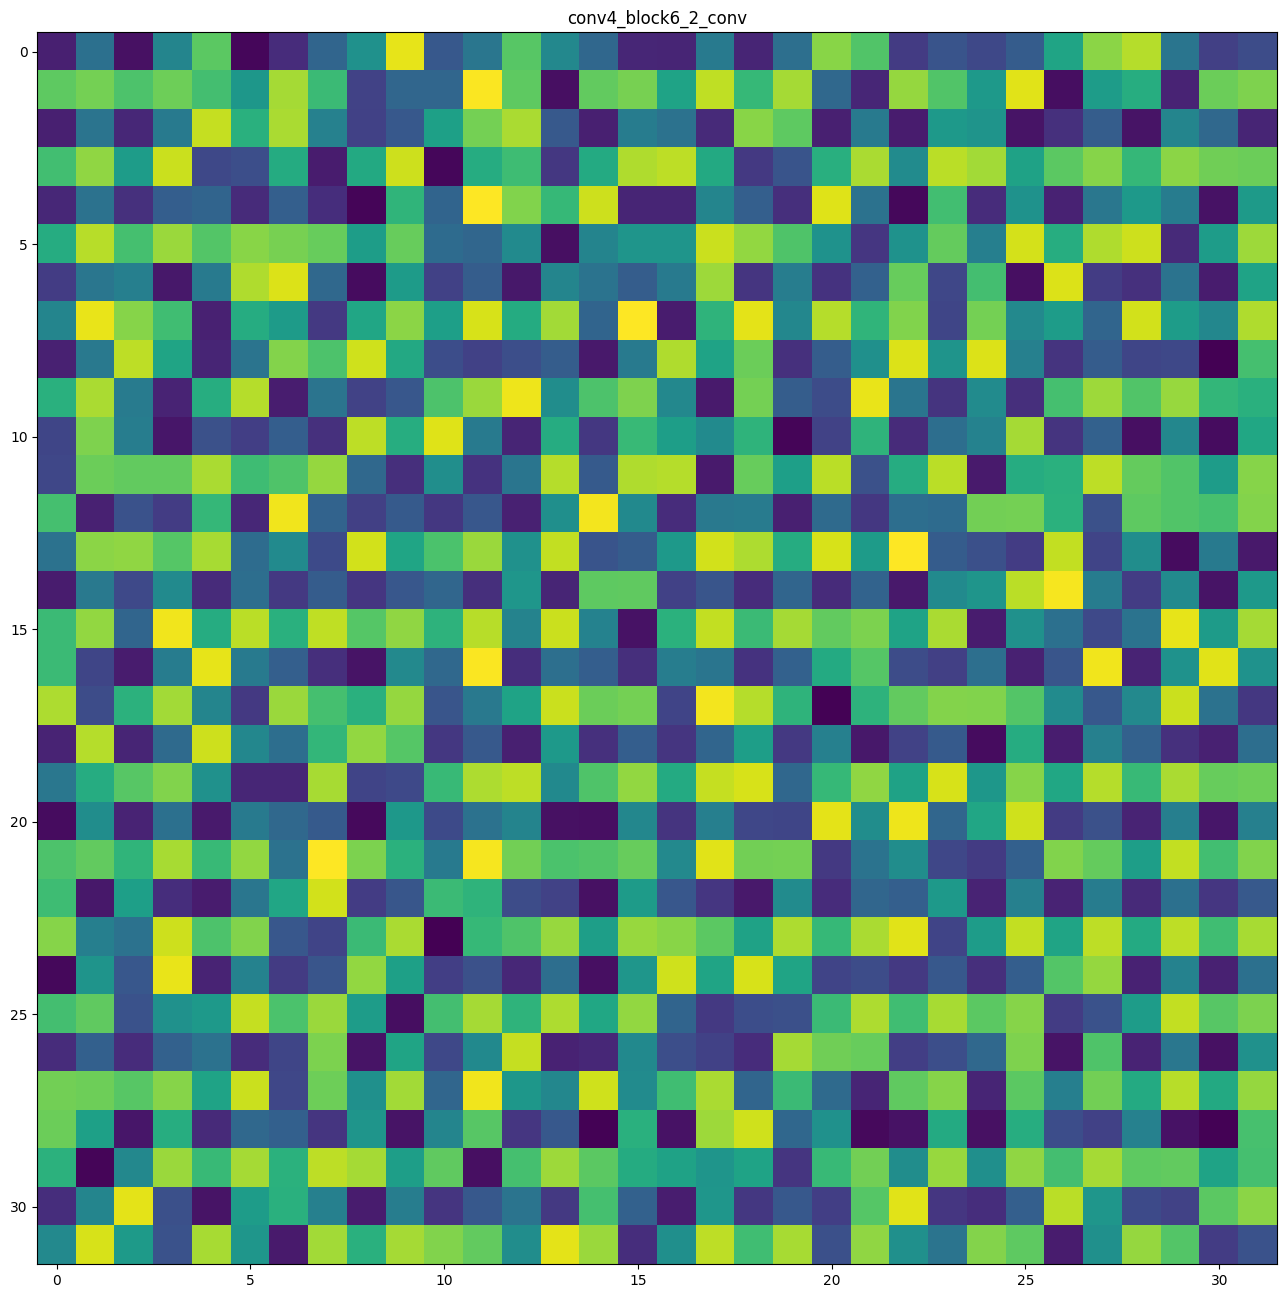

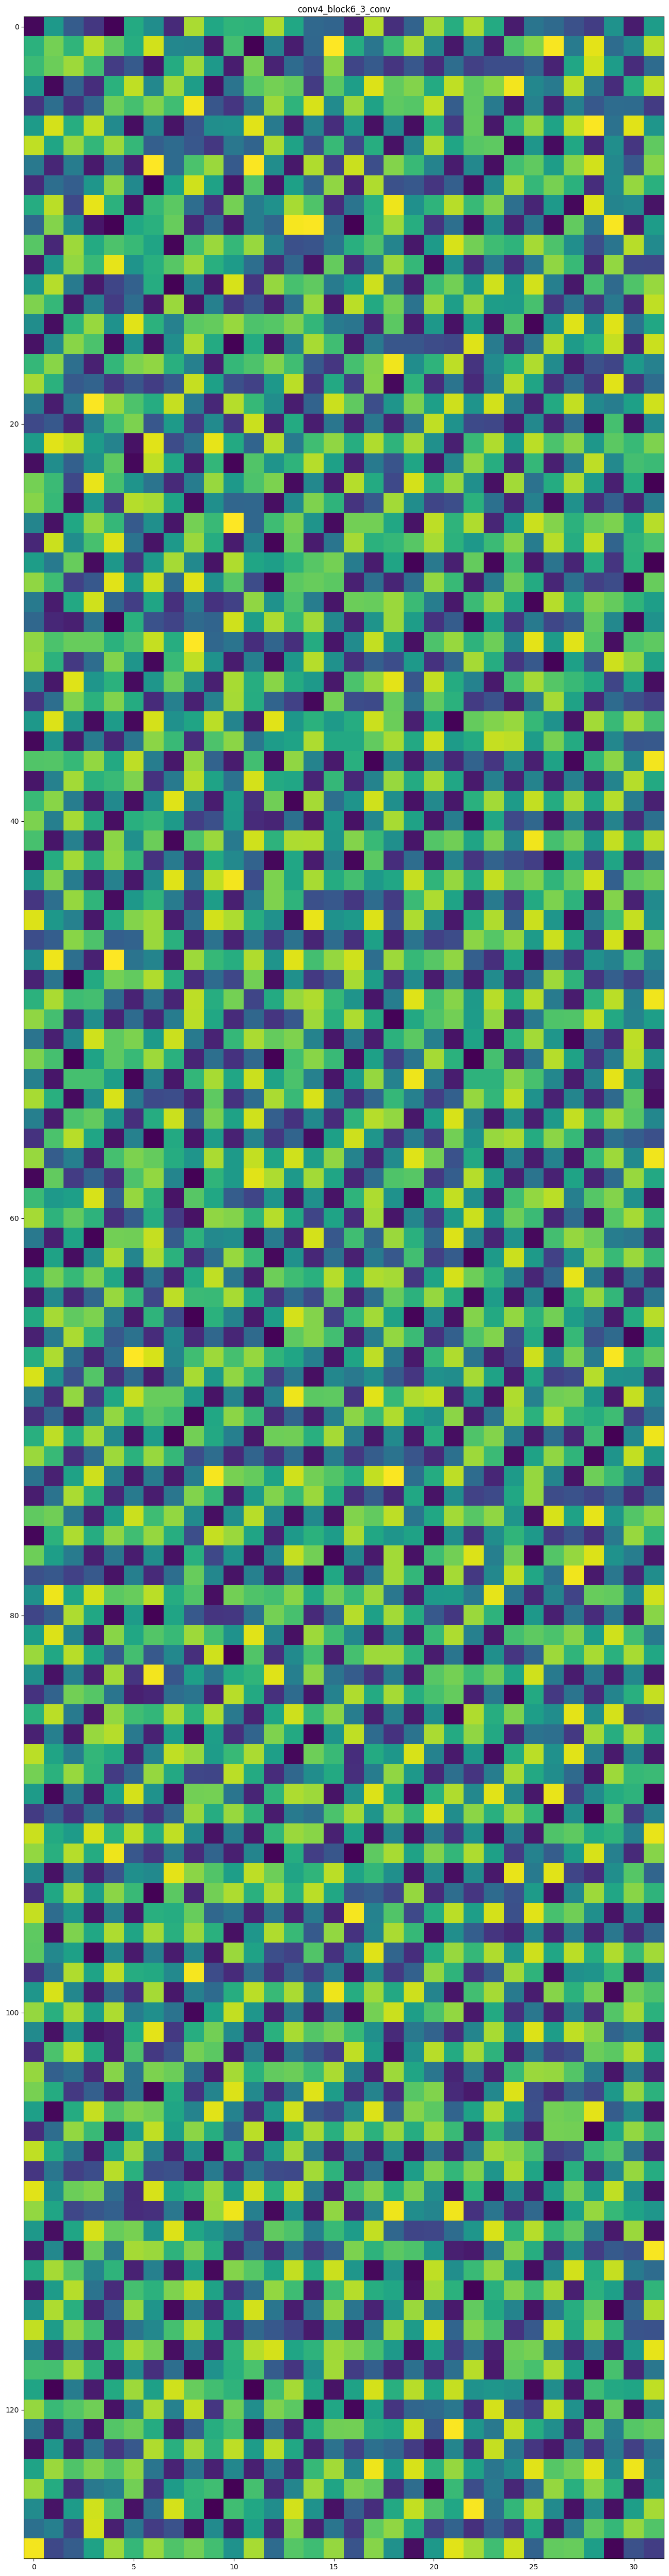

In [52]:
##### BLOCK 6 #######

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(block6_names, activations6):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()

In [53]:
def compute_loss(image, filter_index, layer):
  feature_extractor = keras.Model(inputs=model.input, outputs=layer.output)
  activation = feature_extractor(image)
  filter_activation = activation[:, 2:-2, 2:-2, filter_index]
  return tf.reduce_mean(filter_activation)

@tf.function
def gradient_ascent_step(image, filter_index, learning_rate, layer):
    with tf.GradientTape() as tape:
        tape.watch(image)
        loss = compute_loss(image, filter_index, layer)
    grads = tape.gradient(loss, image)
    grads = tf.math.l2_normalize(grads)
    image += learning_rate * grads
    return image

def generate_filter_pattern(filter_index, layer):
    iterations = 30
    learning_rate = 10.0
    image = tf.random.uniform(
        minval=0.4,
        maxval=0.6,
        shape=(1, img_width, img_height, 3)
    )
    for i in range(iterations):
        image = gradient_ascent_step(image, filter_index, learning_rate, layer)
    return image[0].numpy()

def deprocess_image(image):
    image -= image.mean()
    image /= image.std()
    image *= 64
    image += 128
    image = np.clip(image, 0, 255).astype("uint8")
    return image

In [54]:
img_width, img_height, _ = X_test.shape[1:]

# Define the feature extractor
layer_name = 'conv2_block1_1_conv'
feature_extractor = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
layer = feature_extractor.get_layer(layer_name)
num_filters = layer.output.shape[-1]

all_images = []
for filter_index in range(num_filters):
    image = deprocess_image(
        generate_filter_pattern(filter_index, layer)
    )
    all_images.append(image)

margin = 5
n = 8
cropped_width = img_width
cropped_height = img_height
width = n * cropped_width + (n - 1) * margin
height = n * cropped_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

for i in range(n):
    for j in range(n):
        image = all_images[i * n + j]
        row_start = (cropped_width + margin) * i
        row_end = (cropped_width + margin) * i + cropped_width
        column_start = (cropped_height + margin) * j
        column_end = (cropped_height + margin) * j + cropped_height
        stitched_filters[
            row_start: row_end,
            column_start: column_end, :] = image

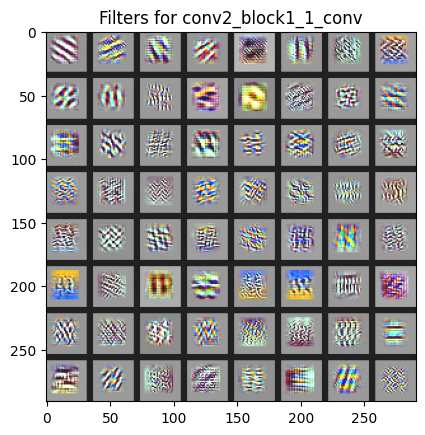

In [55]:
plt.title("Filters for "+ layer_name)
plt.imshow(deprocess_image(stitched_filters))
plt.show()

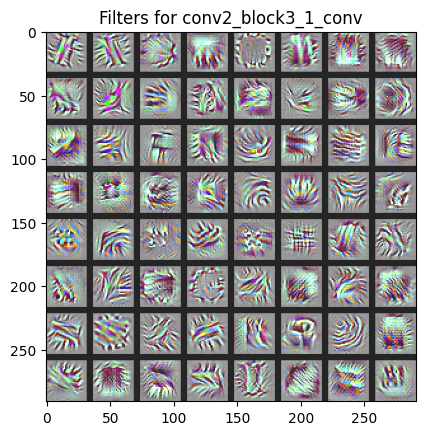

In [56]:
# Block 3
img_width, img_height, _ = X_test.shape[1:]

# Define the feature extractor
layer_name = 'conv2_block3_1_conv'
feature_extractor = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
layer = feature_extractor.get_layer(layer_name)
num_filters = layer.output.shape[-1]

all_images = []
for filter_index in range(num_filters):
    image = deprocess_image(
        generate_filter_pattern(filter_index, layer)
    )
    all_images.append(image)

margin = 5
n = 8
cropped_width = img_width
cropped_height = img_height
width = n * cropped_width + (n - 1) * margin
height = n * cropped_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

for i in range(n):
    for j in range(n):
        image = all_images[i * n + j]
        row_start = (cropped_width + margin) * i
        row_end = (cropped_width + margin) * i + cropped_width
        column_start = (cropped_height + margin) * j
        column_end = (cropped_height + margin) * j + cropped_height
        stitched_filters[
            row_start: row_end,
            column_start: column_end, :] = image

plt.title("Filters for "+ layer_name)
plt.imshow(deprocess_image(stitched_filters))
plt.show()

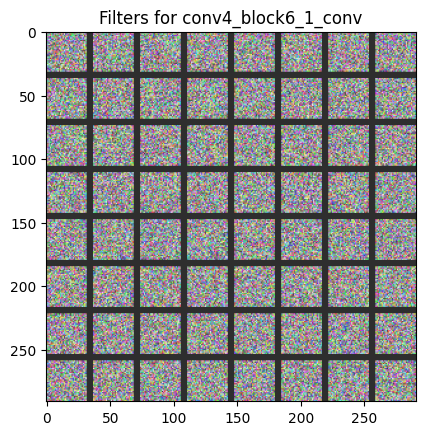

In [57]:
# Block 6
img_width, img_height, _ = X_test.shape[1:]

# Define the feature extractor
layer_name = 'conv4_block6_1_conv'
feature_extractor = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
layer = feature_extractor.get_layer(layer_name)
num_filters = layer.output.shape[-1]

all_images = []
for filter_index in range(num_filters):
    image = deprocess_image(
        generate_filter_pattern(filter_index, layer)
    )
    all_images.append(image)

margin = 5
n = 8
cropped_width = img_width
cropped_height = img_height
width = n * cropped_width + (n - 1) * margin
height = n * cropped_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

for i in range(n):
    for j in range(n):
        image = all_images[i * n + j]
        row_start = (cropped_width + margin) * i
        row_end = (cropped_width + margin) * i + cropped_width
        column_start = (cropped_height + margin) * j
        column_end = (cropped_height + margin) * j + cropped_height
        stitched_filters[
            row_start: row_end,
            column_start: column_end, :] = image

plt.title("Filters for "+ layer_name)
plt.imshow(deprocess_image(stitched_filters))
plt.show()

1/1 [==============================] - 0s 24ms/step


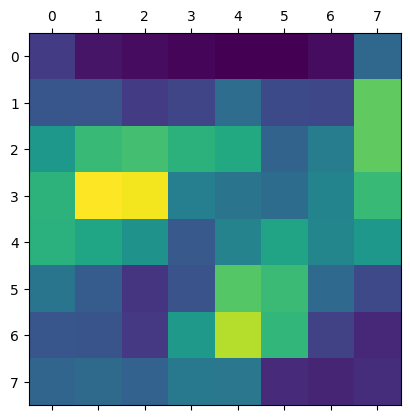

In [188]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_test, y_test = X_test[y_test.reshape(-1) != 8], y_test[y_test.reshape(-1) != 8]

sample_img = X_test[100]
sample_img = sample_img.astype('float32')
sample_img = tf.keras.applications.resnet50.preprocess_input(sample_img)
sample_img = np.expand_dims(sample_img, axis=0)
sample_img /= 255

preds = model.predict(sample_img)

last_conv_layer_name = "conv2_block1_1_conv"
classifier_layer_names = [
 "avg_pool",
]
last_conv_layer = model.get_layer(last_conv_layer_name)
last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in classifier_layer_names:
  x = model.get_layer(layer_name)(x)
classifier_model = keras.Model(classifier_input, x)

with tf.GradientTape() as tape:
  last_conv_layer_output = last_conv_layer_model(sample_img)
  tape.watch(last_conv_layer_output)
  preds = classifier_model(last_conv_layer_output)
  top_pred_index = tf.argmax(preds[0])
  top_class_channel = preds[:, top_pred_index]

grads = tape.gradient(top_class_channel, last_conv_layer_output)

pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2)).numpy()
last_conv_layer_output = last_conv_layer_output.numpy()[0]
for i in range(pooled_grads.shape[-1]):
  last_conv_layer_output[:, :, i] *= pooled_grads[i]
heatmap = np.mean(last_conv_layer_output, axis=-1)

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)



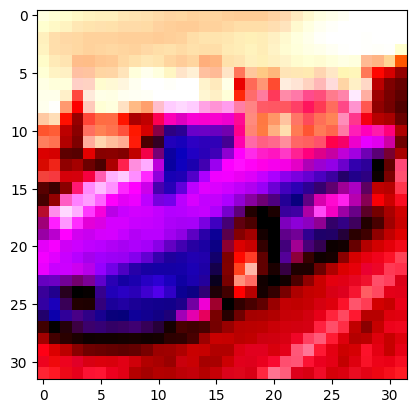

In [204]:

heatmap_resized = tf.image.resize(tf.expand_dims(heatmap, -1), (sample_img.shape[1], sample_img.shape[2])).numpy()
heatmap_jet = cm.jet(heatmap_resized[..., 0])
superimposed_img = (heatmap_jet[:, :, :3] * 0.4 + sample_img[0] * 0.6).clip(0, 1)
plt.imshow(superimposed_img*5)
plt.show()

1/1 [==============================] - 0s 24ms/step


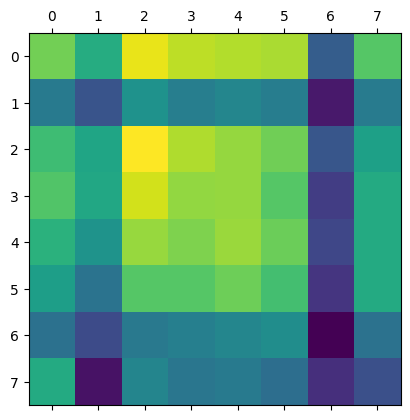

In [207]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_test, y_test = X_test[y_test.reshape(-1) != 8], y_test[y_test.reshape(-1) != 8]

sample_img = X_test[100]
sample_img = sample_img.astype('float32')
sample_img = tf.keras.applications.resnet50.preprocess_input(sample_img)
sample_img = np.expand_dims(sample_img, axis=0)
sample_img /= 255

preds = model.predict(sample_img)

last_conv_layer_name = "conv2_block3_3_conv"
classifier_layer_names = [
 "avg_pool",
]
last_conv_layer = model.get_layer(last_conv_layer_name)
last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in classifier_layer_names:
  x = model.get_layer(layer_name)(x)
classifier_model = keras.Model(classifier_input, x)

with tf.GradientTape() as tape:
  last_conv_layer_output = last_conv_layer_model(sample_img)
  tape.watch(last_conv_layer_output)
  preds = classifier_model(last_conv_layer_output)
  top_pred_index = tf.argmax(preds[0])
  top_class_channel = preds[:, top_pred_index]

grads = tape.gradient(top_class_channel, last_conv_layer_output)

pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2)).numpy()
last_conv_layer_output = last_conv_layer_output.numpy()[0]
for i in range(pooled_grads.shape[-1]):
  last_conv_layer_output[:, :, i] *= pooled_grads[i]
heatmap = np.mean(last_conv_layer_output, axis=-1)

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)


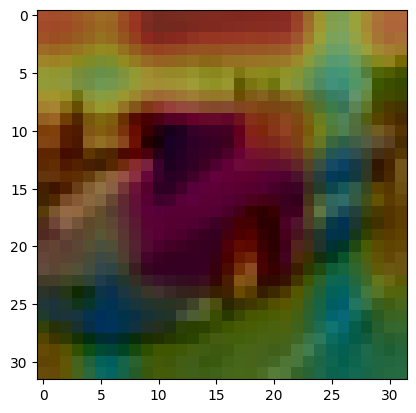

In [209]:
heatmap_resized = tf.image.resize(tf.expand_dims(heatmap, -1), (sample_img.shape[1], sample_img.shape[2])).numpy()
heatmap_jet = cm.jet(heatmap_resized[..., 0])
superimposed_img = (heatmap_jet[:, :, :3] * 0.4 + sample_img[0] * 0.6).clip(0, 1)
plt.imshow(superimposed_img)
plt.show()

1/1 [==============================] - 0s 26ms/step


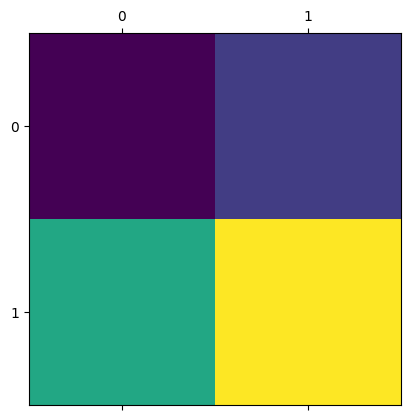

In [210]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_test, y_test = X_test[y_test.reshape(-1) != 8], y_test[y_test.reshape(-1) != 8]

sample_img = X_test[100]
sample_img = sample_img.astype('float32')
sample_img = tf.keras.applications.resnet50.preprocess_input(sample_img)
sample_img = np.expand_dims(sample_img, axis=0)
sample_img /= 255

preds = model.predict(sample_img)

last_conv_layer_name = "conv4_block6_3_conv"
classifier_layer_names = [
 "avg_pool",
]
last_conv_layer = model.get_layer(last_conv_layer_name)
last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in classifier_layer_names:
  x = model.get_layer(layer_name)(x)
classifier_model = keras.Model(classifier_input, x)

with tf.GradientTape() as tape:
  last_conv_layer_output = last_conv_layer_model(sample_img)
  tape.watch(last_conv_layer_output)
  preds = classifier_model(last_conv_layer_output)
  top_pred_index = tf.argmax(preds[0])
  top_class_channel = preds[:, top_pred_index]

grads = tape.gradient(top_class_channel, last_conv_layer_output)

pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2)).numpy()
last_conv_layer_output = last_conv_layer_output.numpy()[0]
for i in range(pooled_grads.shape[-1]):
  last_conv_layer_output[:, :, i] *= pooled_grads[i]
heatmap = np.mean(last_conv_layer_output, axis=-1)

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)


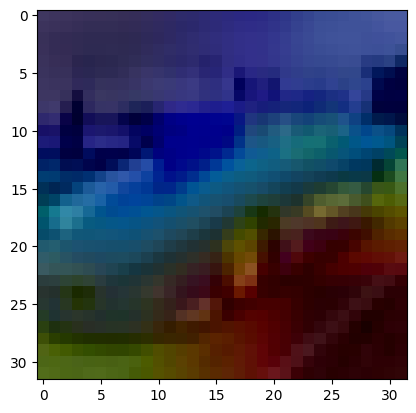

In [211]:
heatmap_resized = tf.image.resize(tf.expand_dims(heatmap, -1), (sample_img.shape[1], sample_img.shape[2])).numpy()
heatmap_jet = cm.jet(heatmap_resized[..., 0])
superimposed_img = (heatmap_jet[:, :, :3] * 0.4 + sample_img[0] * 0.6).clip(0, 1)
plt.imshow(superimposed_img)
plt.show()

## PS 1.B - 20 points

In [this notebook](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/transfer-learning/transfer_learning_tutorial.html) we showcase _transfer learning_ using a pre-trained CNN model.

Perform the fine-tunning and feature extraction methods of transfer learning using the same model as in PS-1A, for the class `ship`.

Repeat the visualization of PS-1.A before and after  transfer learning and write a conclusive summary as to the relative value of the two methods.

In [66]:
%matplotlib inline

In [67]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#Convert labels to ship = 1, nonship = 0
y_train = (y_train == 8).astype(int)
y_test = (y_test == 8).astype(int)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


sample_img = X_test[1]

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = tf.keras.applications.resnet50.preprocess_input(X_train)
X_test = tf.keras.applications.resnet50.preprocess_input(X_test)

print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 2)
Shape of test data:
(10000, 32, 32, 3)
(10000, 2)


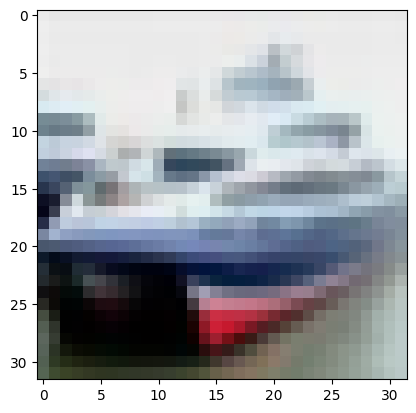

In [68]:
sample_img = sample_img.astype('float32')
plt.imshow((sample_img).astype(np.uint8))
sample_img = tf.keras.applications.resnet50.preprocess_input(sample_img)
sample_img = np.expand_dims(sample_img, axis=0)
sample_img /= 255


In [69]:
#Freeze weights in original model
model.trainable= False

#Fine tune convnet with binary final fully connected layer
newDense=tf.keras.layers.Dense(2, activation='softmax', name='newDense')(fc1)
ship_model = tf.keras.models.Model(inputs=model.input,outputs=newDense)

ship_model.summary()

Model: "model_37"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_5[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [70]:
ship_model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['acc'])

In [71]:
history = ship_model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=20, batch_size=256, verbose=1)

Epoch 1/20
196/196 [==============================] - 10s 36ms/step - loss: 0.3028 - acc: 0.8912 - val_loss: 0.2442 - val_acc: 0.9100
Epoch 2/20
196/196 [==============================] - 6s 29ms/step - loss: 0.2208 - acc: 0.9131 - val_loss: 0.2184 - val_acc: 0.9185
Epoch 3/20
196/196 [==============================] - 6s 30ms/step - loss: 0.2050 - acc: 0.9193 - val_loss: 0.2058 - val_acc: 0.9226
Epoch 4/20
196/196 [==============================] - 6s 30ms/step - loss: 0.1975 - acc: 0.9220 - val_loss: 0.1989 - val_acc: 0.9232
Epoch 5/20
196/196 [==============================] - 6s 30ms/step - loss: 0.1930 - acc: 0.9229 - val_loss: 0.1949 - val_acc: 0.9245
Epoch 6/20
196/196 [==============================] - 6s 30ms/step - loss: 0.1903 - acc: 0.9236 - val_loss: 0.1926 - val_acc: 0.9269
Epoch 7/20
196/196 [==============================] - 6s 30ms/step - loss: 0.1881 - acc: 0.9247 - val_loss: 0.1900 - val_acc: 0.9258
Epoch 8/20
196/196 [==============================] - 6s 30ms/step -

In [72]:
###### Visualizations before transfer learning ############
layer_outputs = []
layer_names = []
for layer in model.layers:
  if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
    layer_outputs.append(layer.output)
    layer_names.append(layer.name)

block1_names = []
block1_outputs = []
for layer, out in zip(layer_names, layer_outputs):
  if 'block1' in layer:
    if 'conv5' not in layer:
      block1_outputs.append(out)
      block1_names.append(layer)


activation1_model = keras.Model(inputs=model.input, outputs=block1_outputs)


In [73]:
activations1 = activation1_model.predict(sample_img)


1/1 [==============================] - 0s 435ms/step


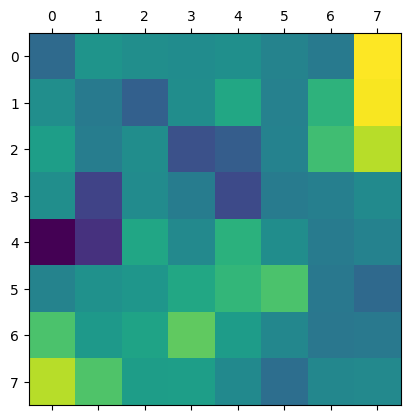

In [74]:
plt.matshow(first_layer_activation[0, :, :, 5], cmap="viridis")

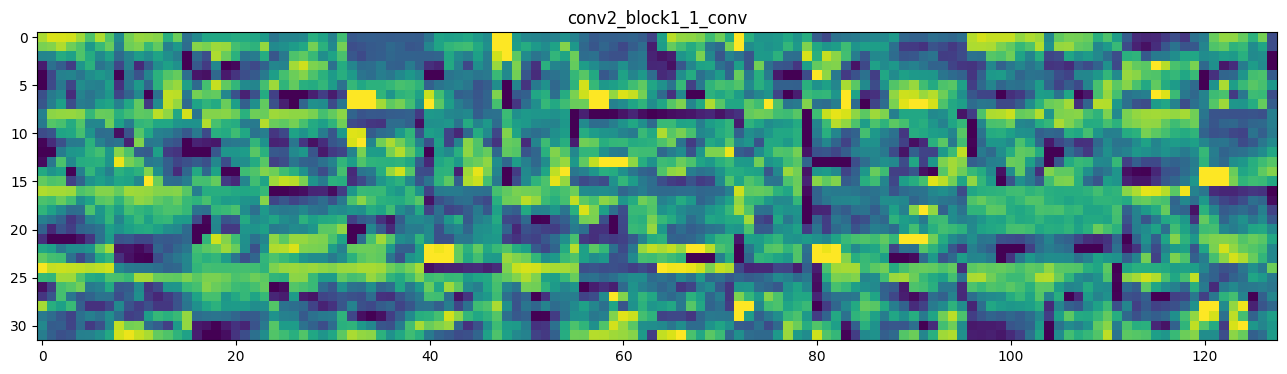

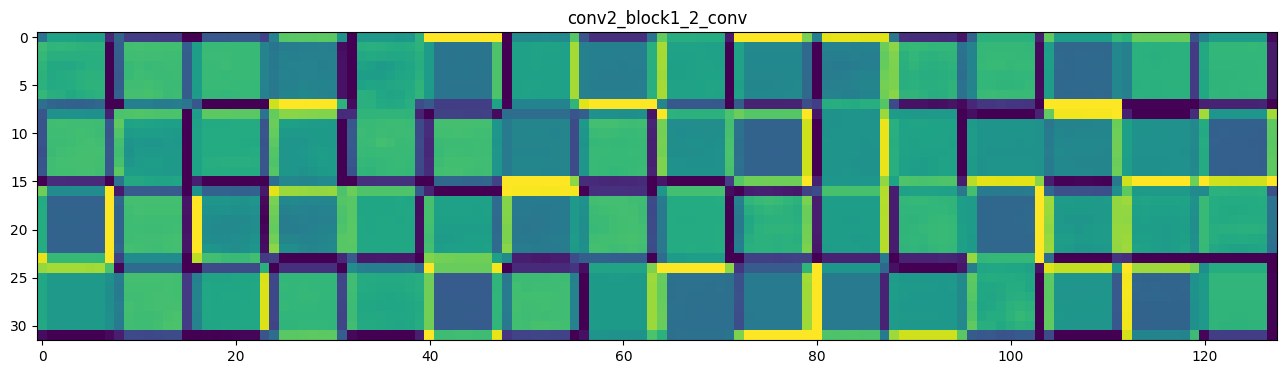

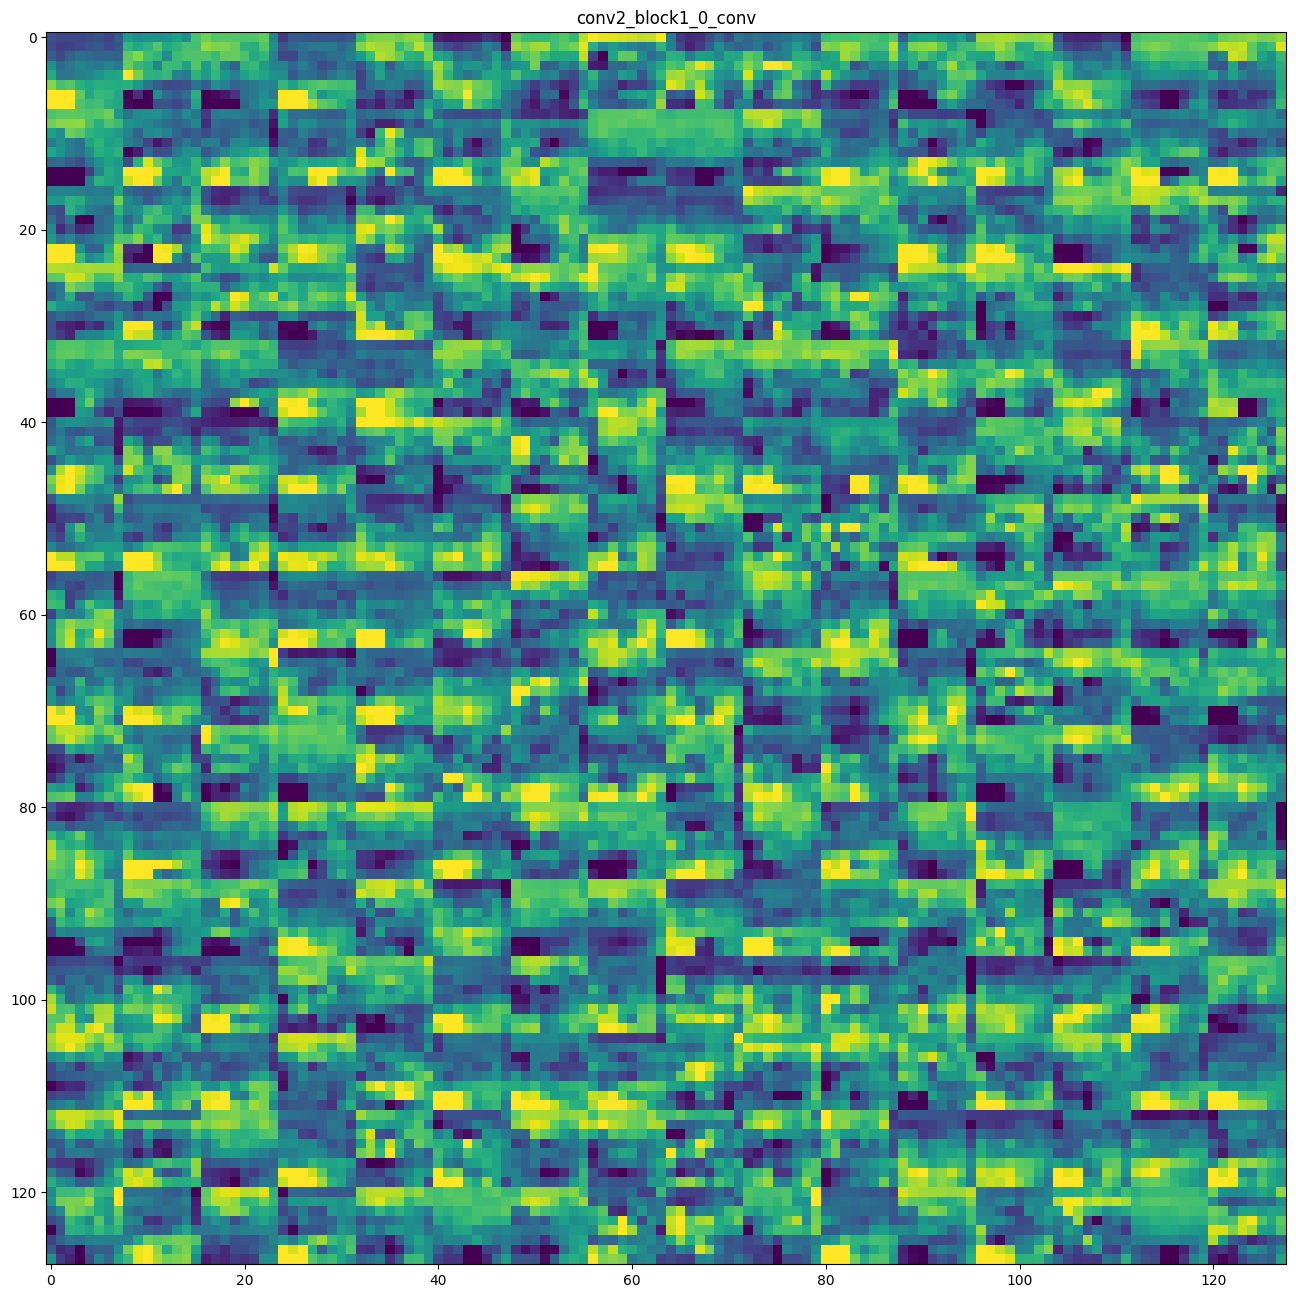

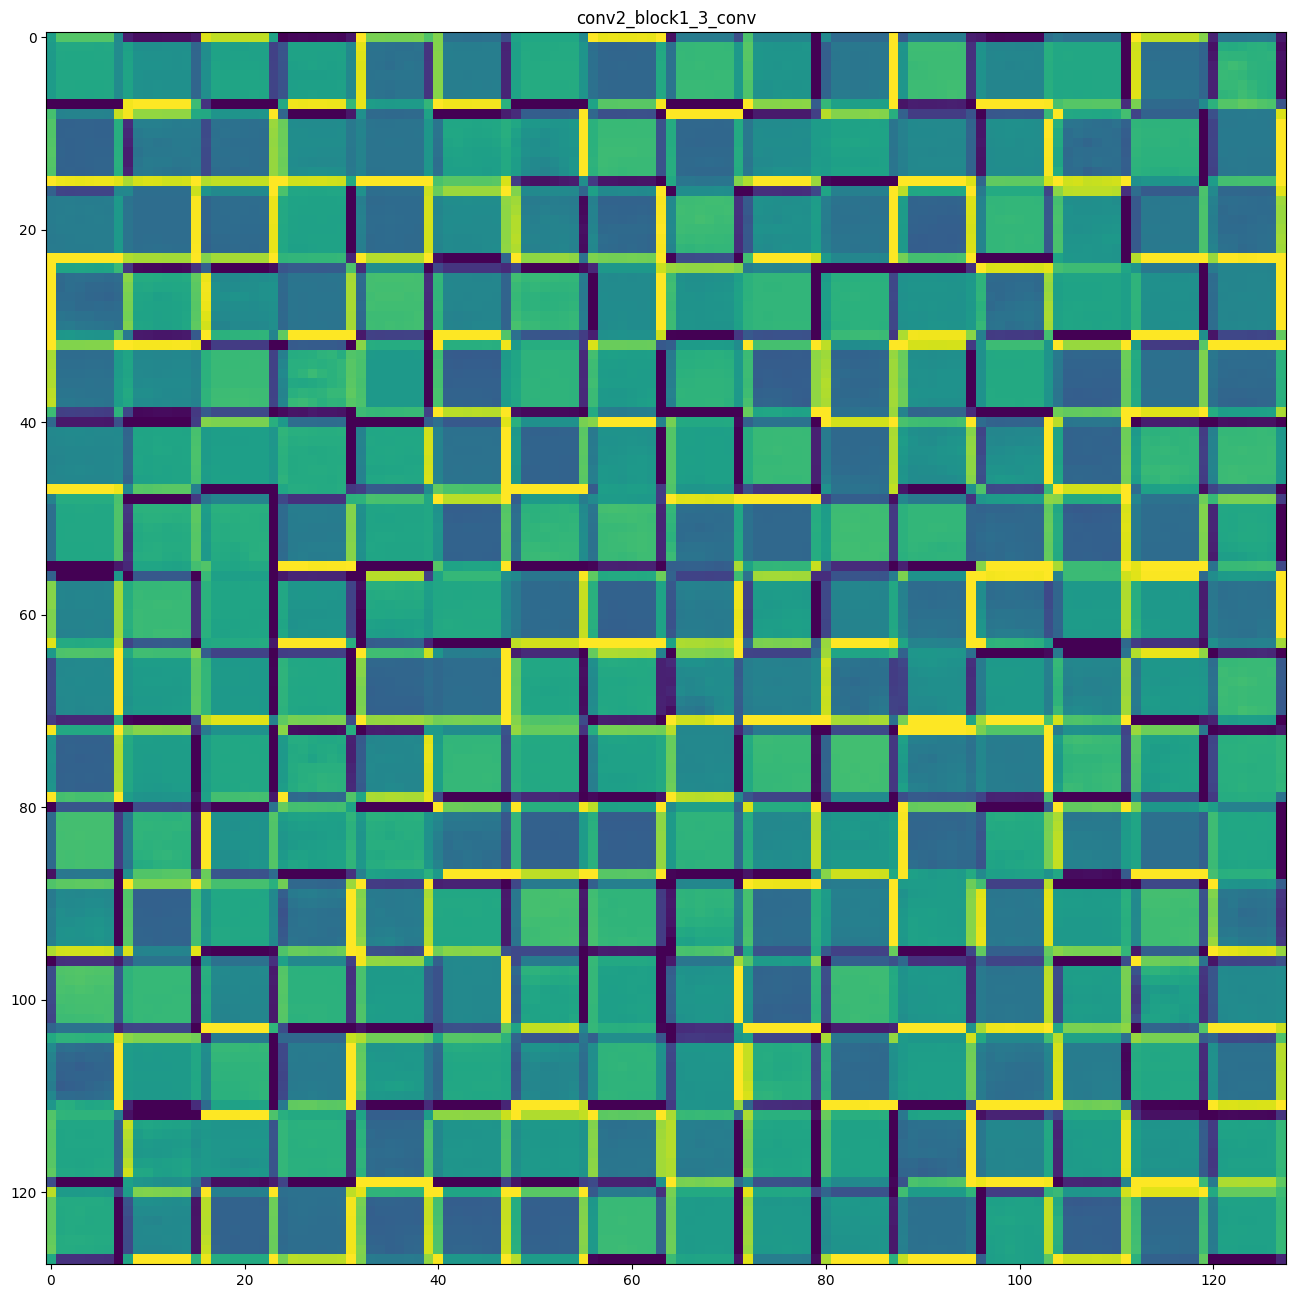

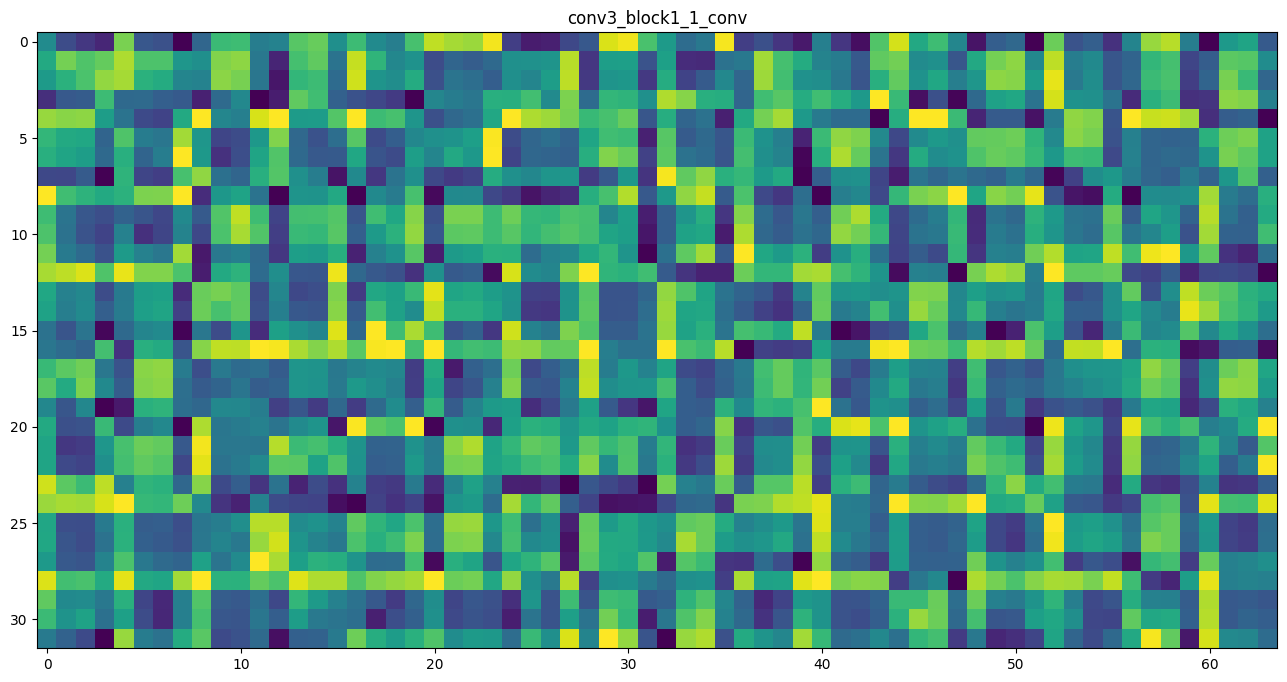

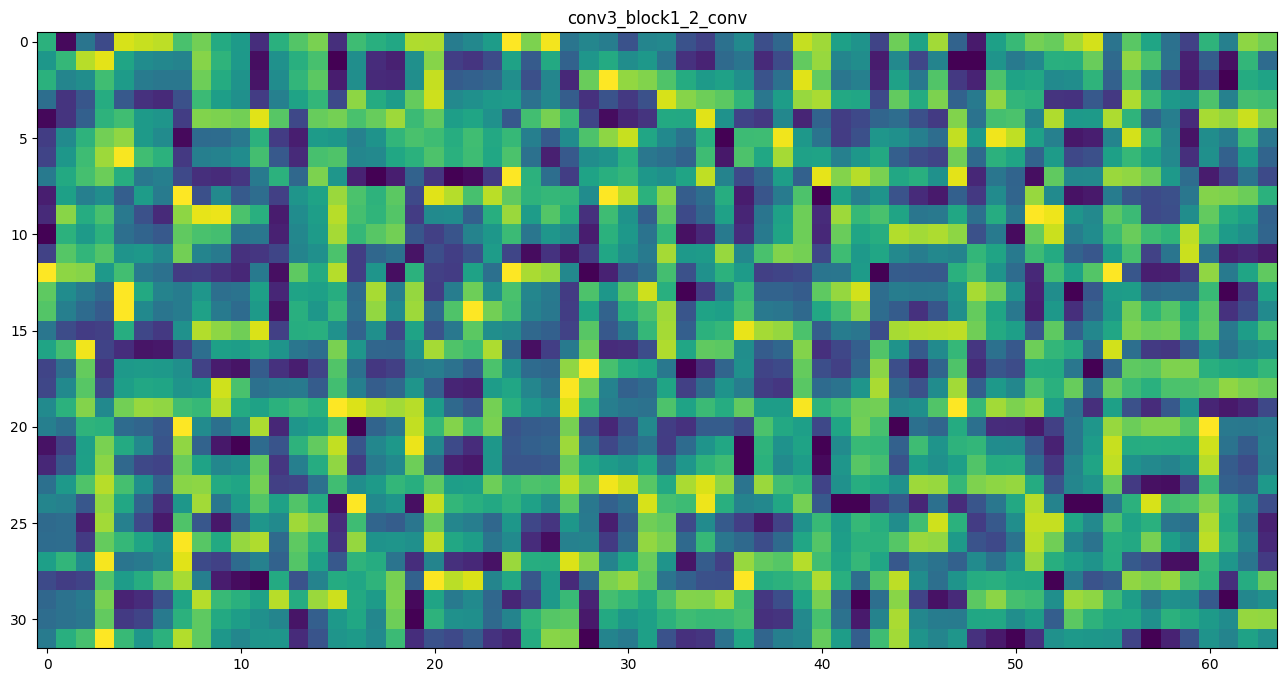

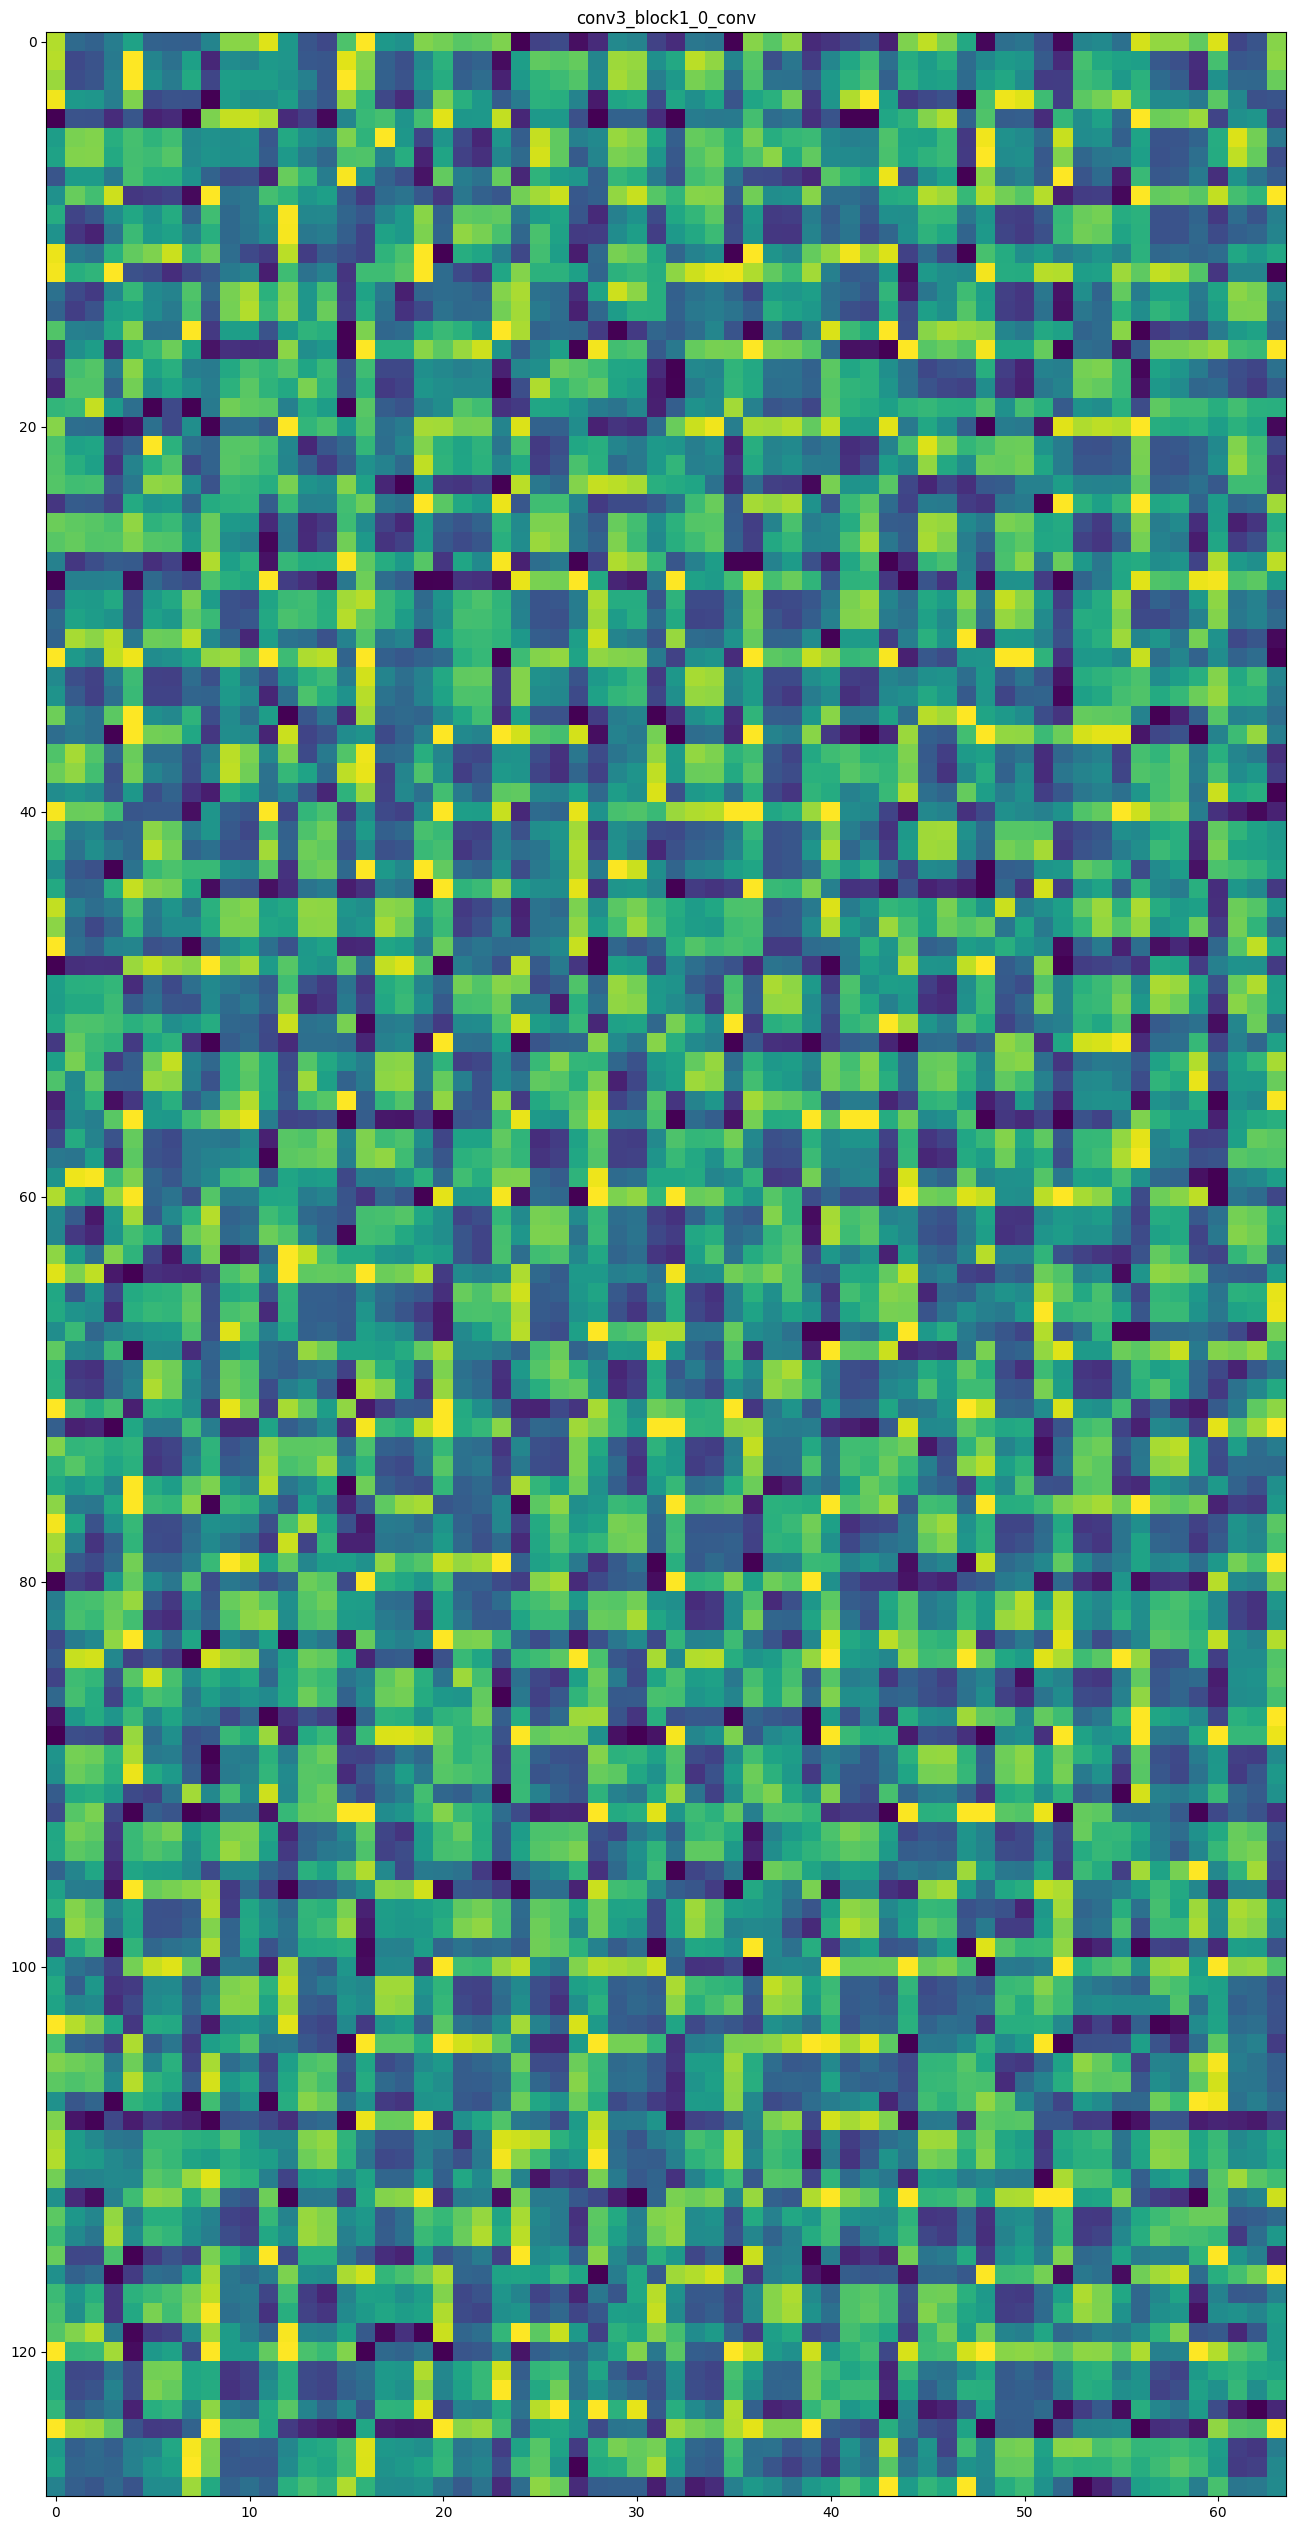

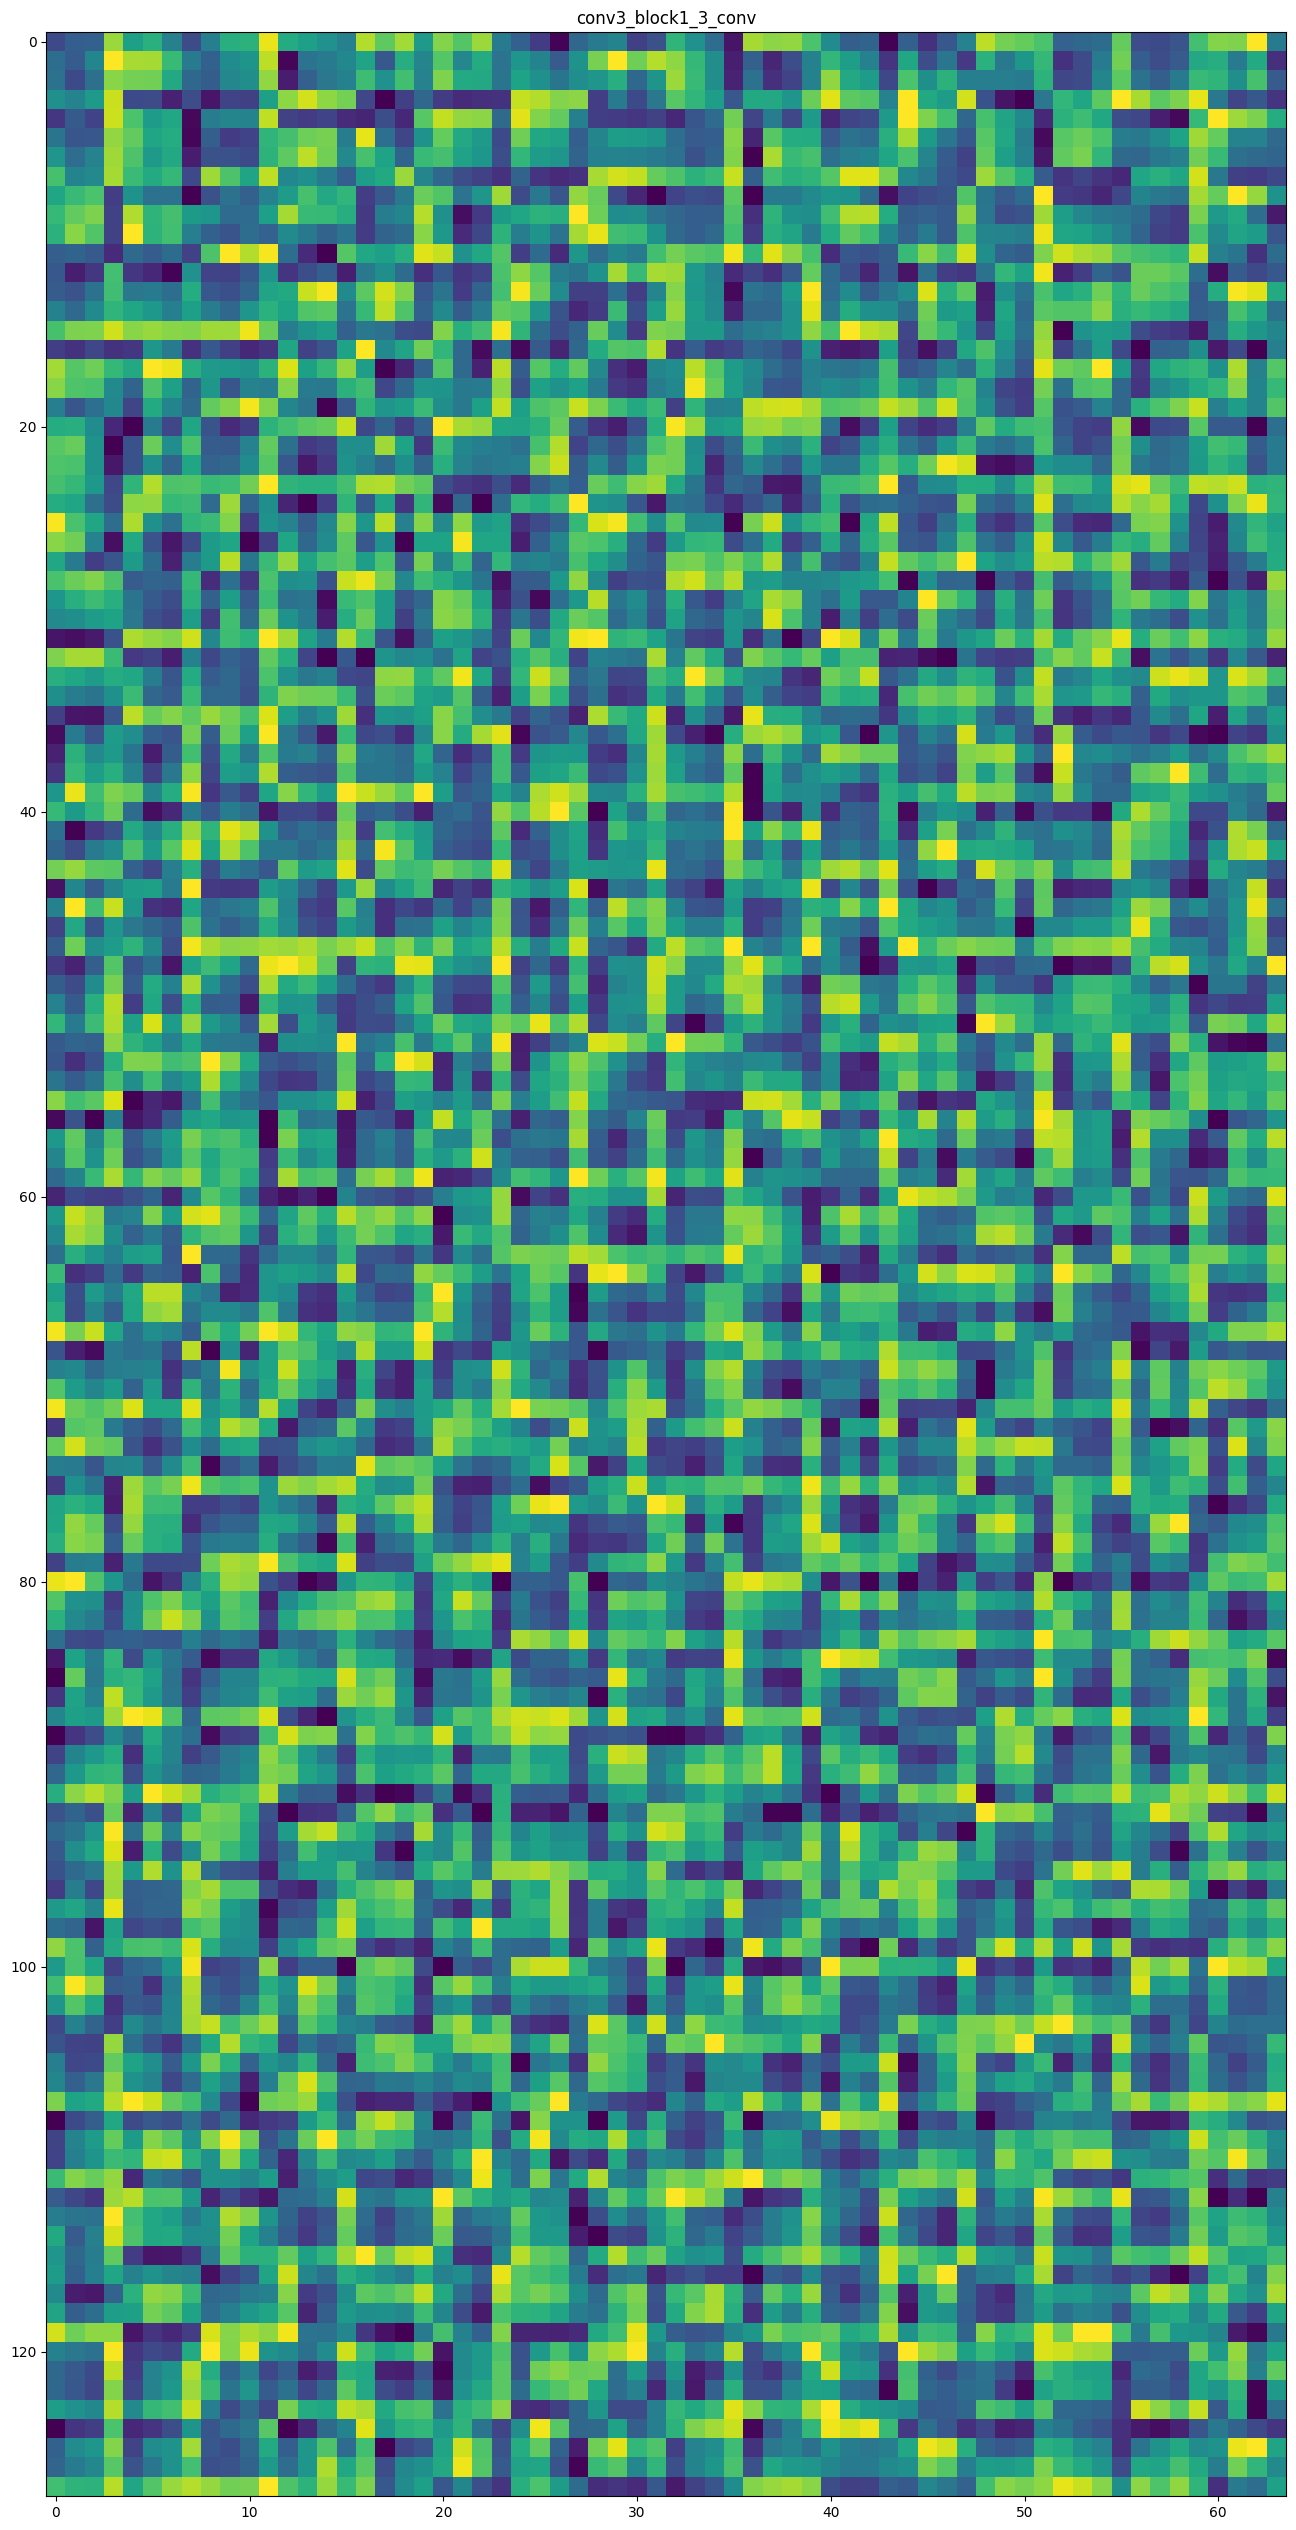

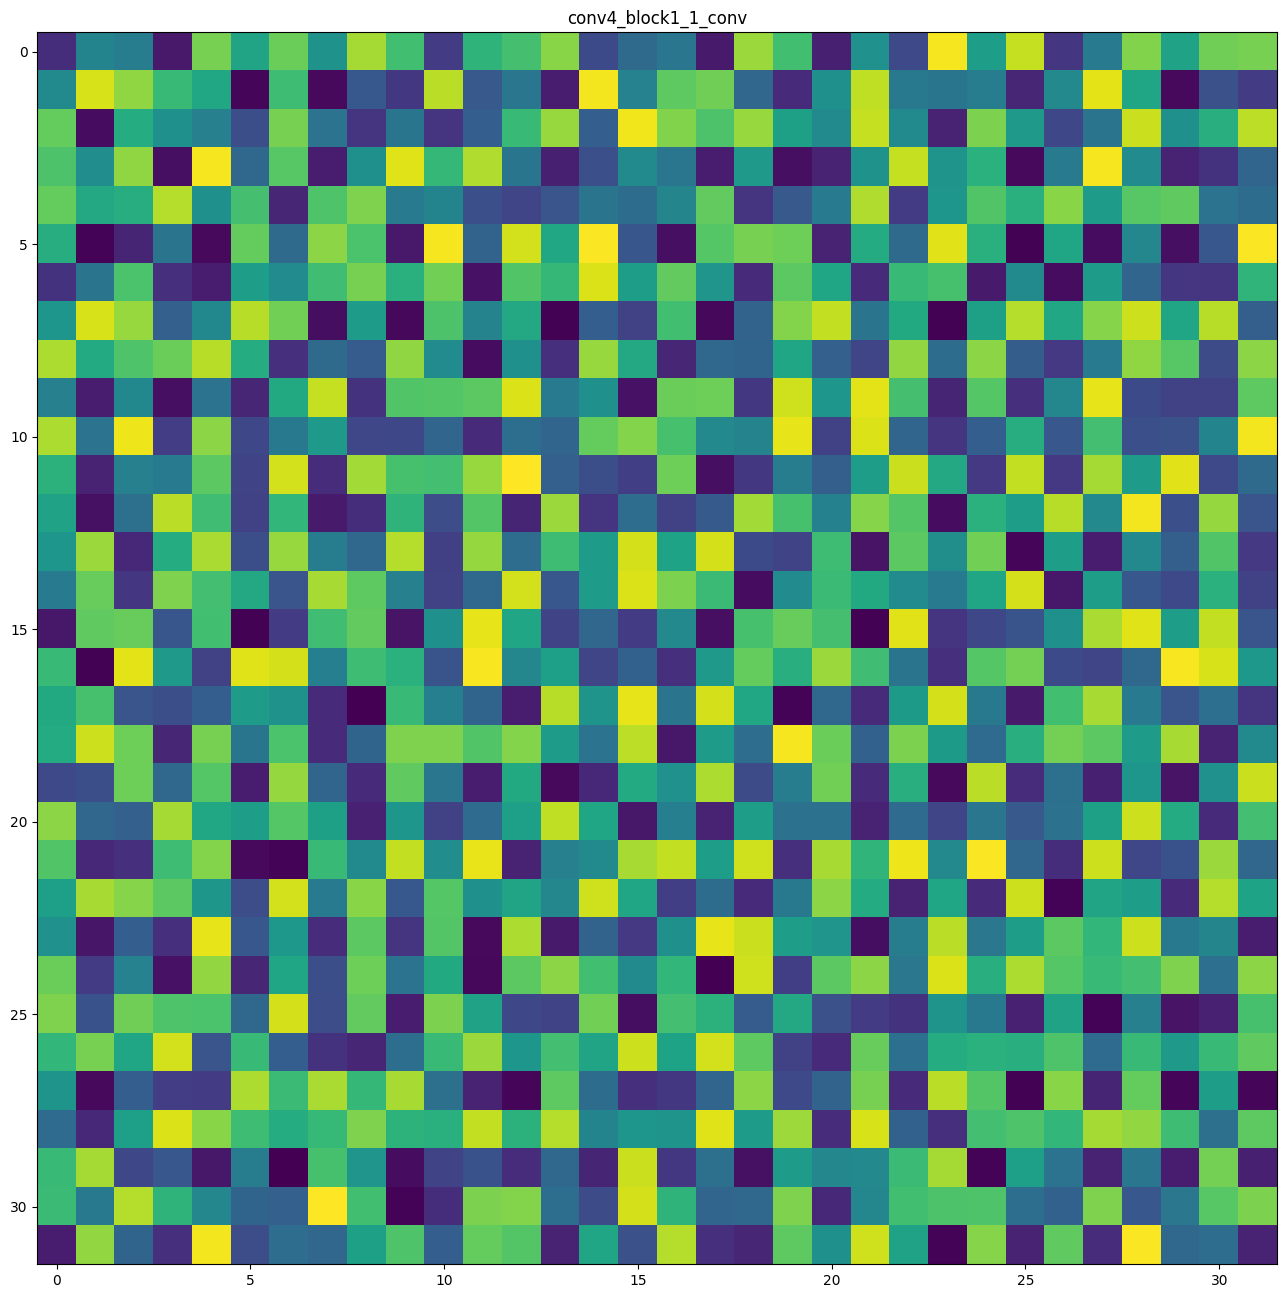

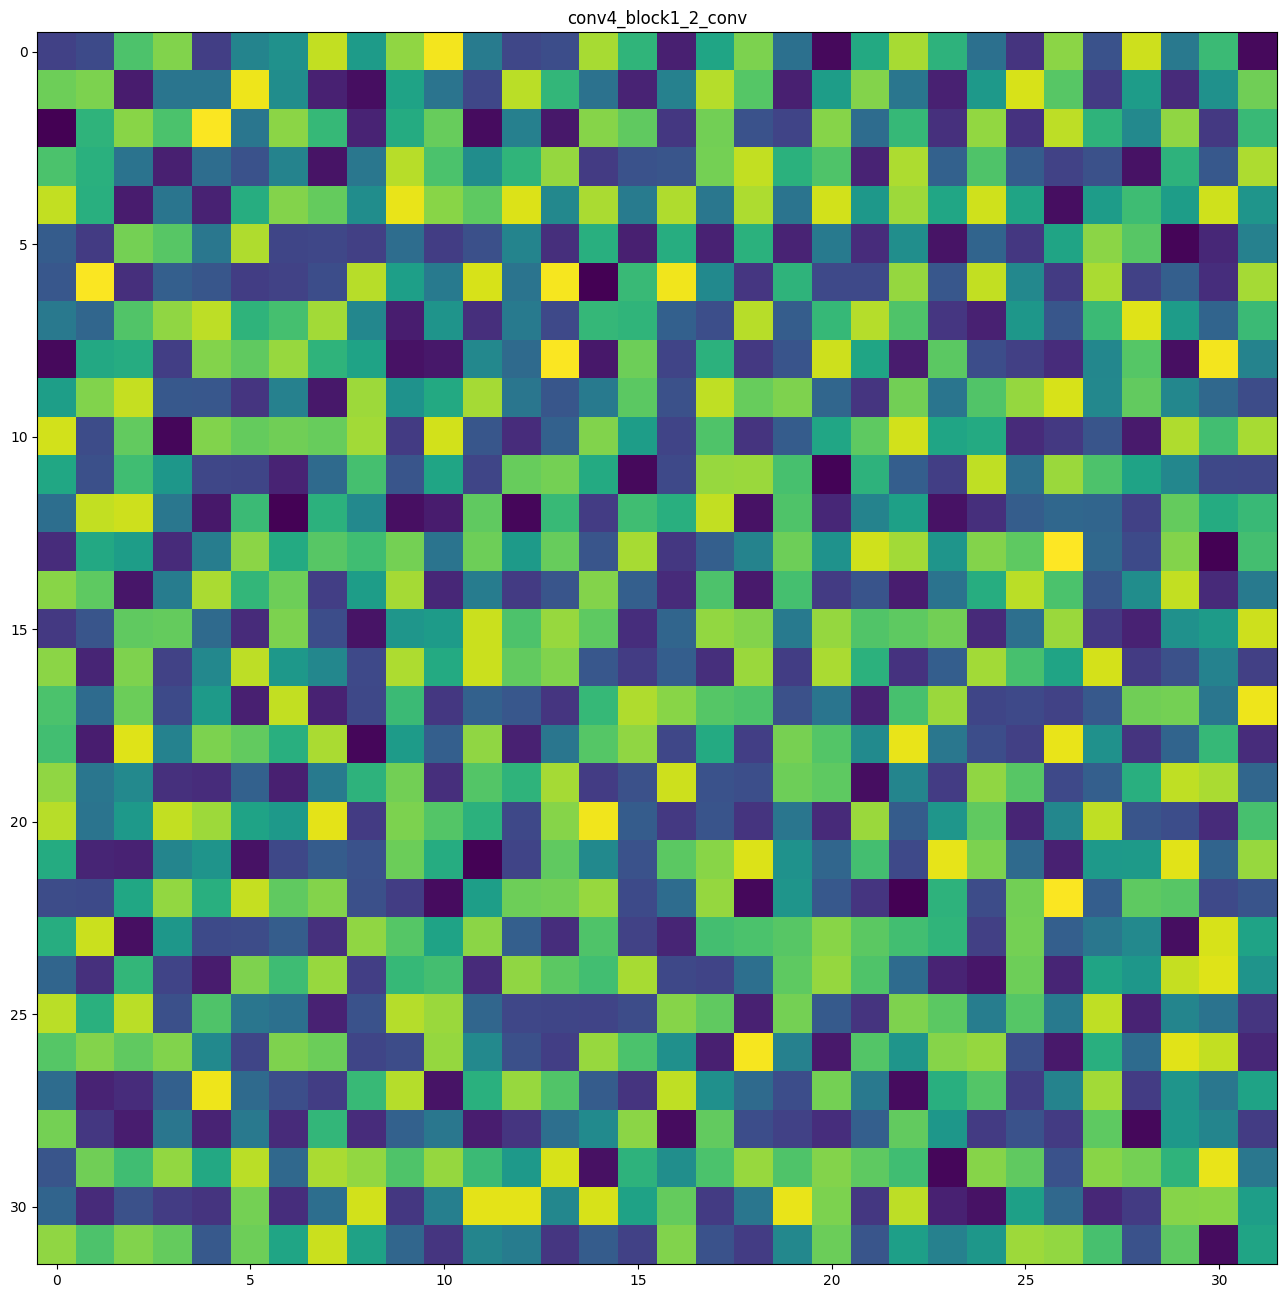

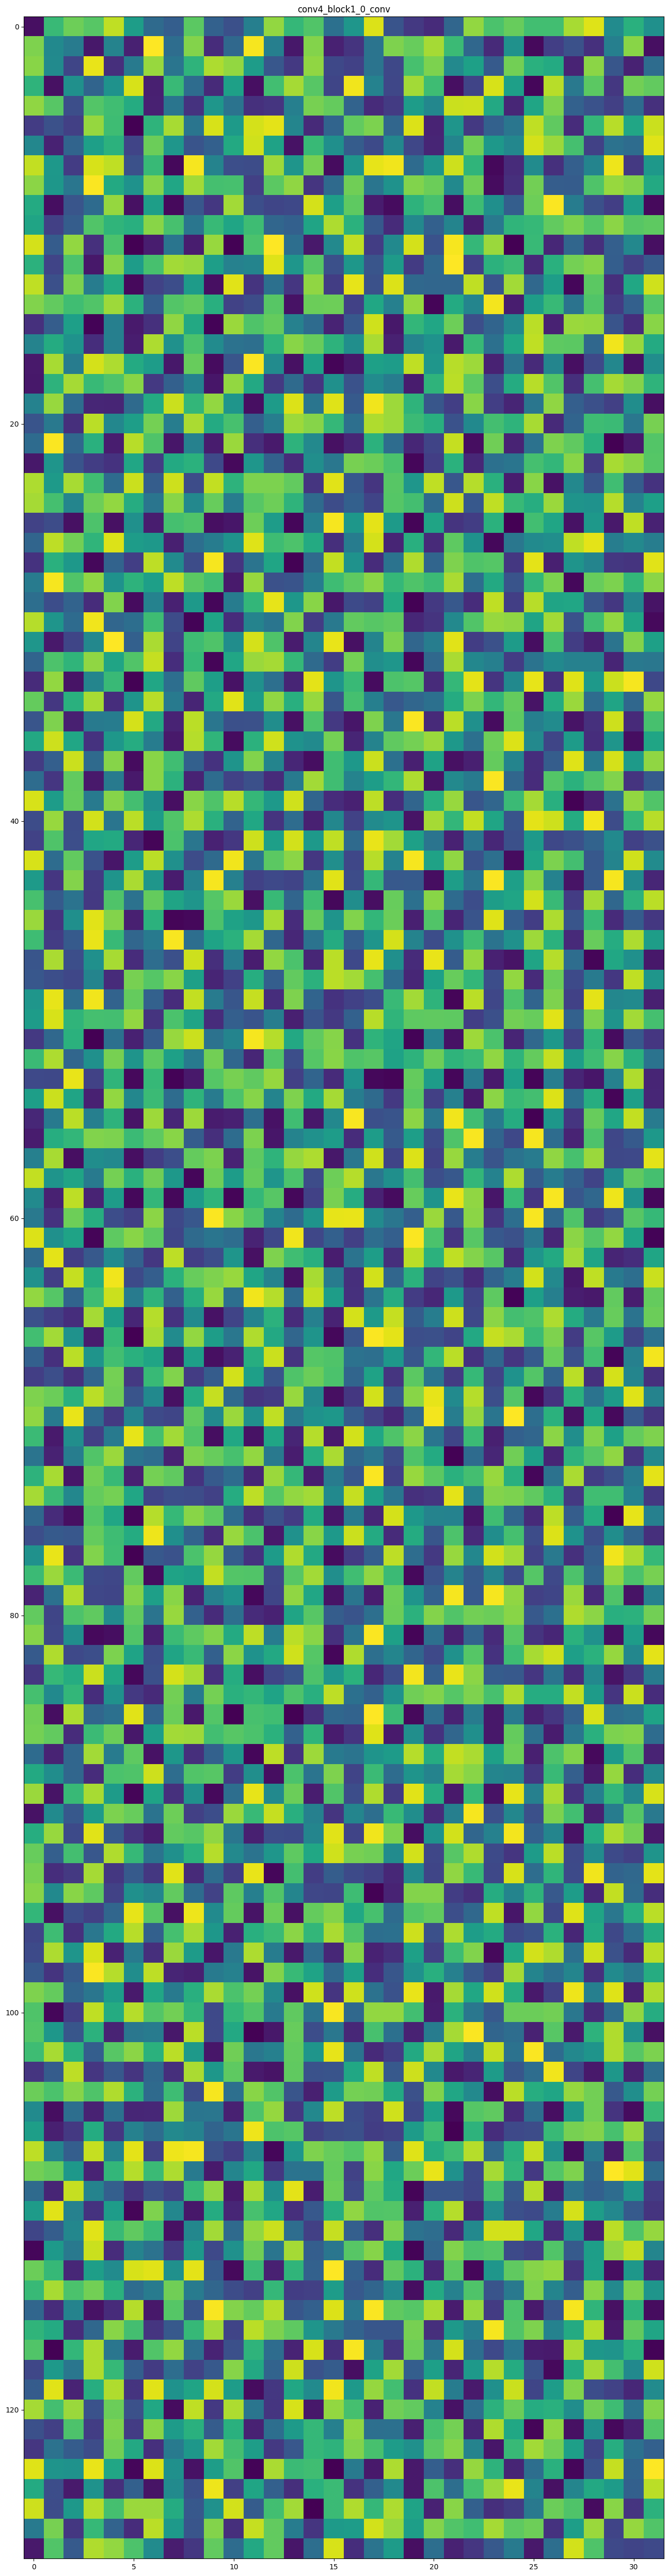

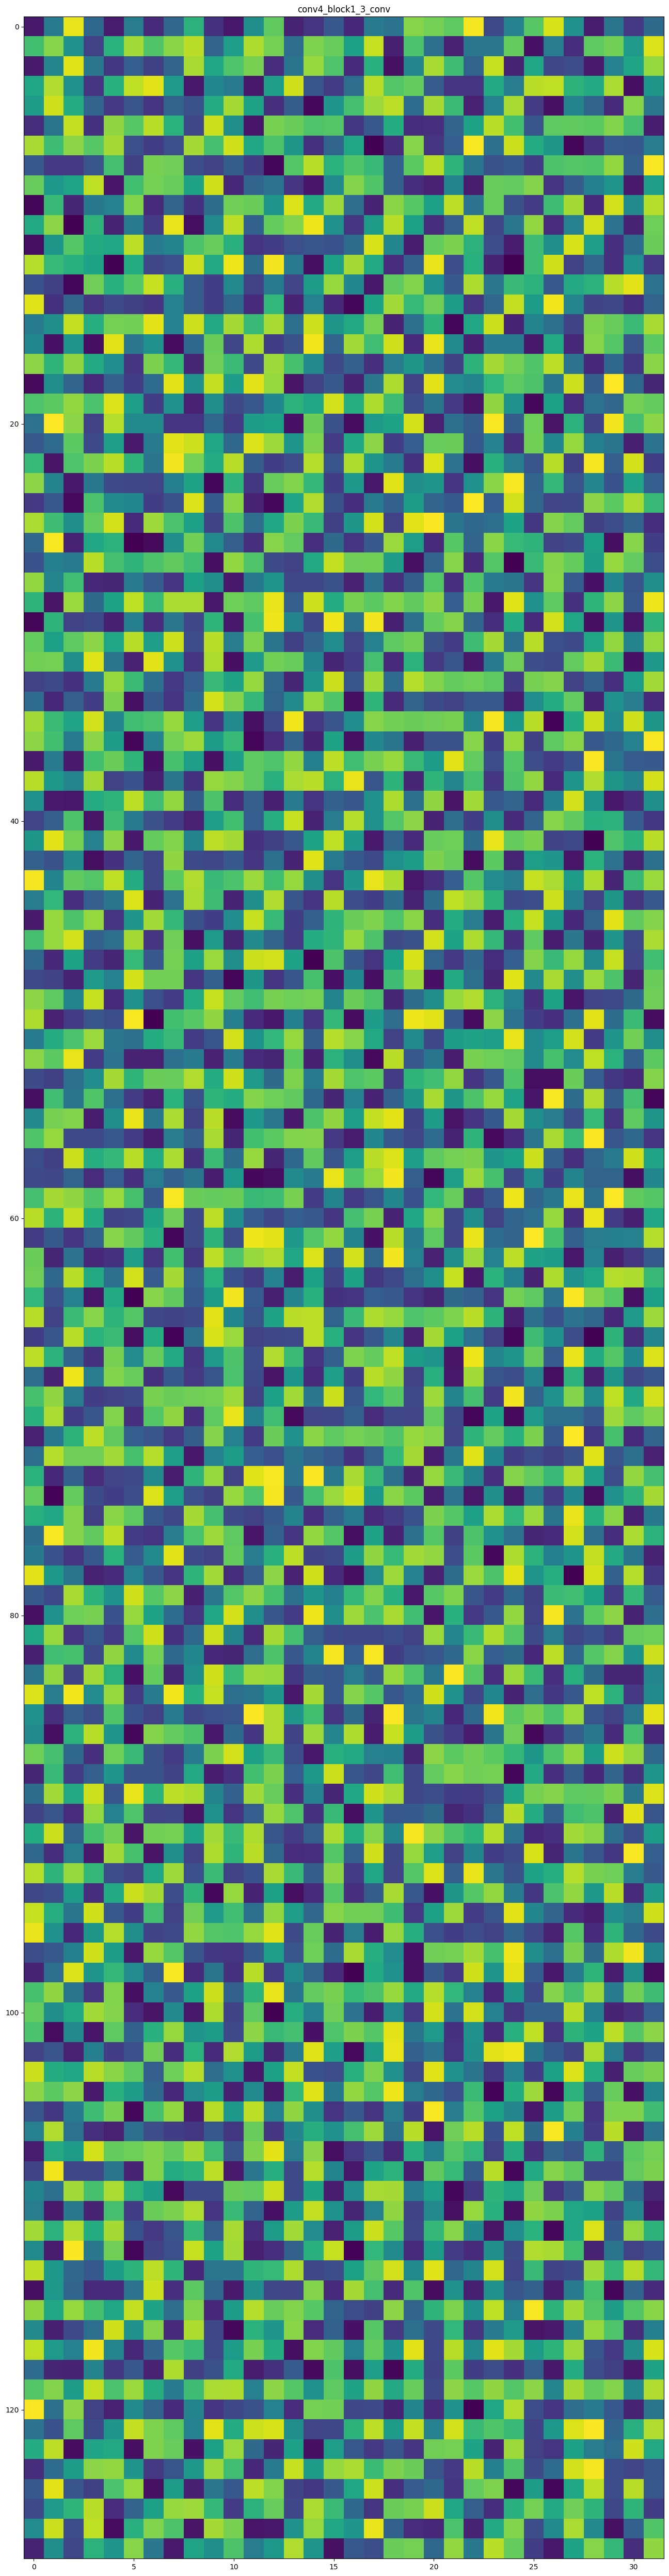

In [75]:
images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(block1_names, activations1):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()

In [219]:
#### After transfer learning ########
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
sample_img = X_test[1]
sample_img = sample_img.astype('float32')
sample_img = tf.keras.applications.resnet50.preprocess_input(sample_img)
sample_img = np.expand_dims(sample_img, axis=0)
sample_img /= 255
layer_names = []
for layer in ship_model.layers:
  if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
    layer_outputs.append(layer.output)
    layer_names.append(layer.name)

#splice into block
block6_names = []
block6_outputs = []
for layer, out in zip(layer_names, layer_outputs):
  if 'block1' in layer:
    if 'conv5' not in layer:
      block1_outputs.append(out)
      block1_names.append(layer)


activation1_model = keras.Model(inputs=ship_model.input, outputs=block1_outputs)

1/1 [==============================] - 0s 477ms/step


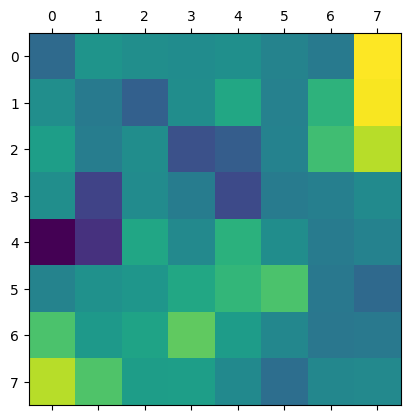

In [220]:
activations1 = activation1_model.predict(sample_img)
plt.matshow(first_layer_activation[0, :, :, 5], cmap="viridis")

<ipython-input-221-3b39f388669d>:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(scale * display_grid.shape[1],


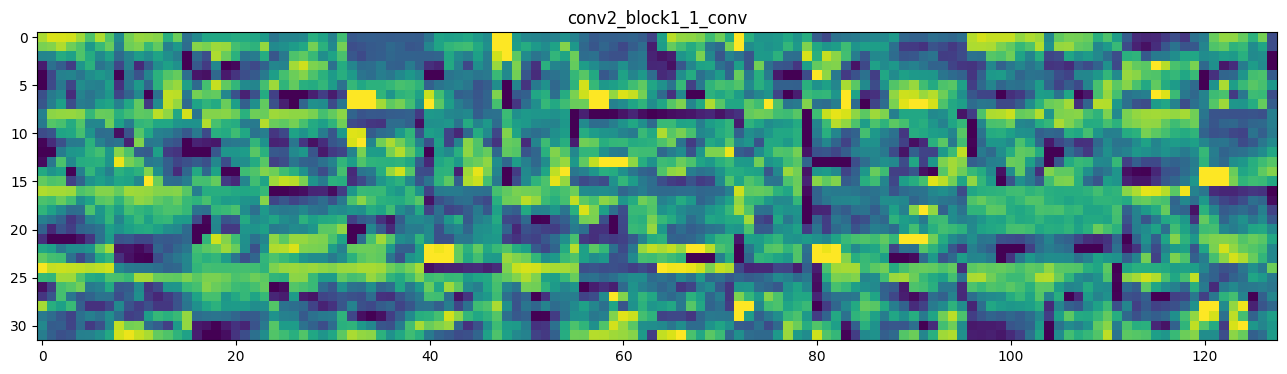

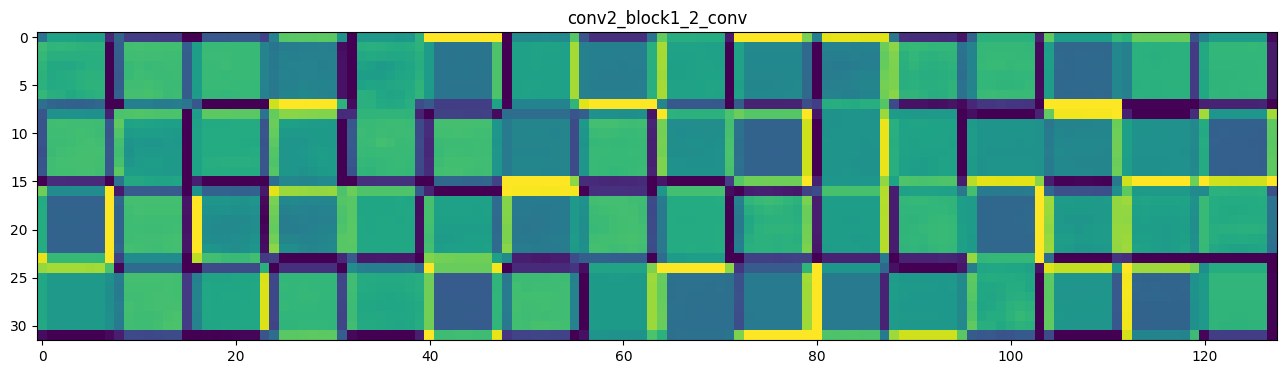

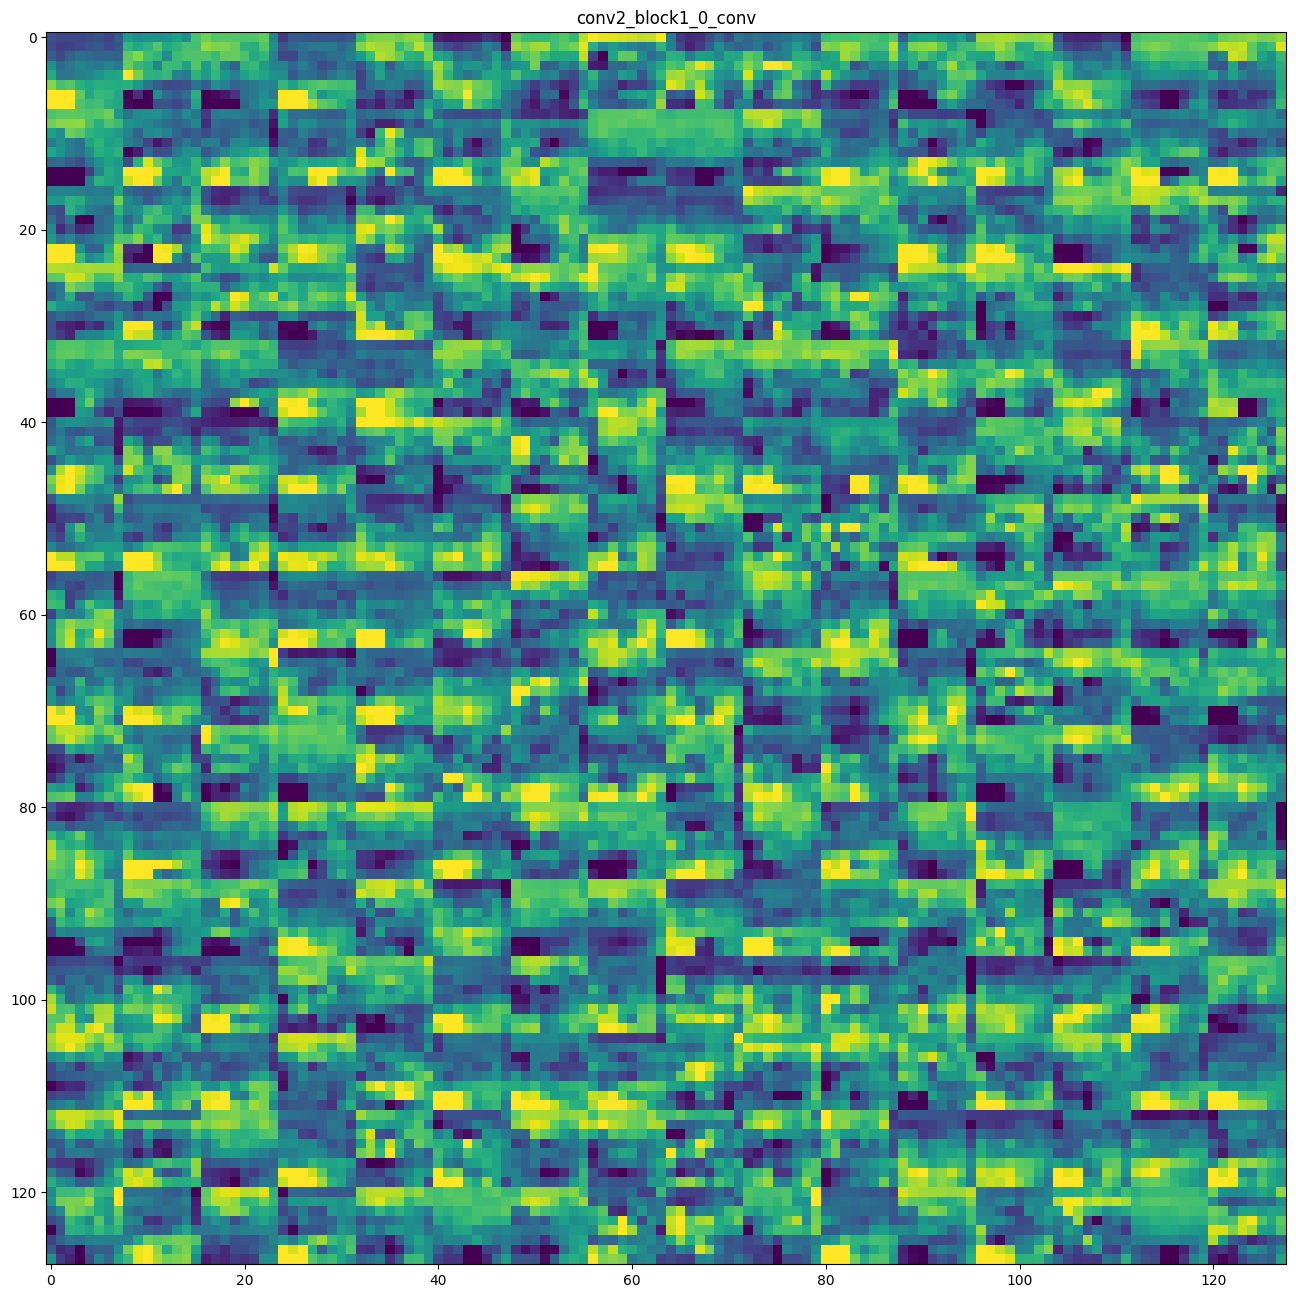

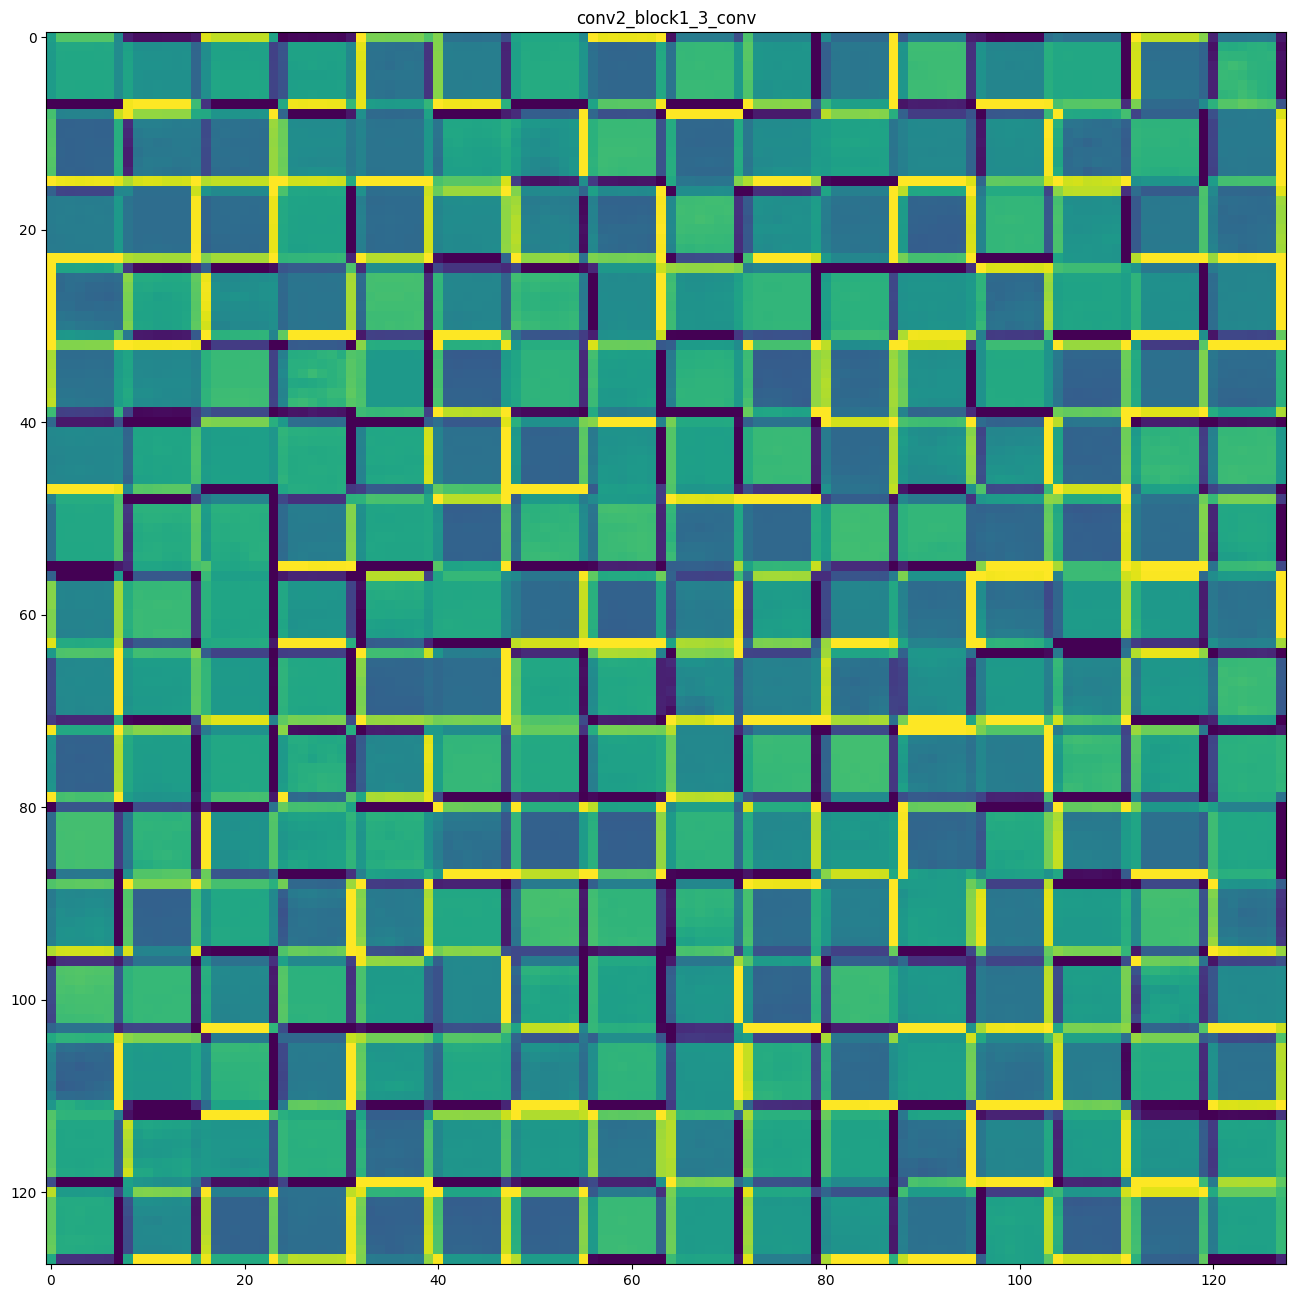

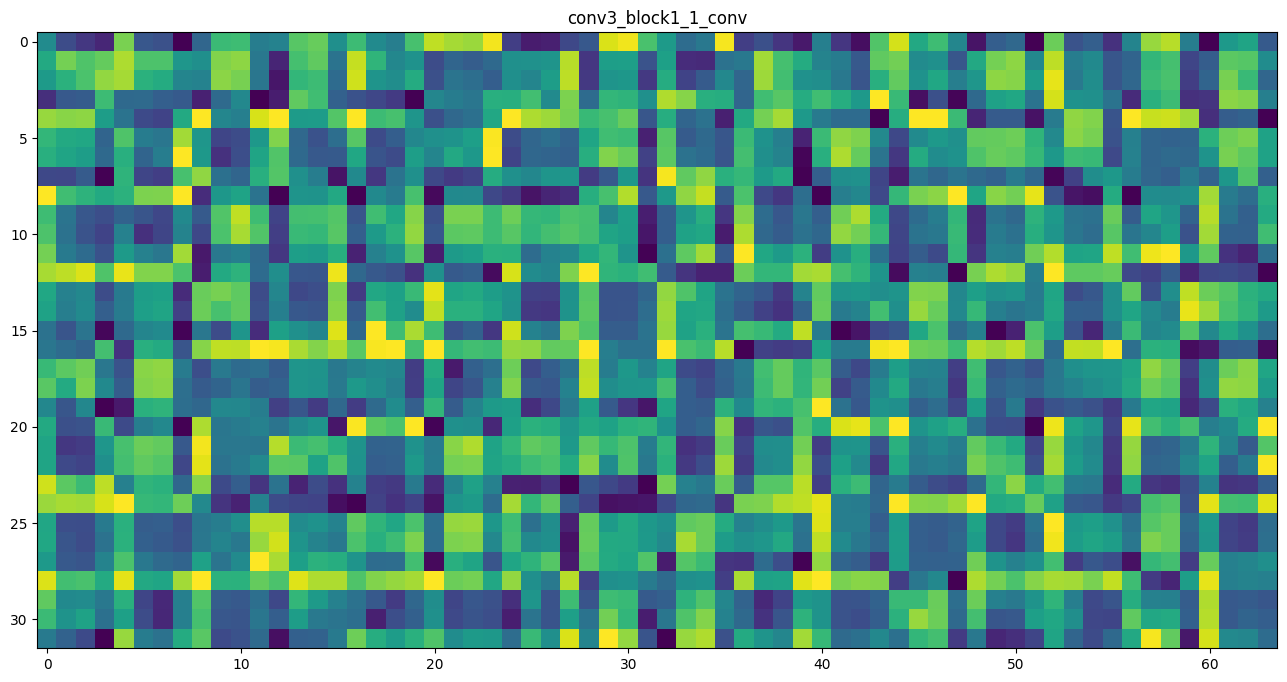

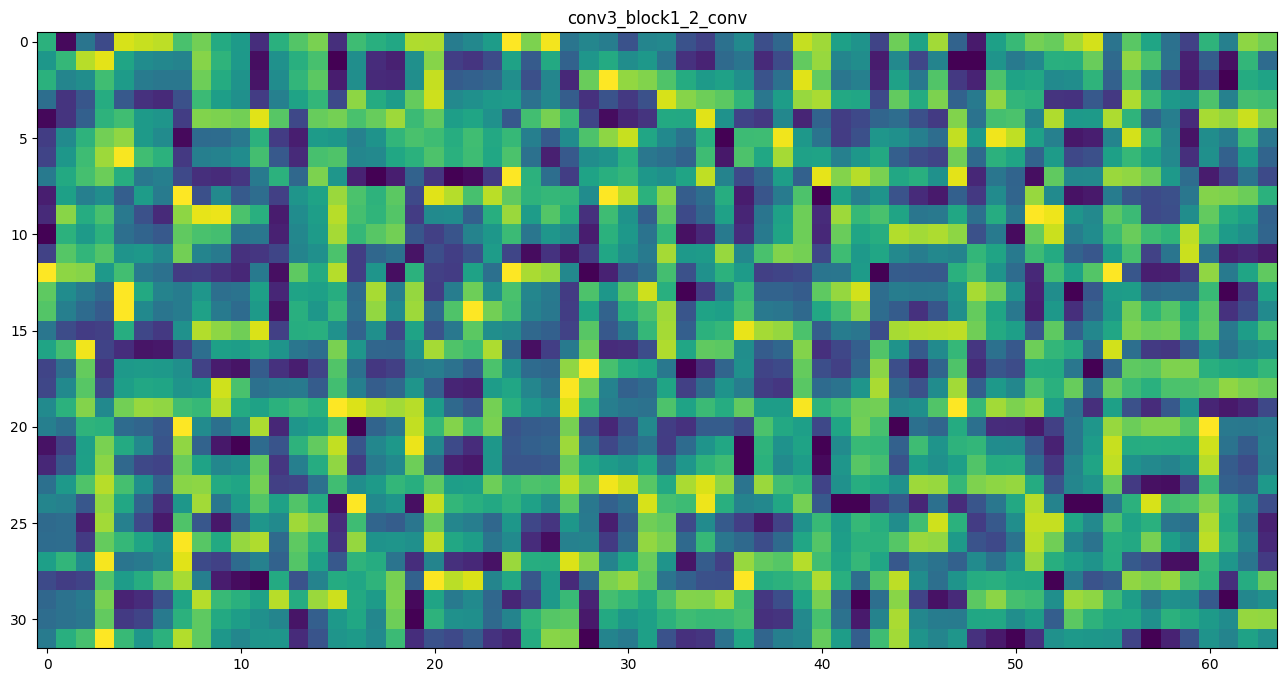

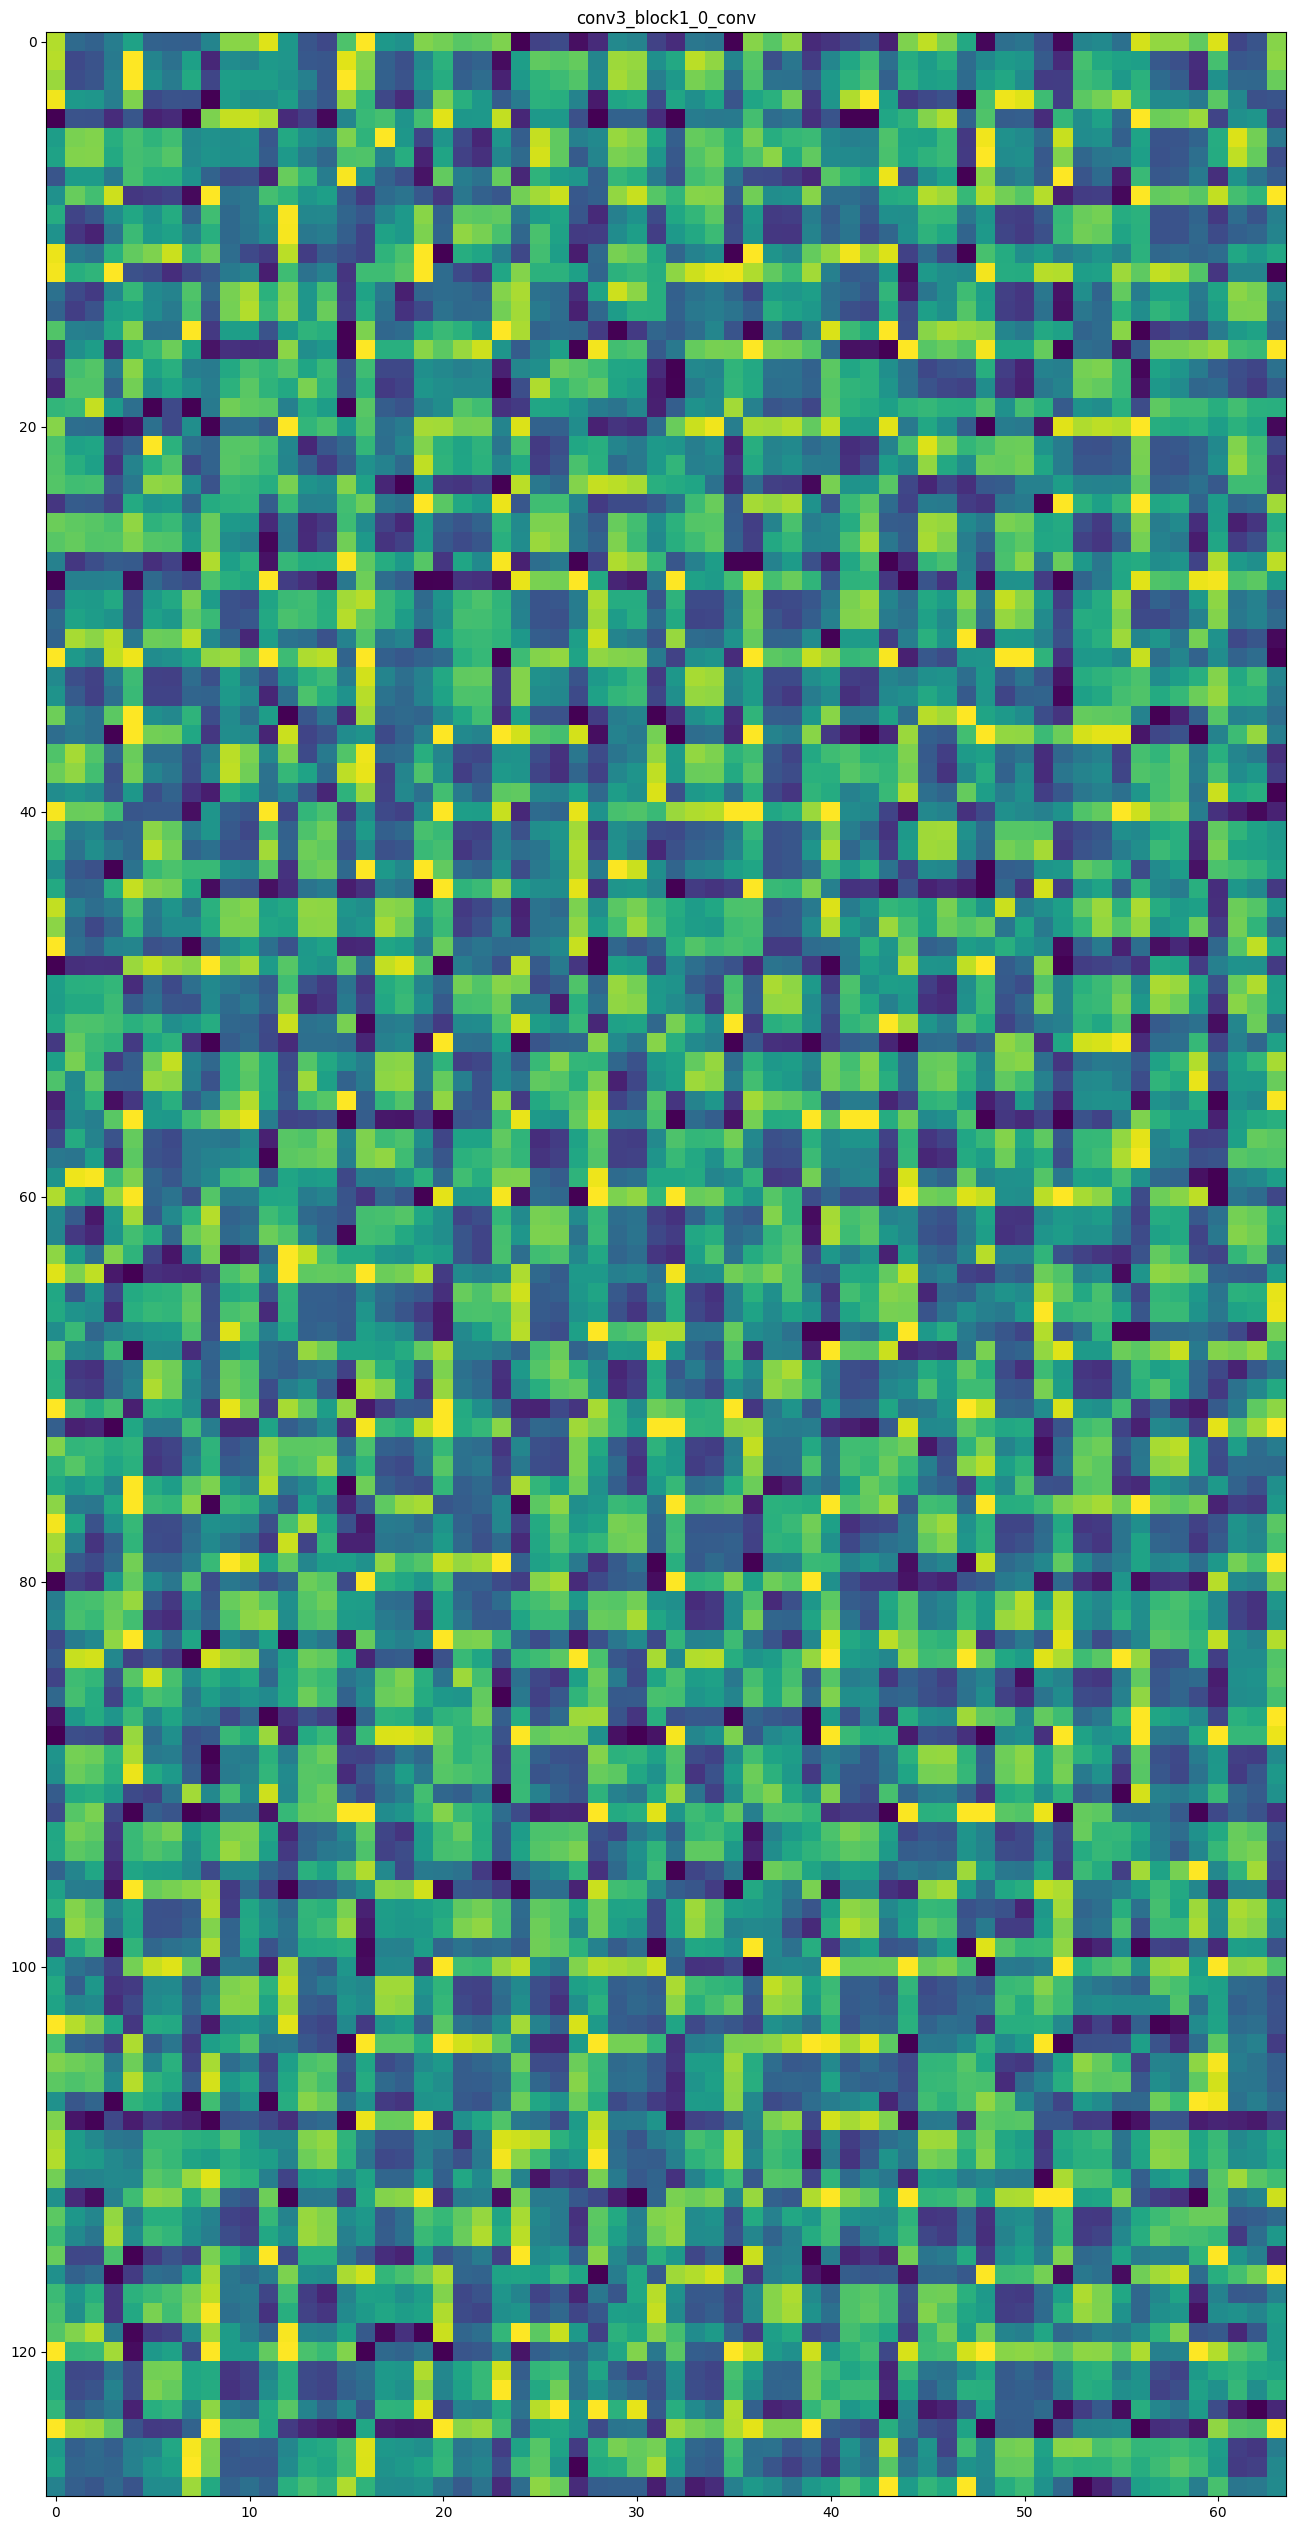

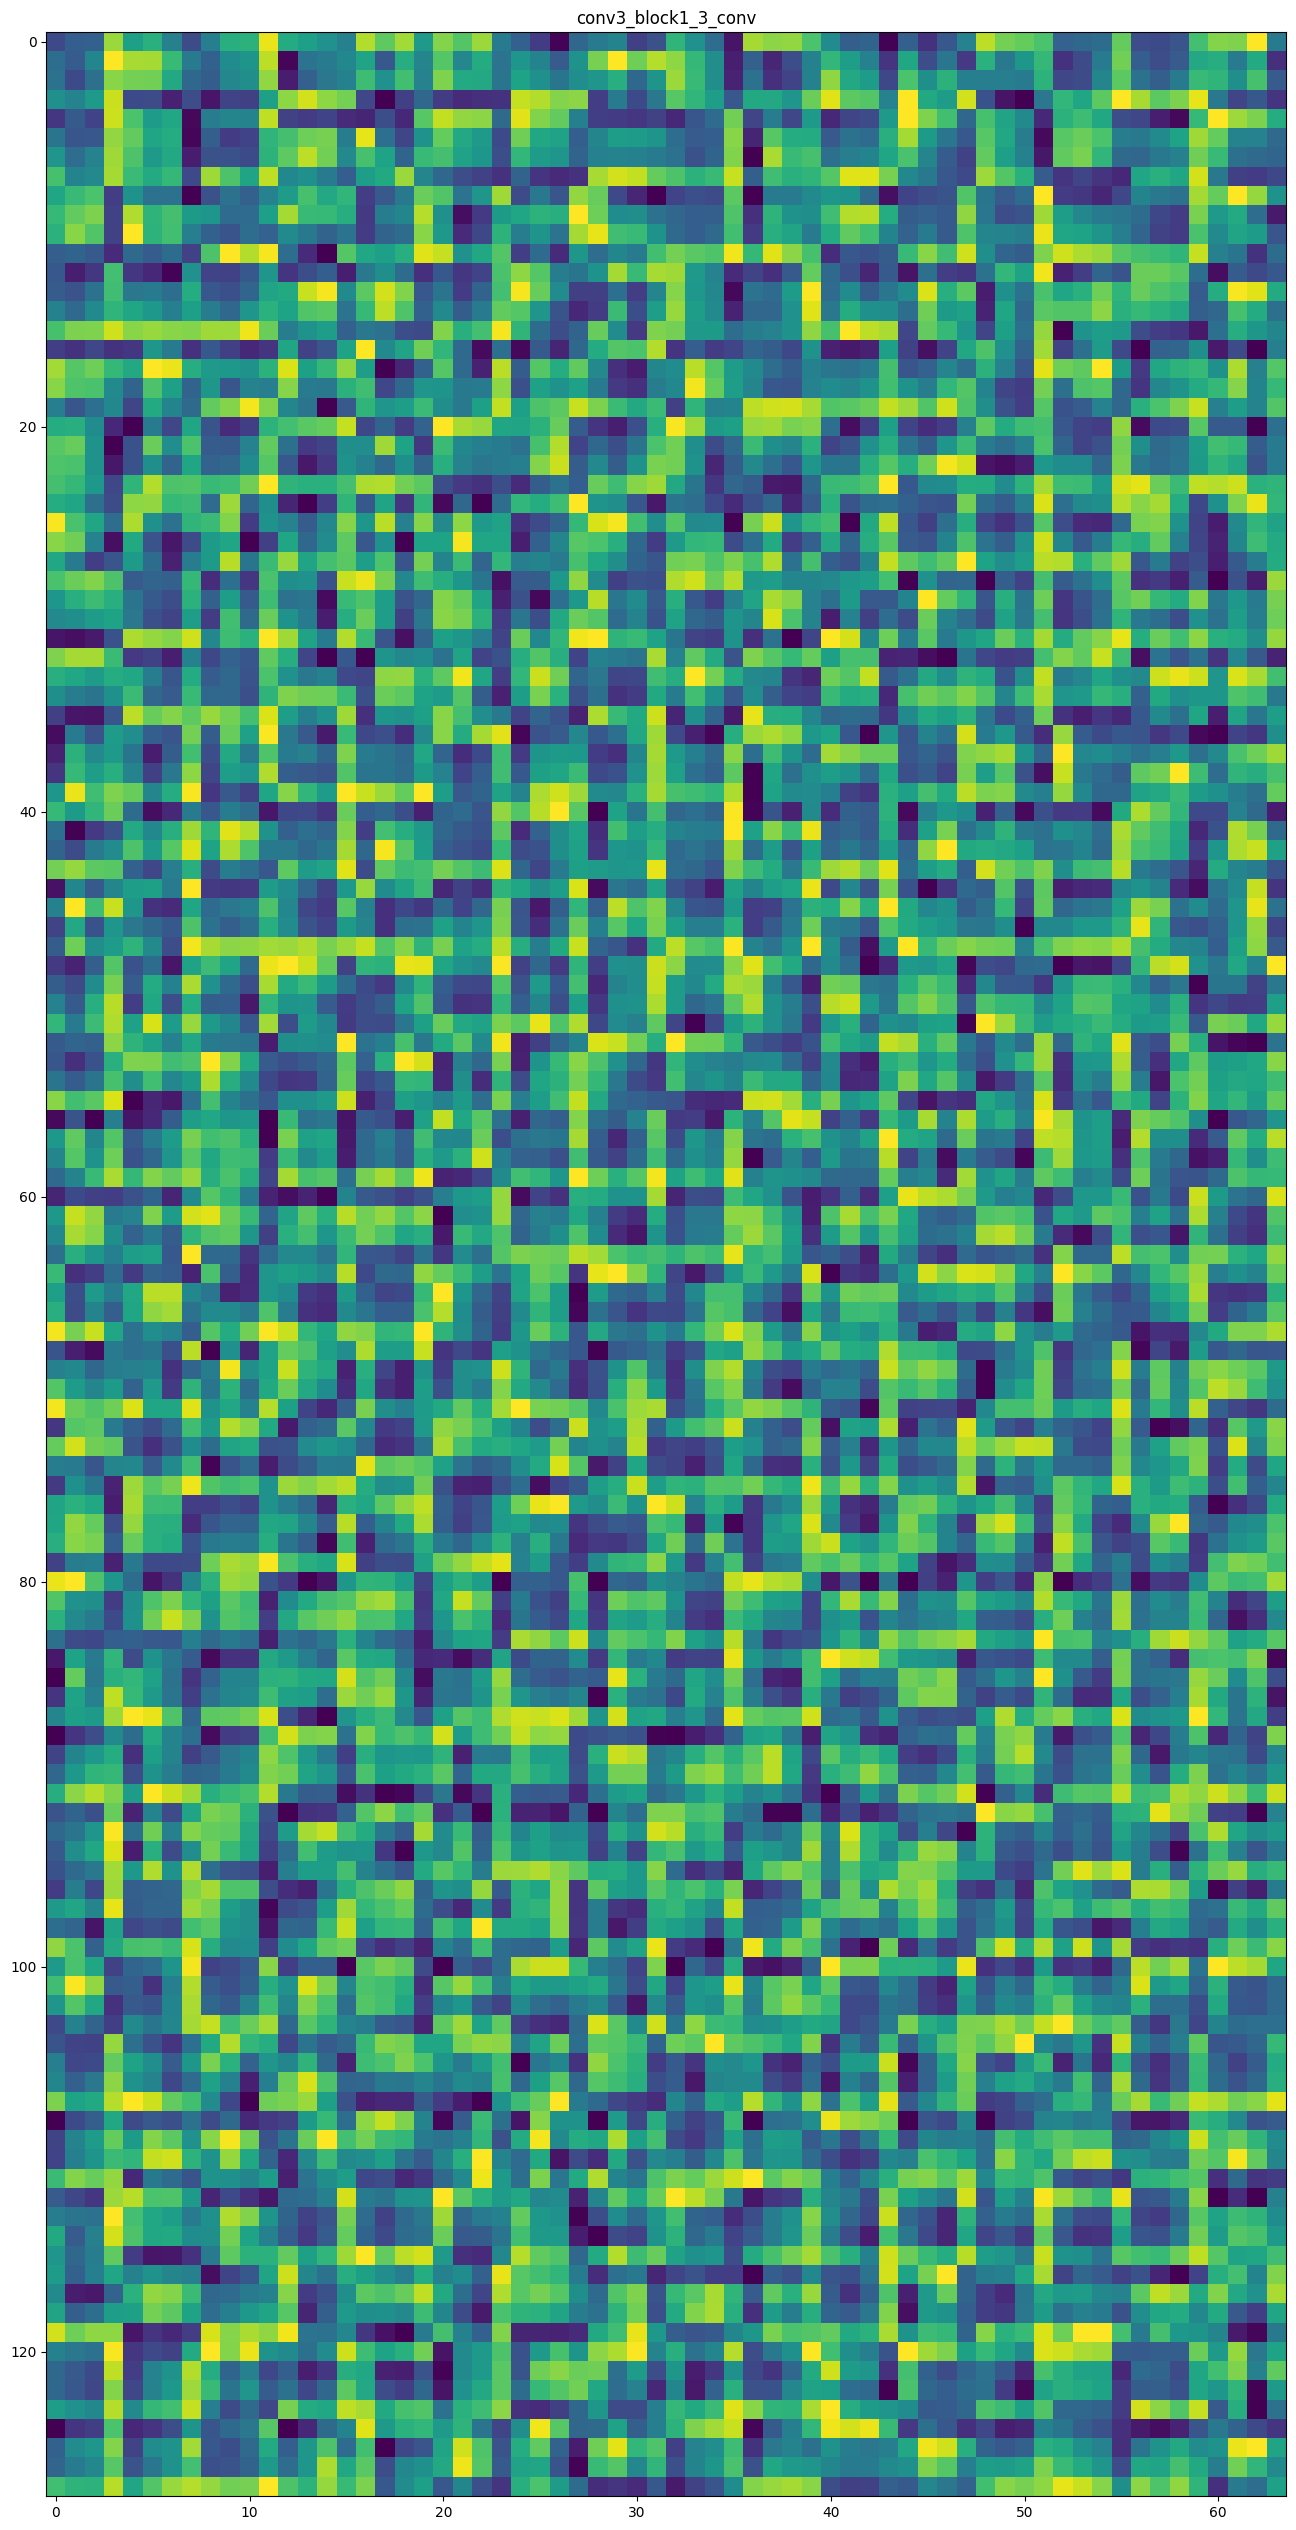

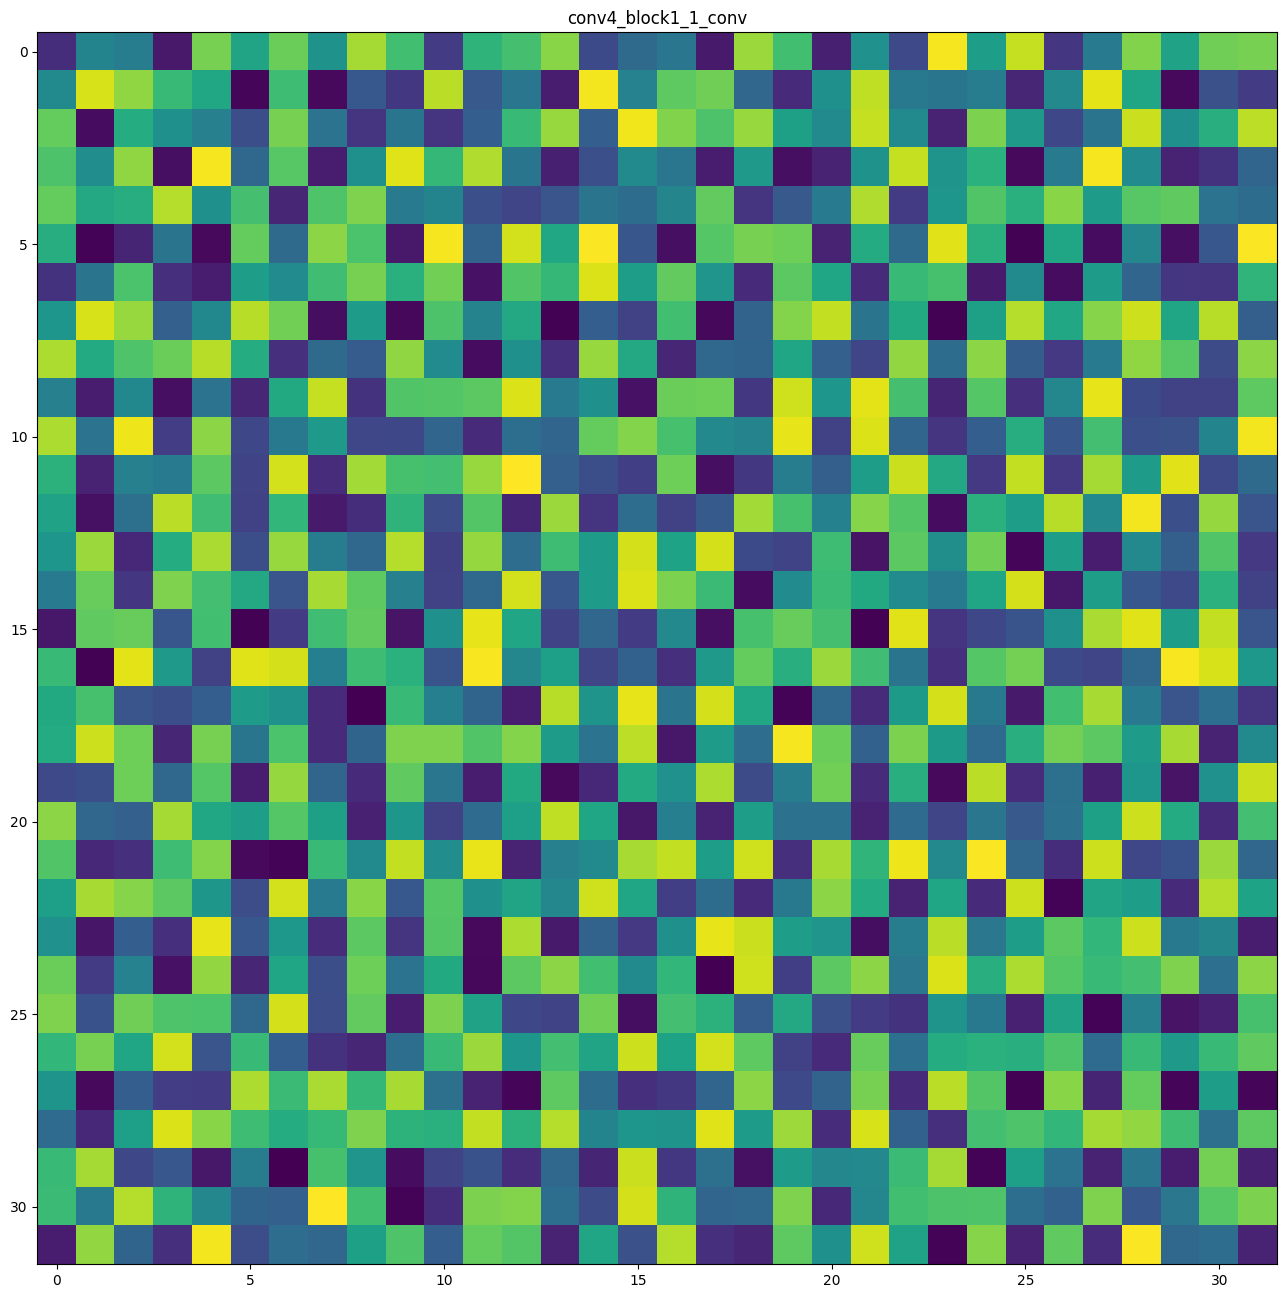

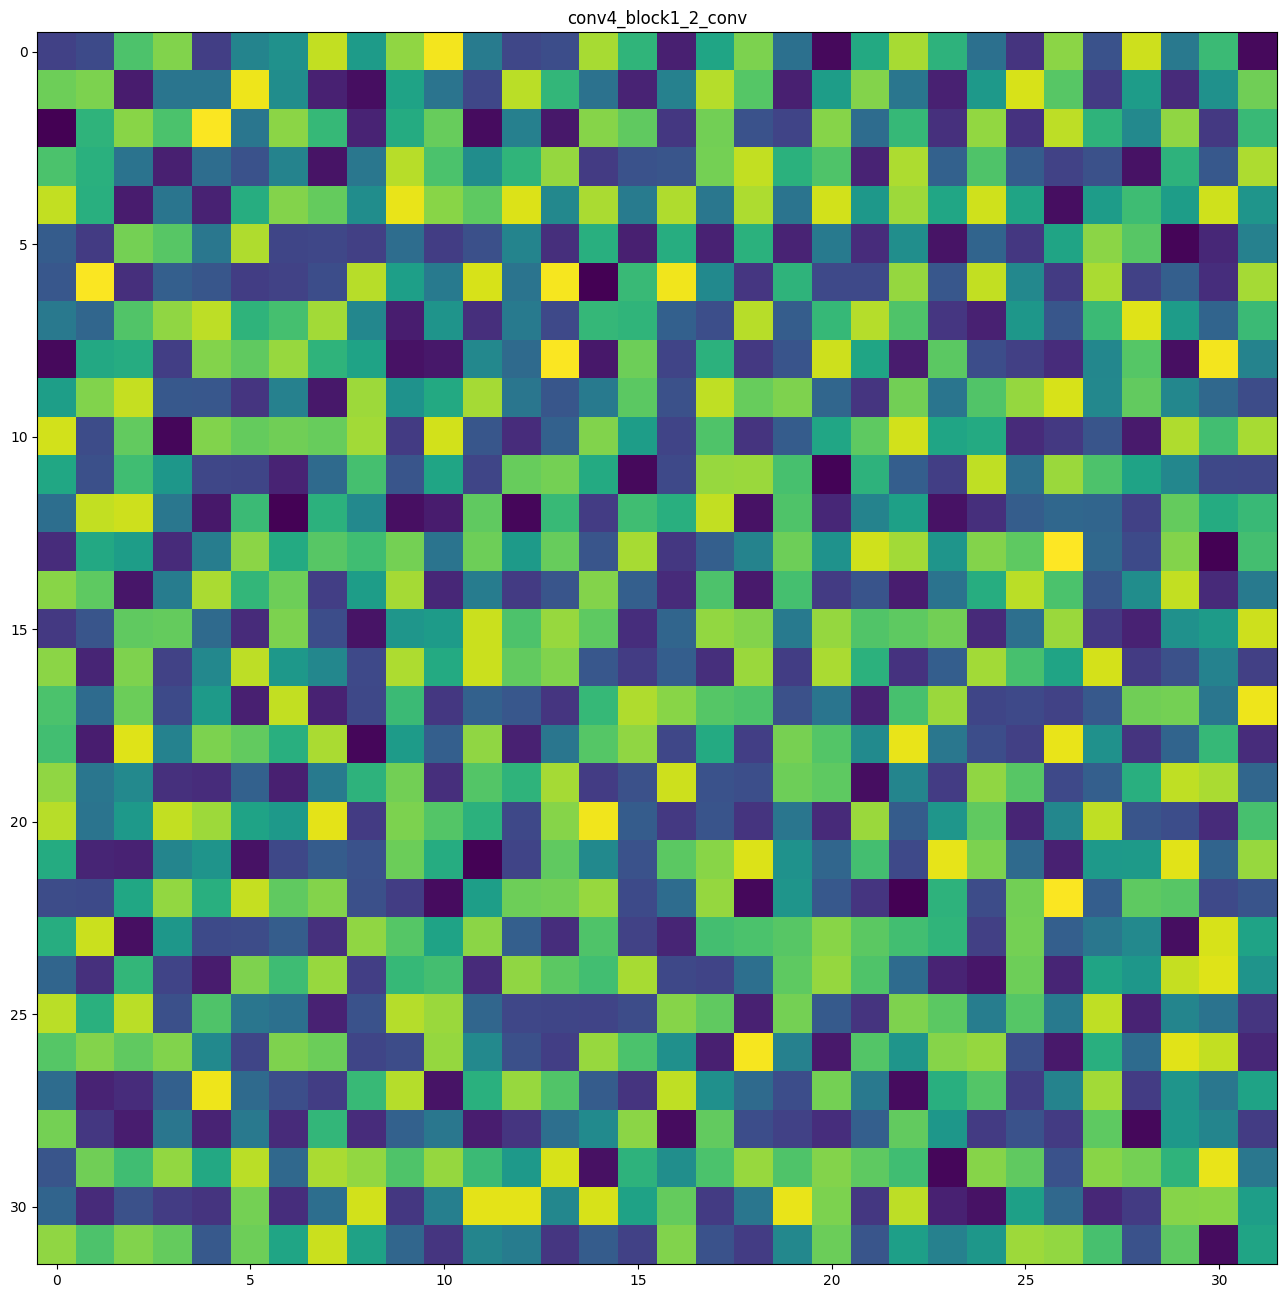

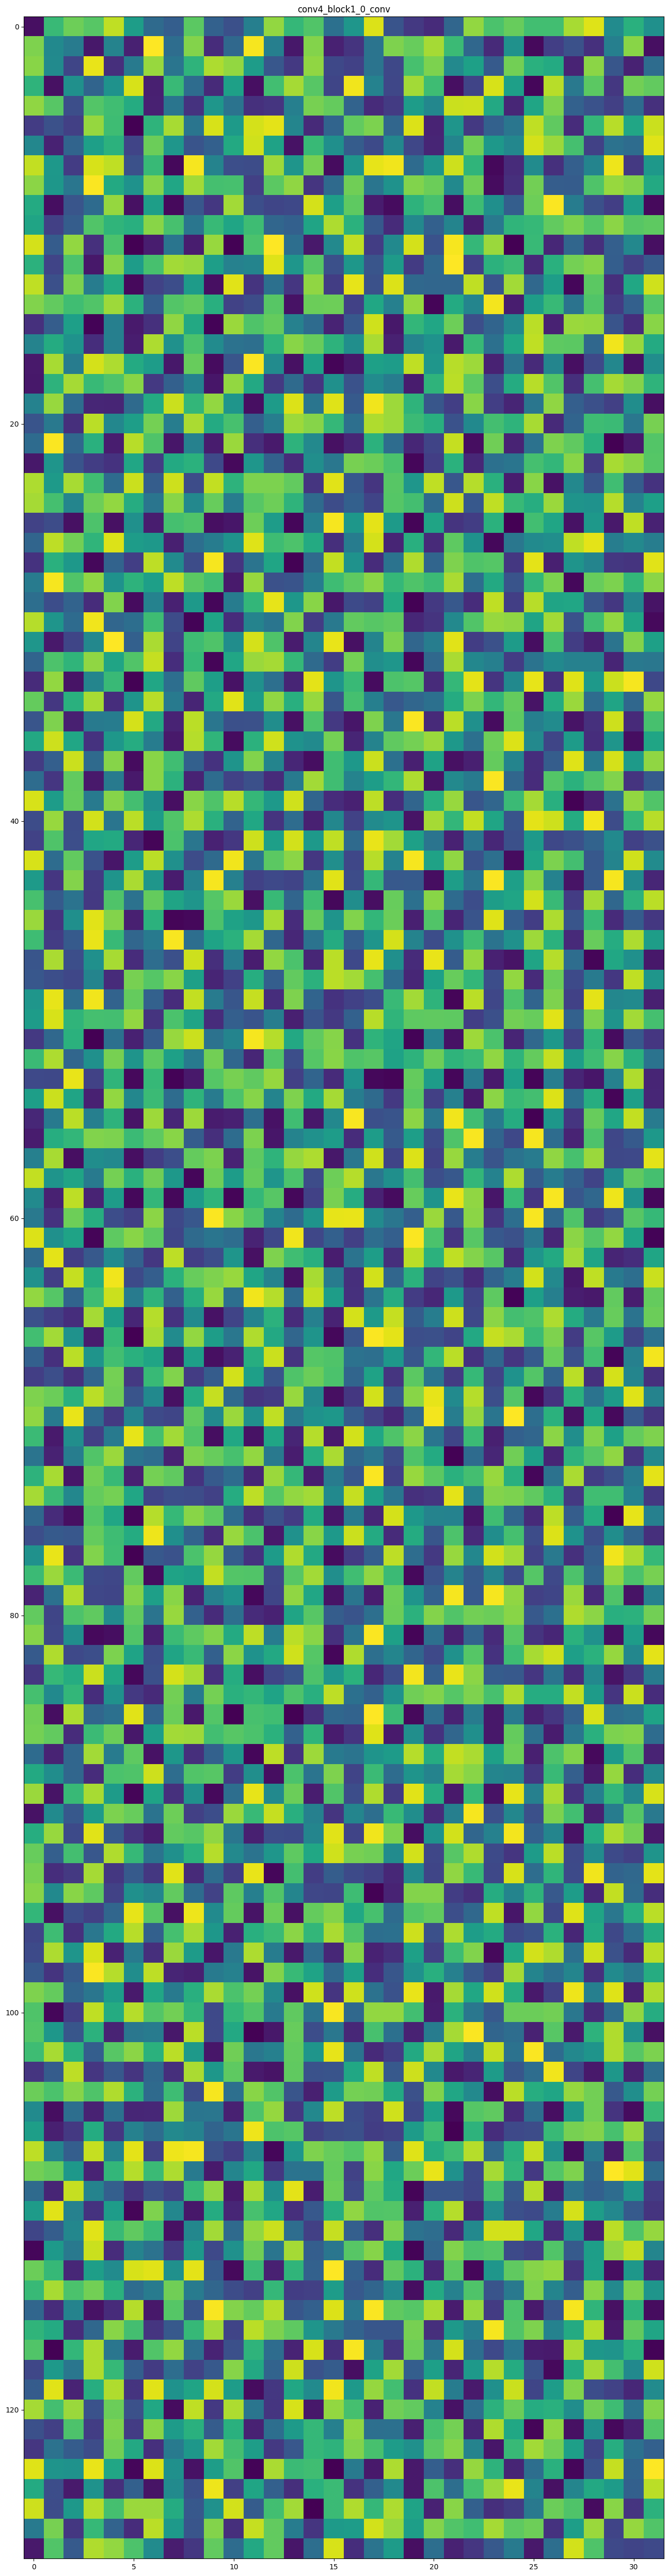

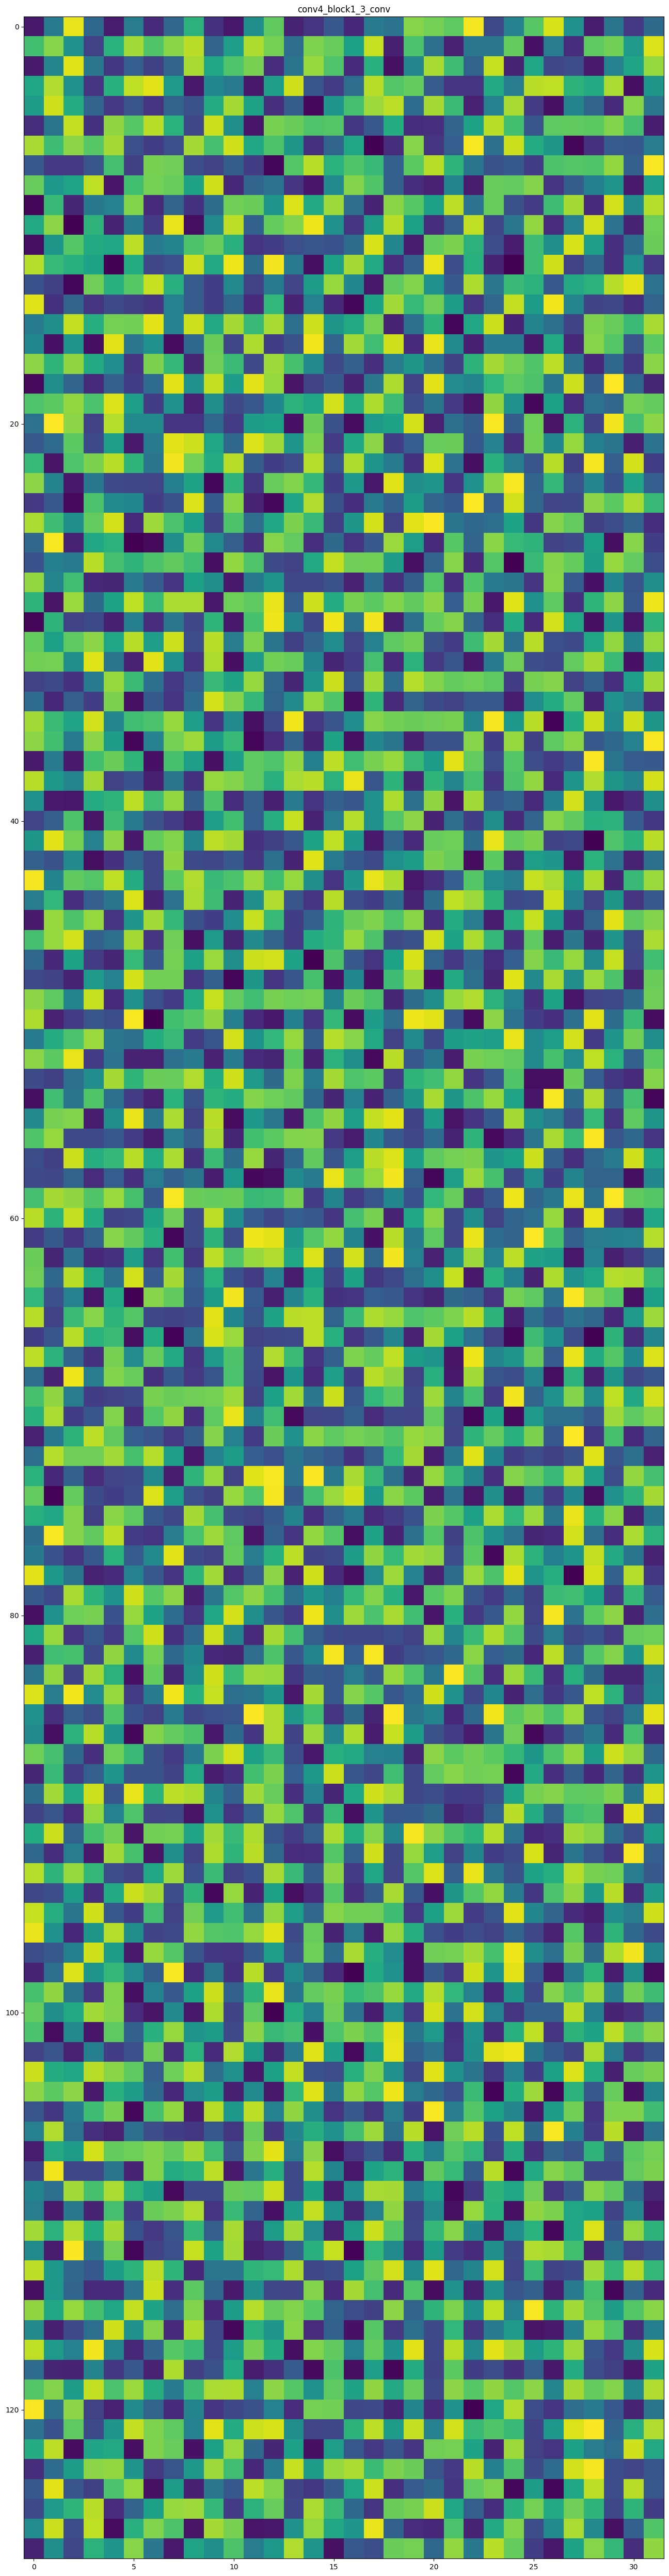

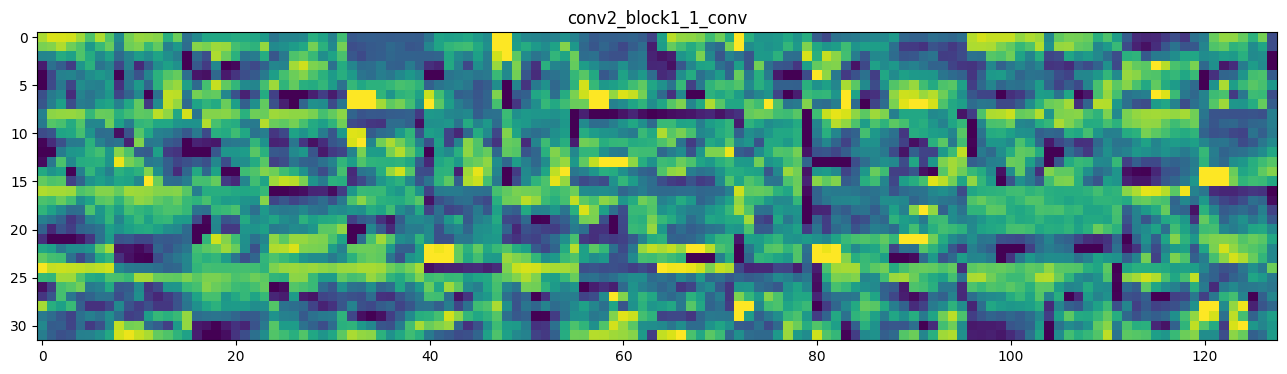

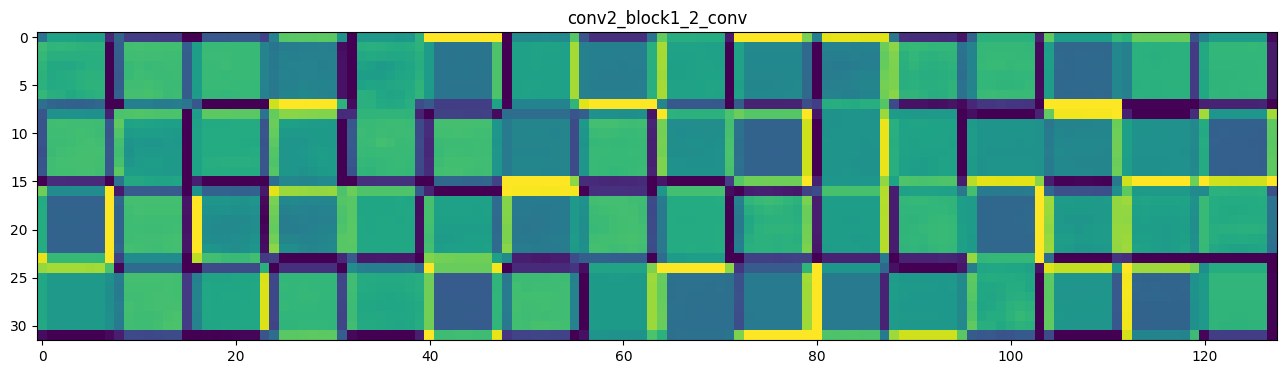

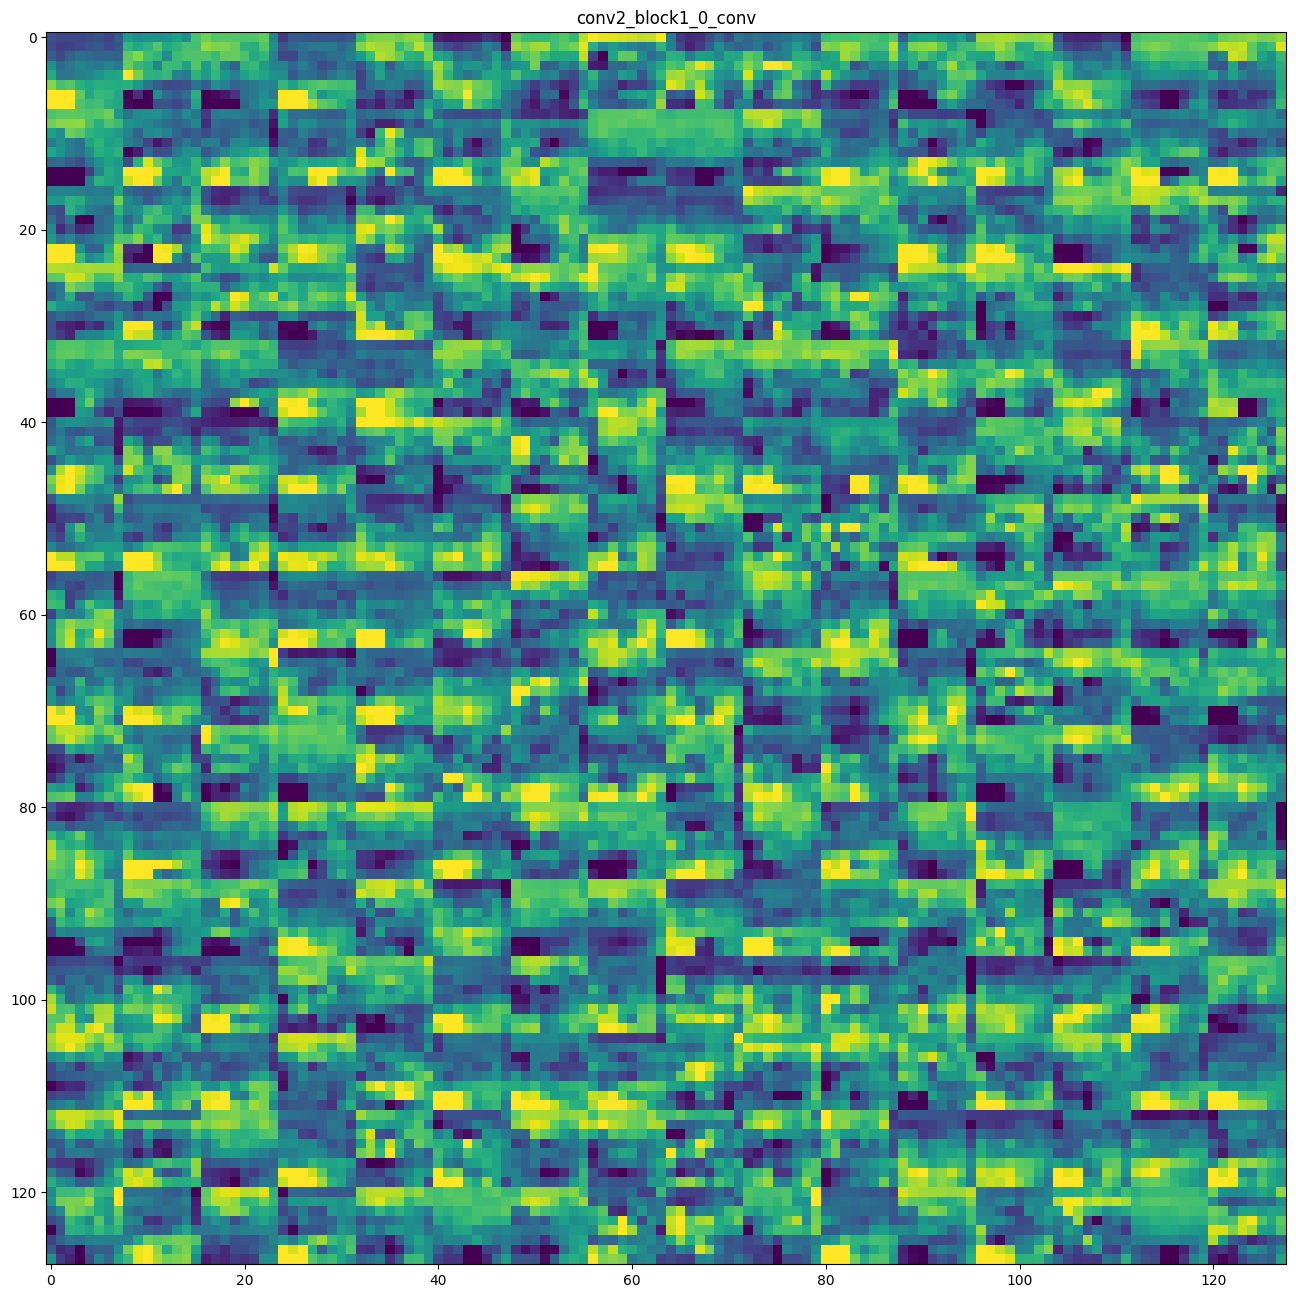

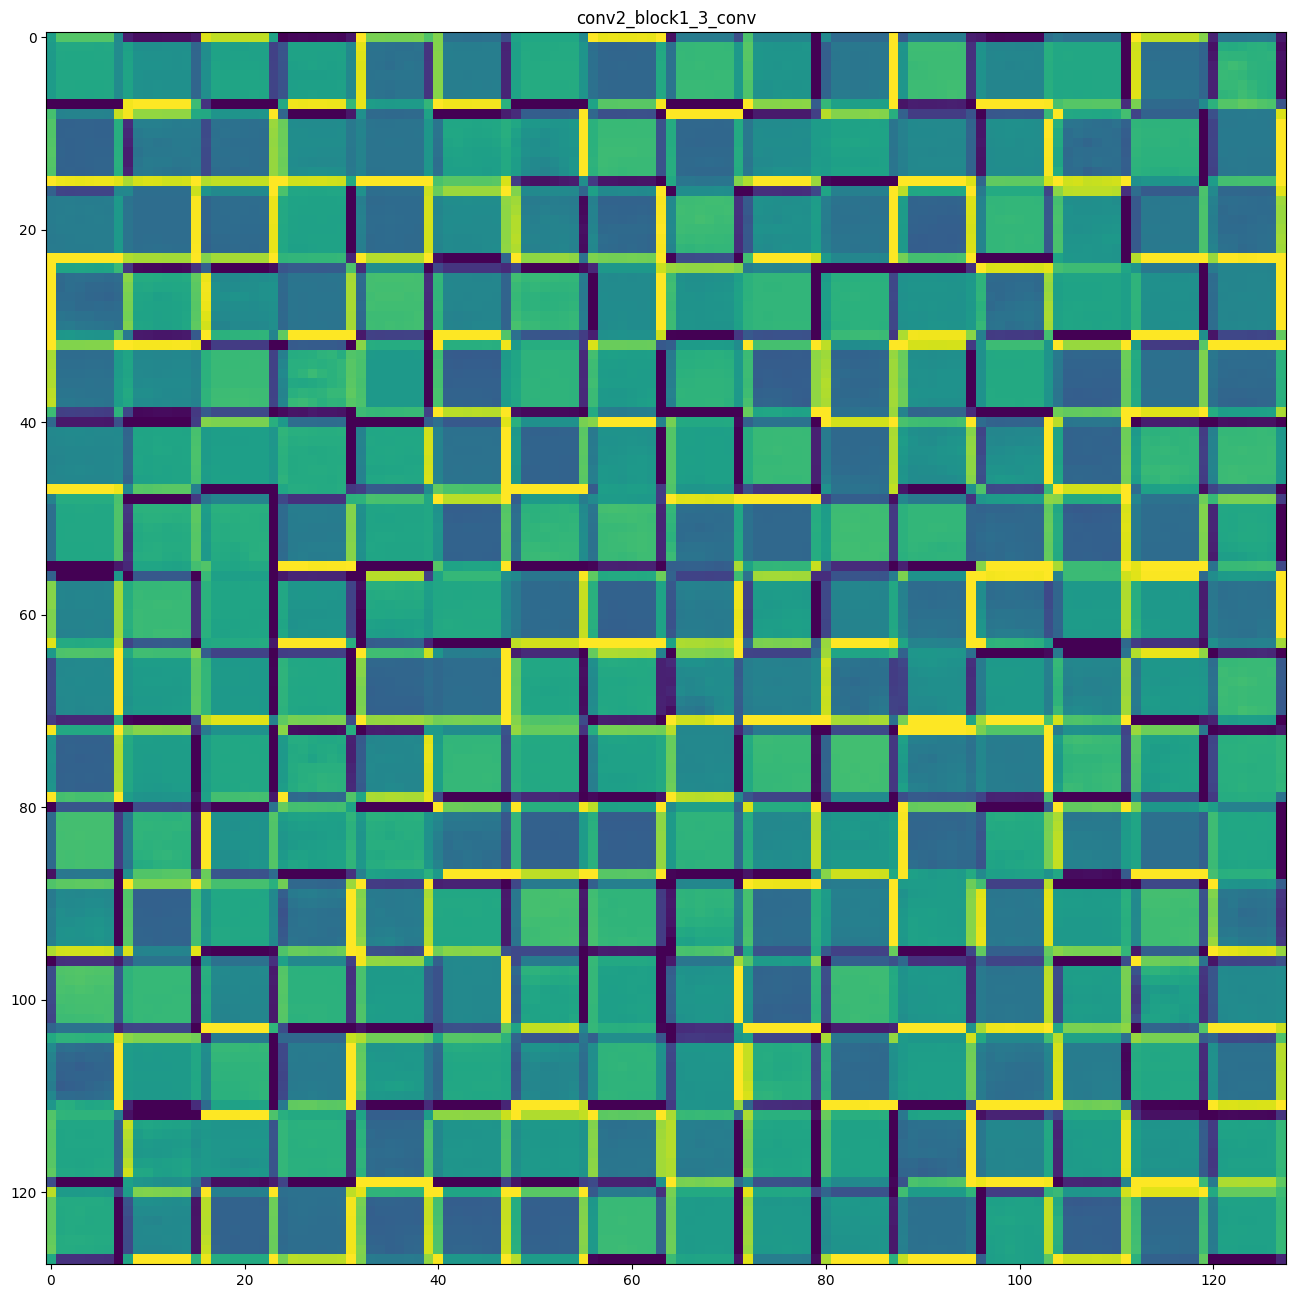

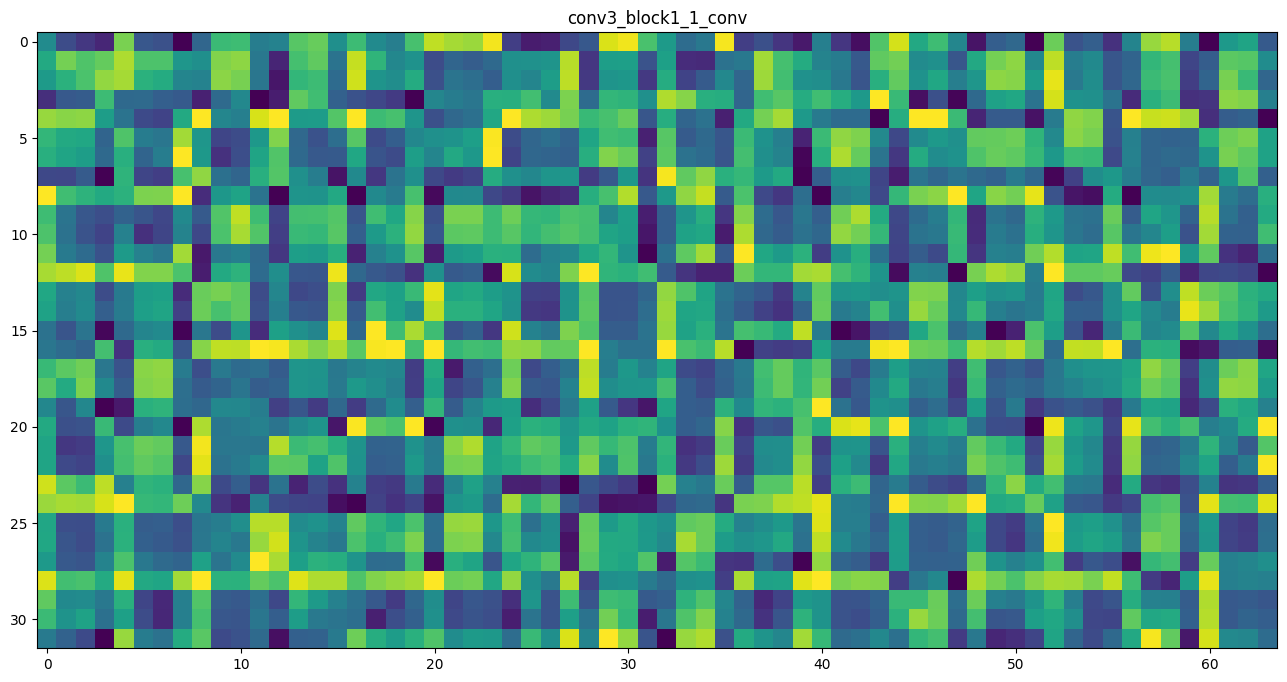

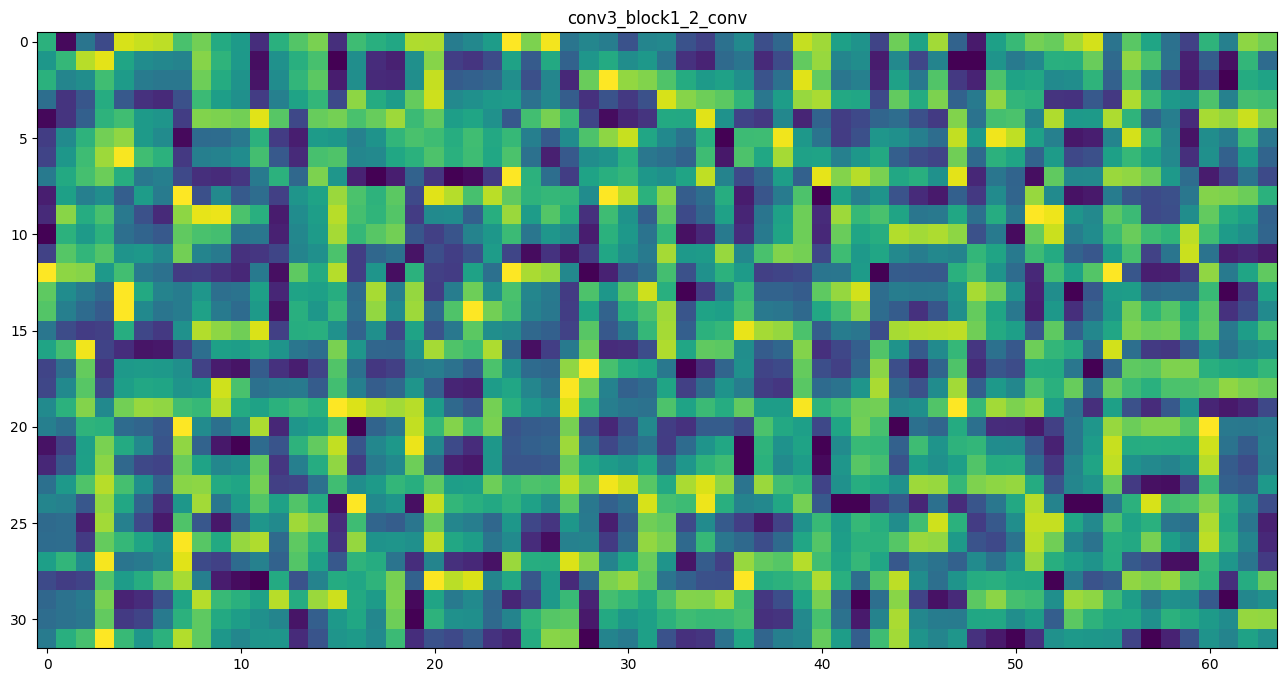

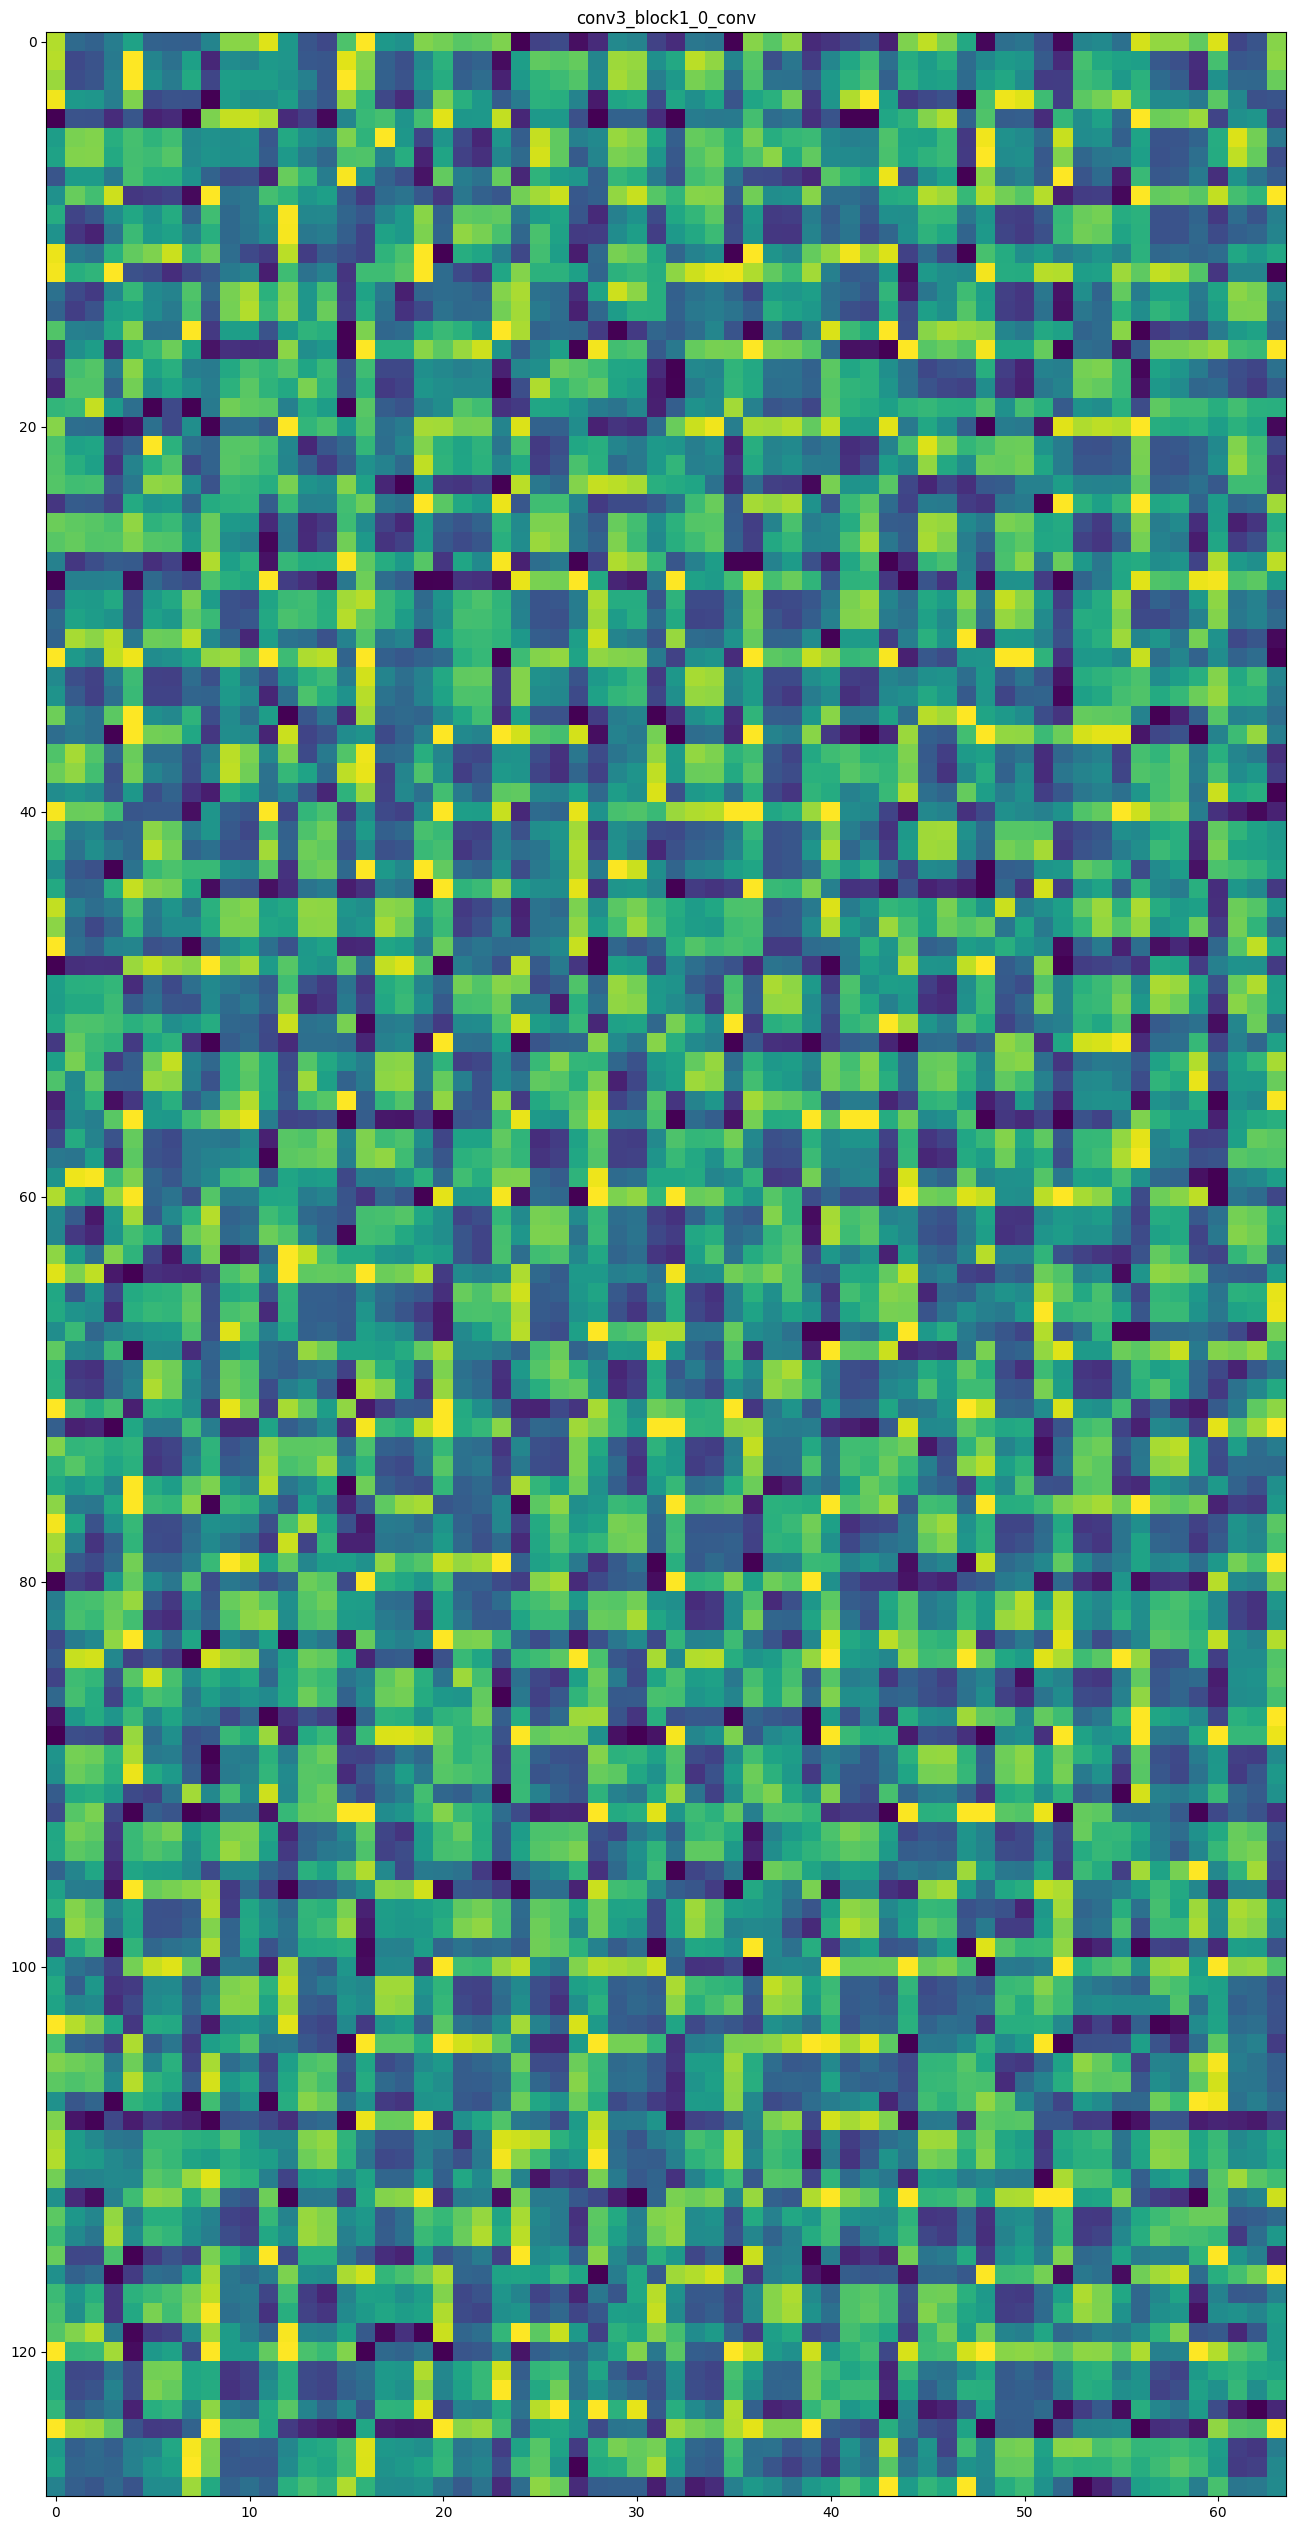

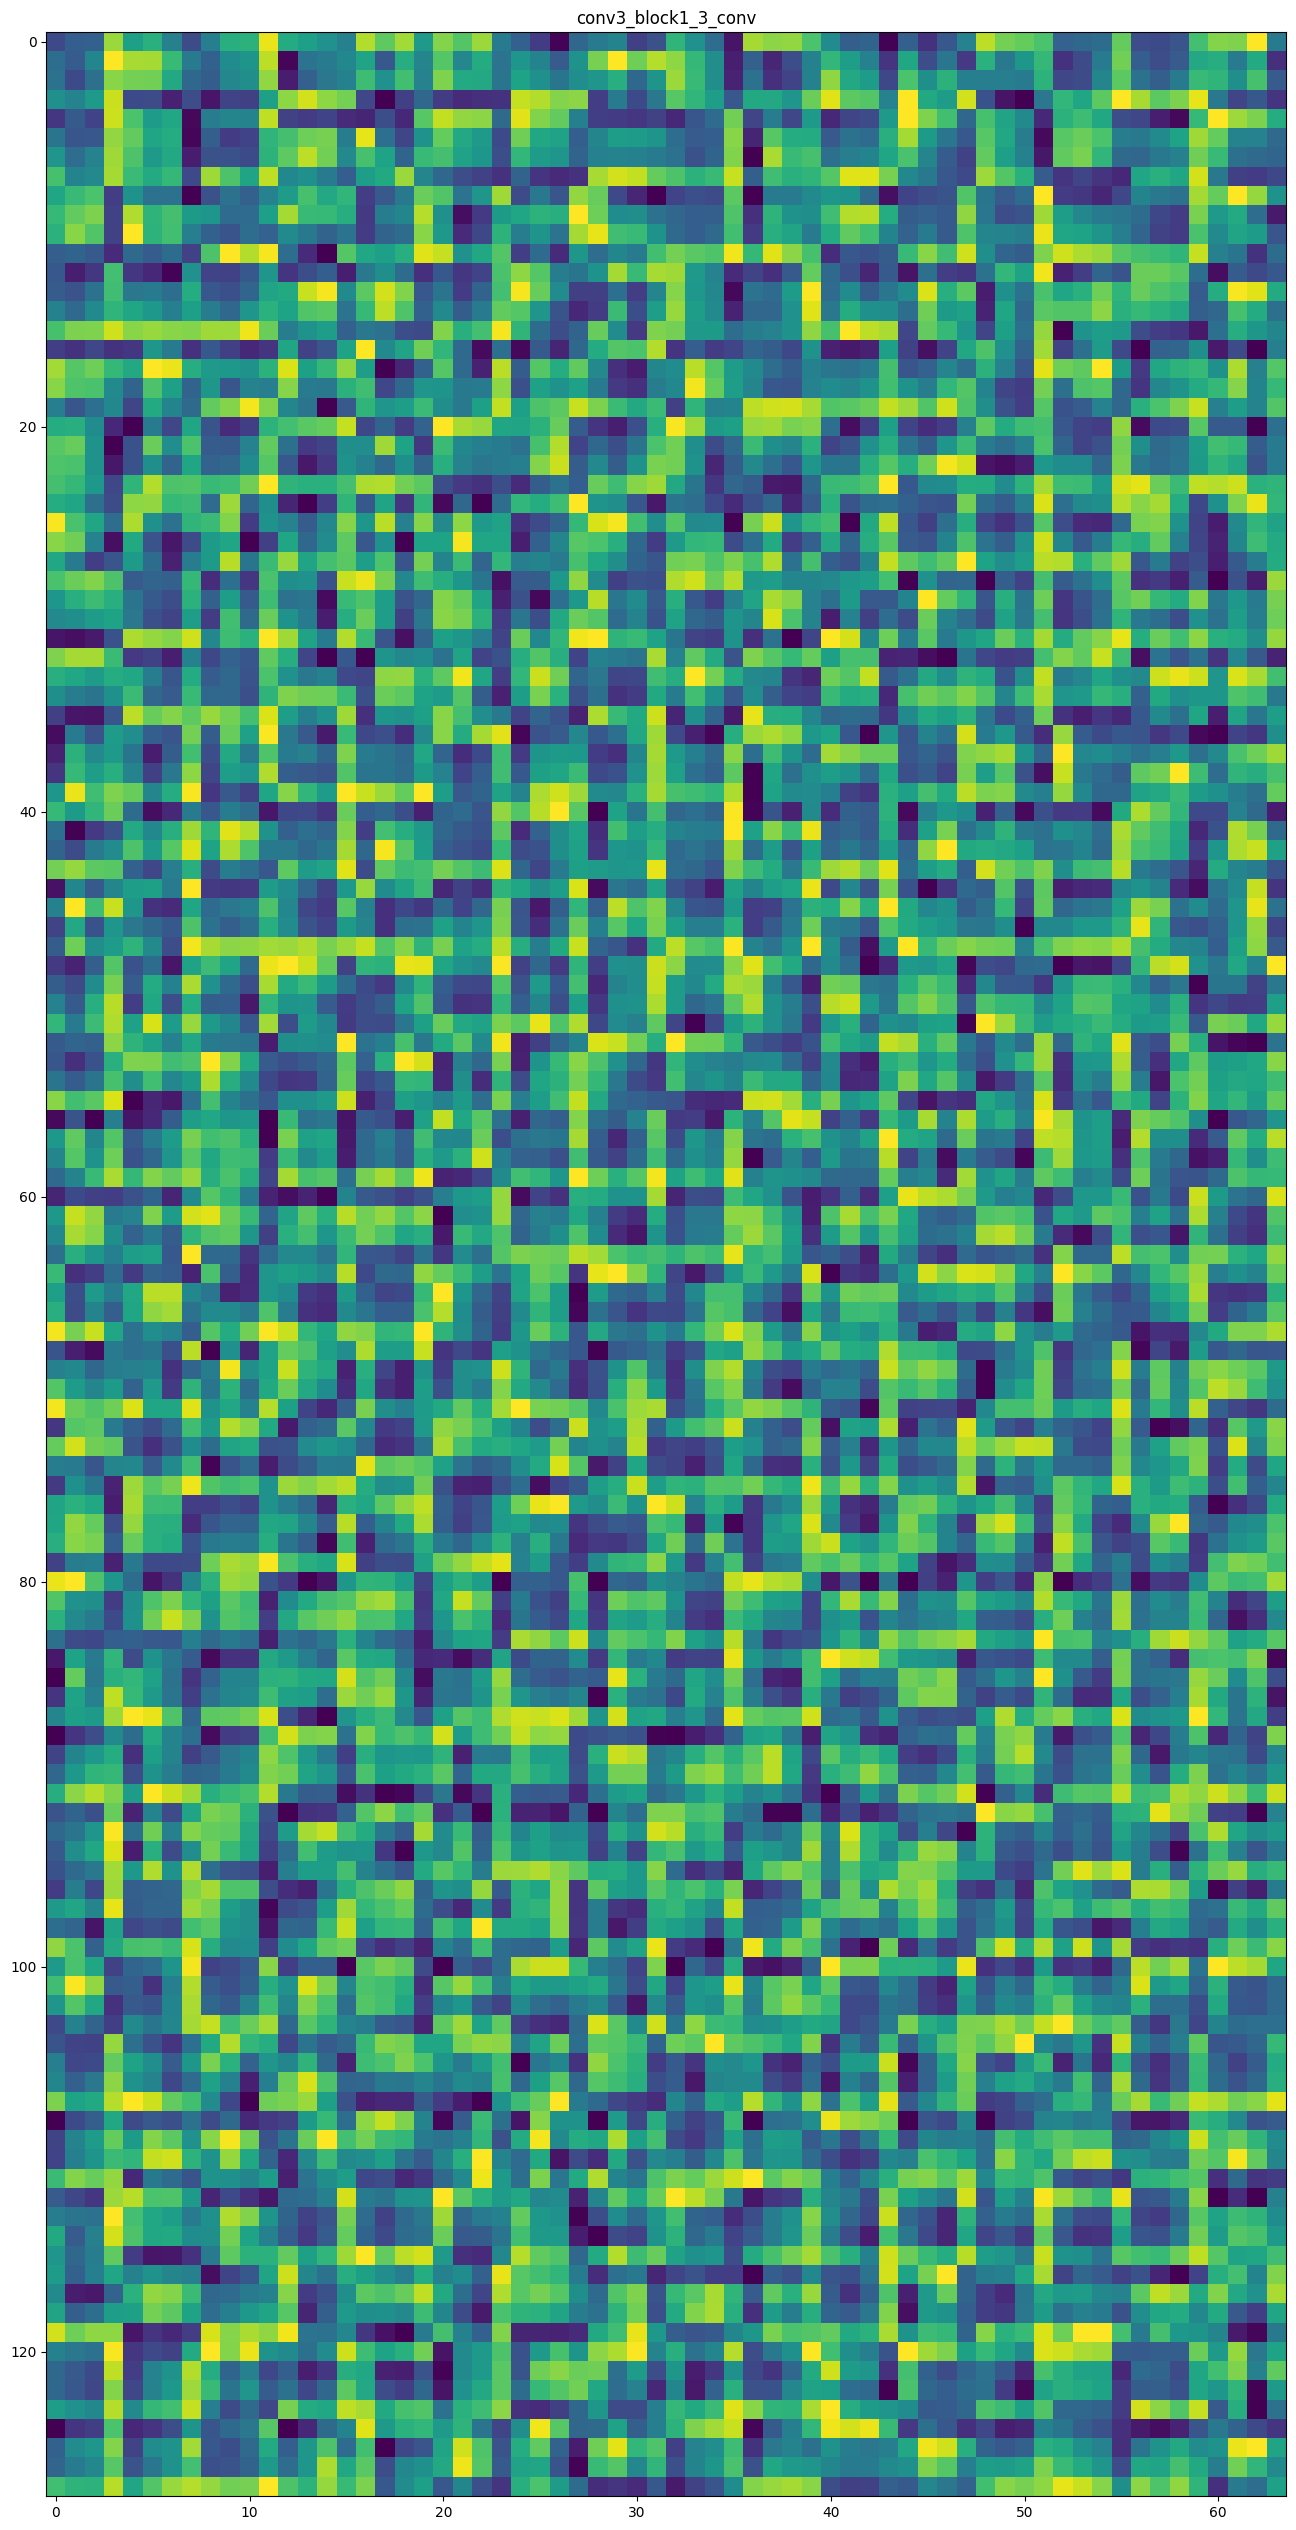

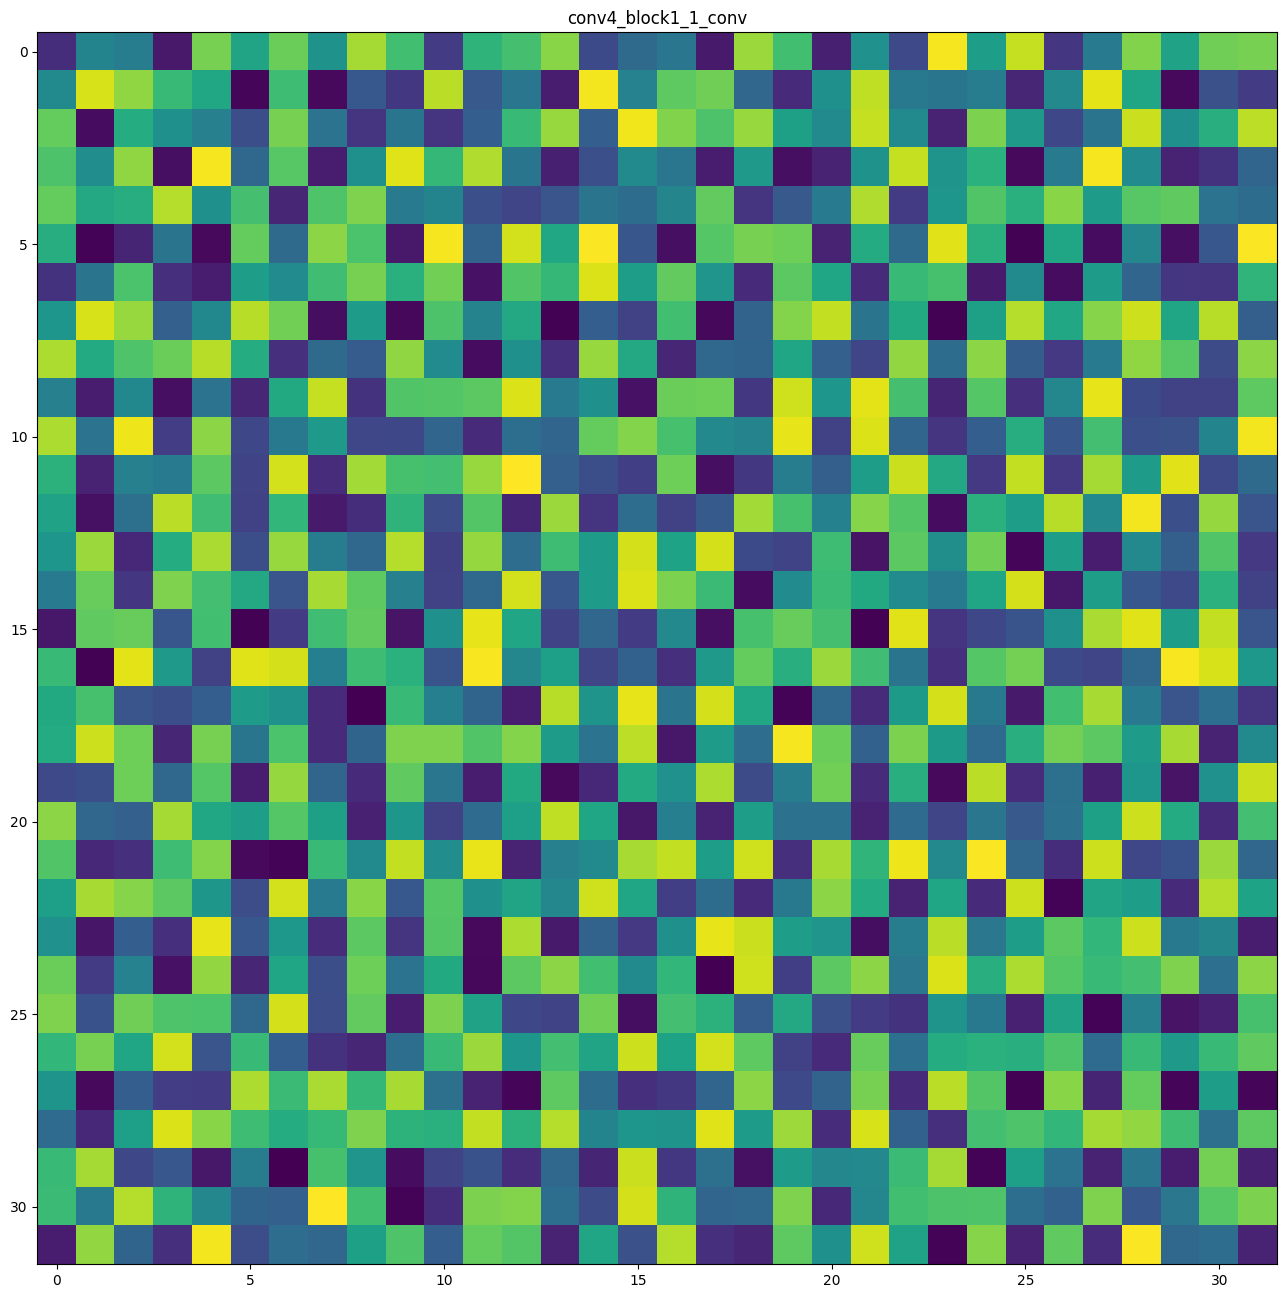

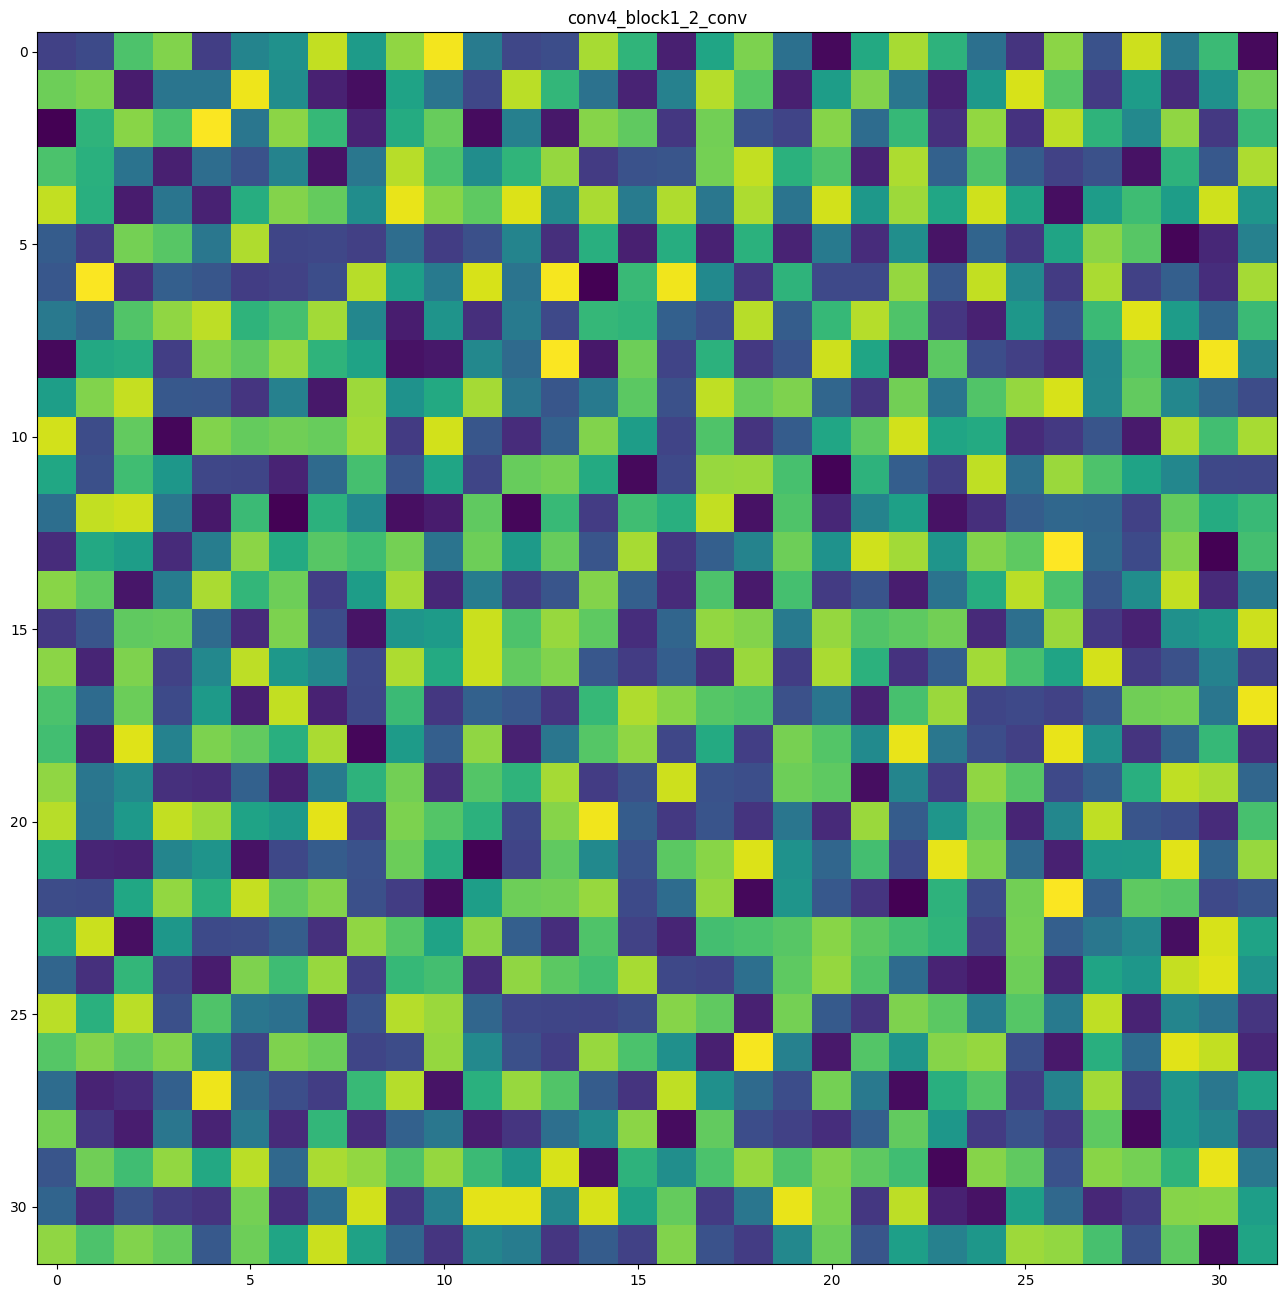

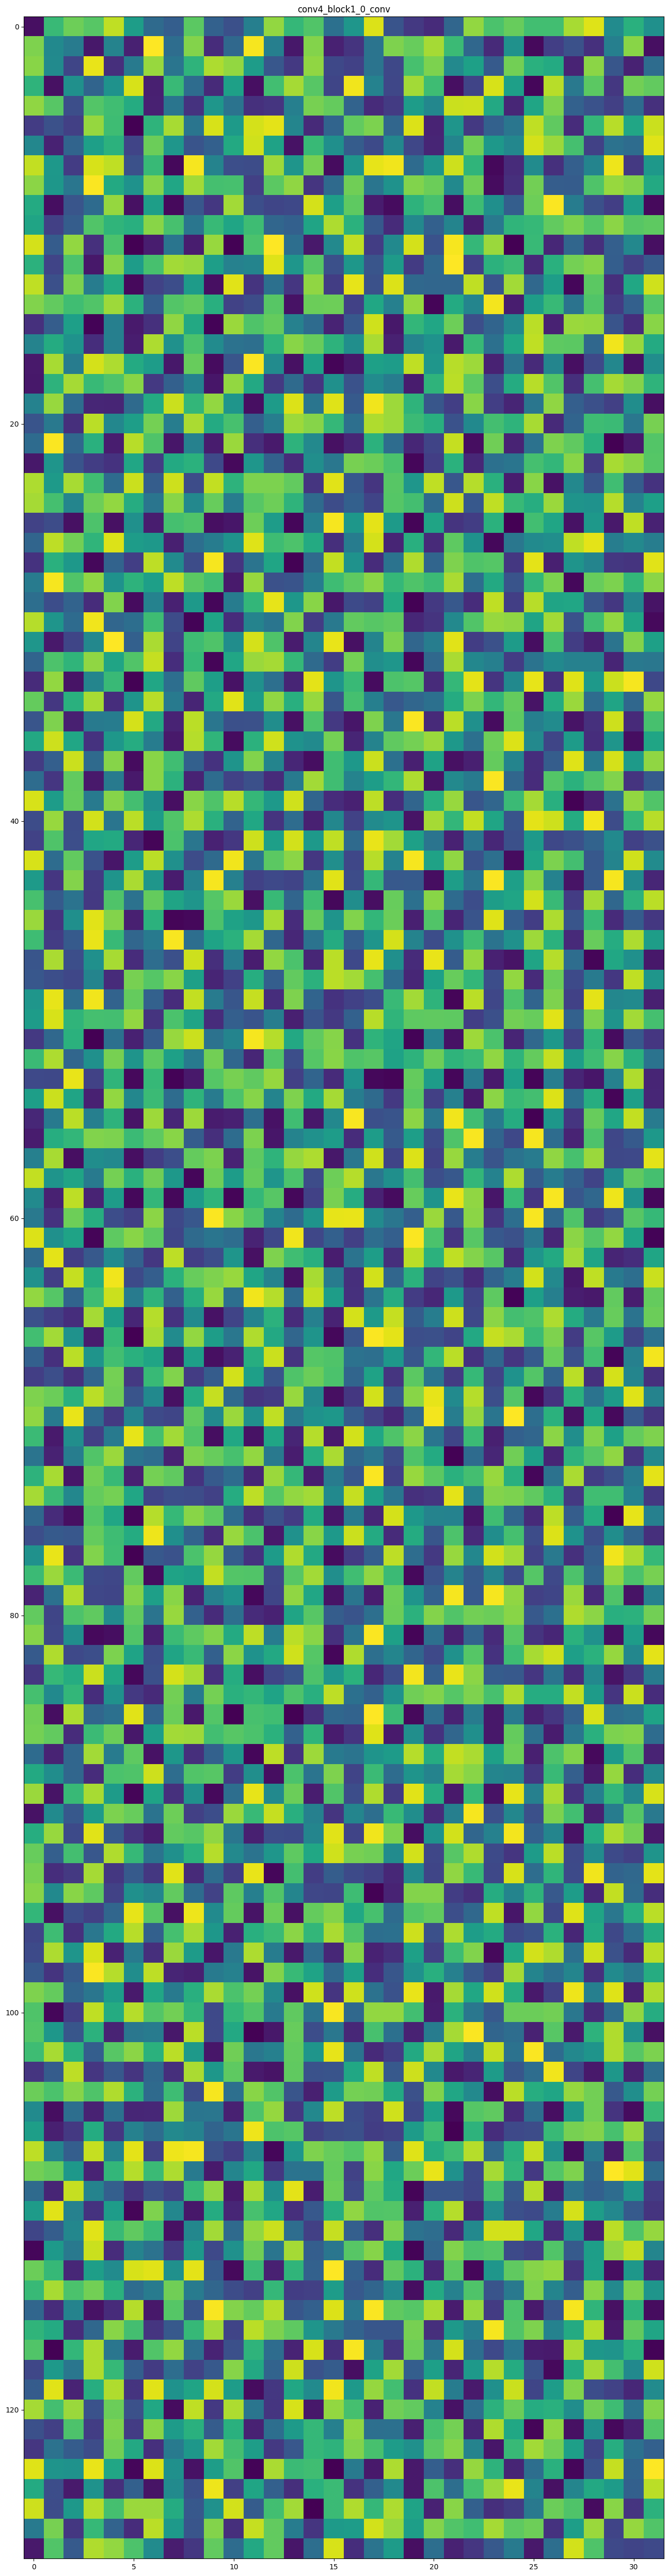

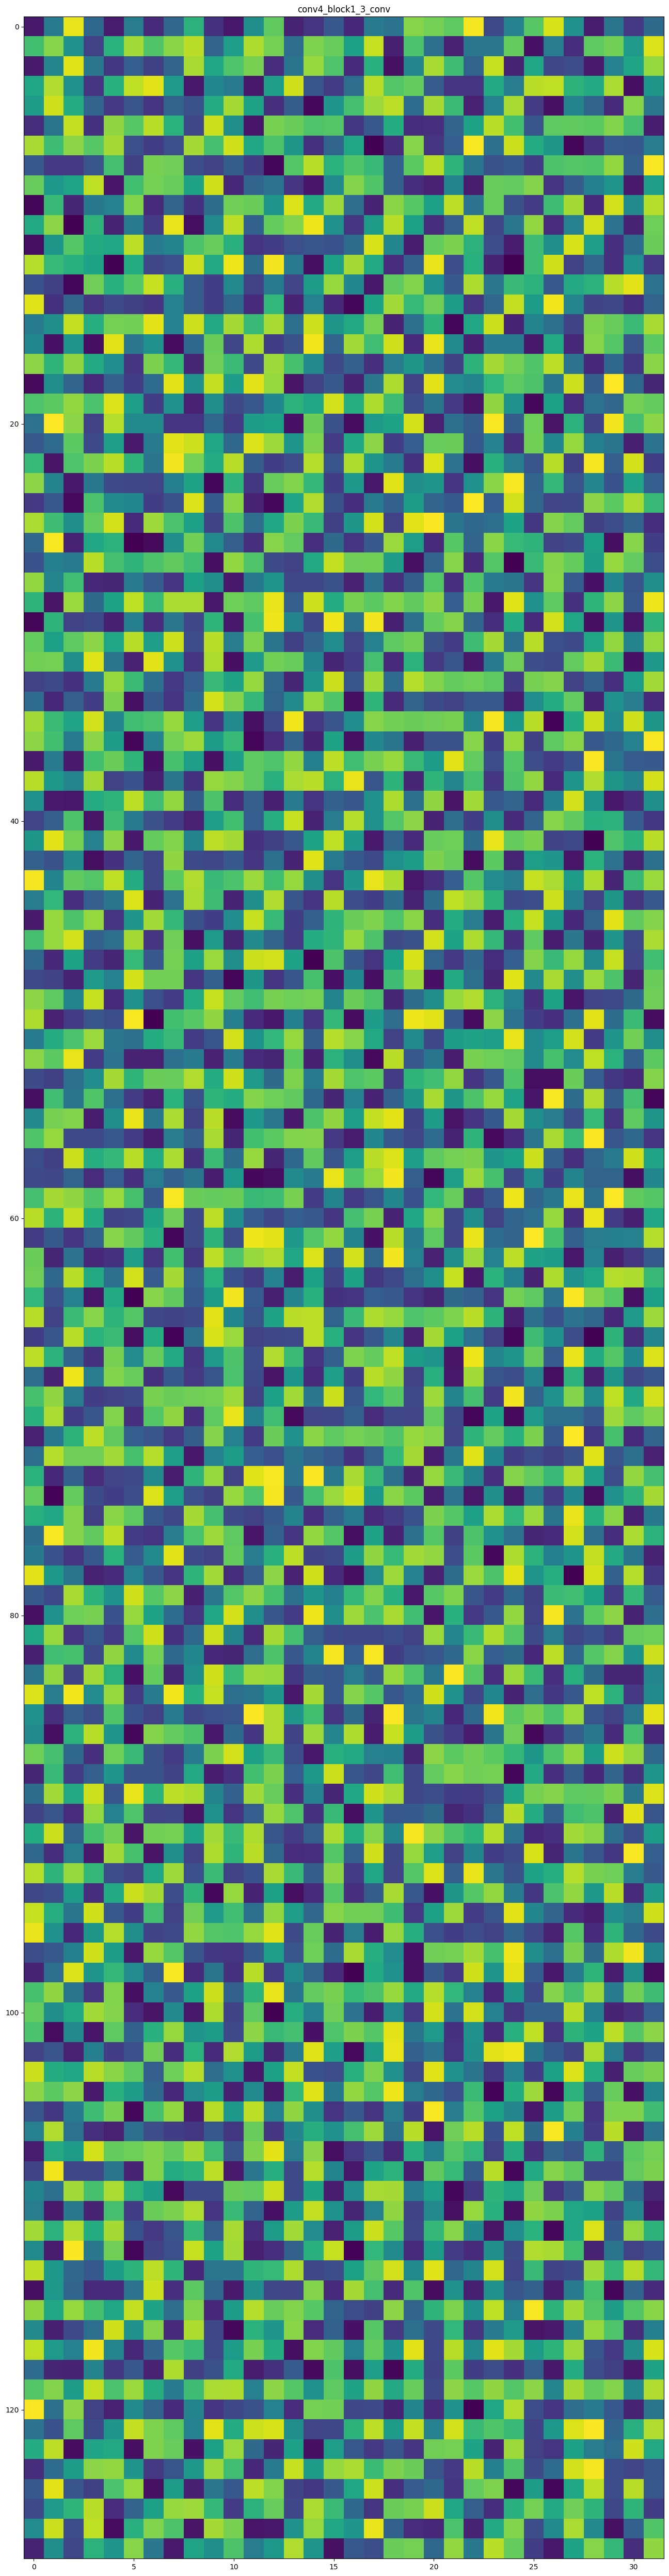

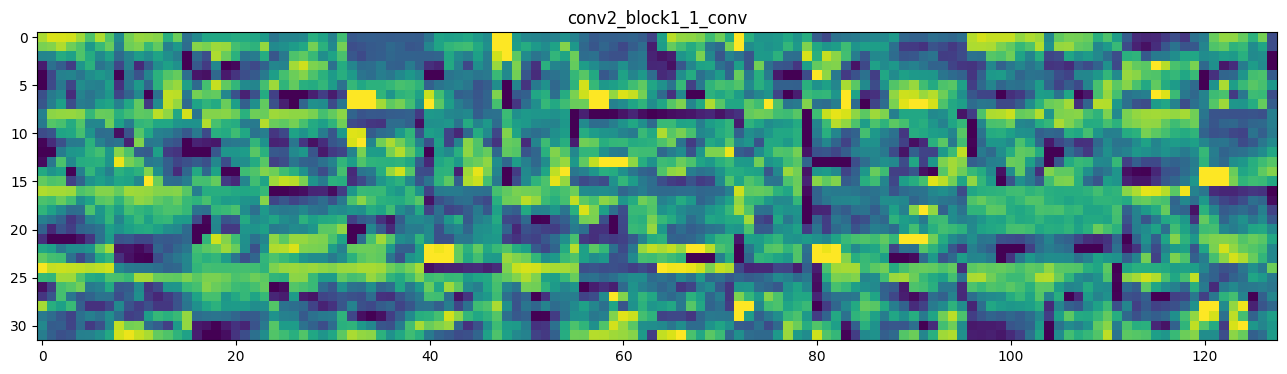

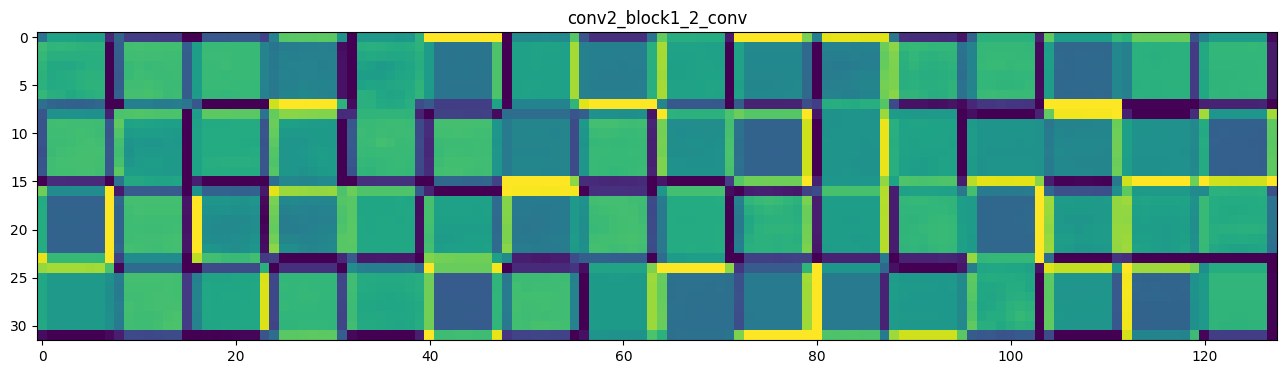

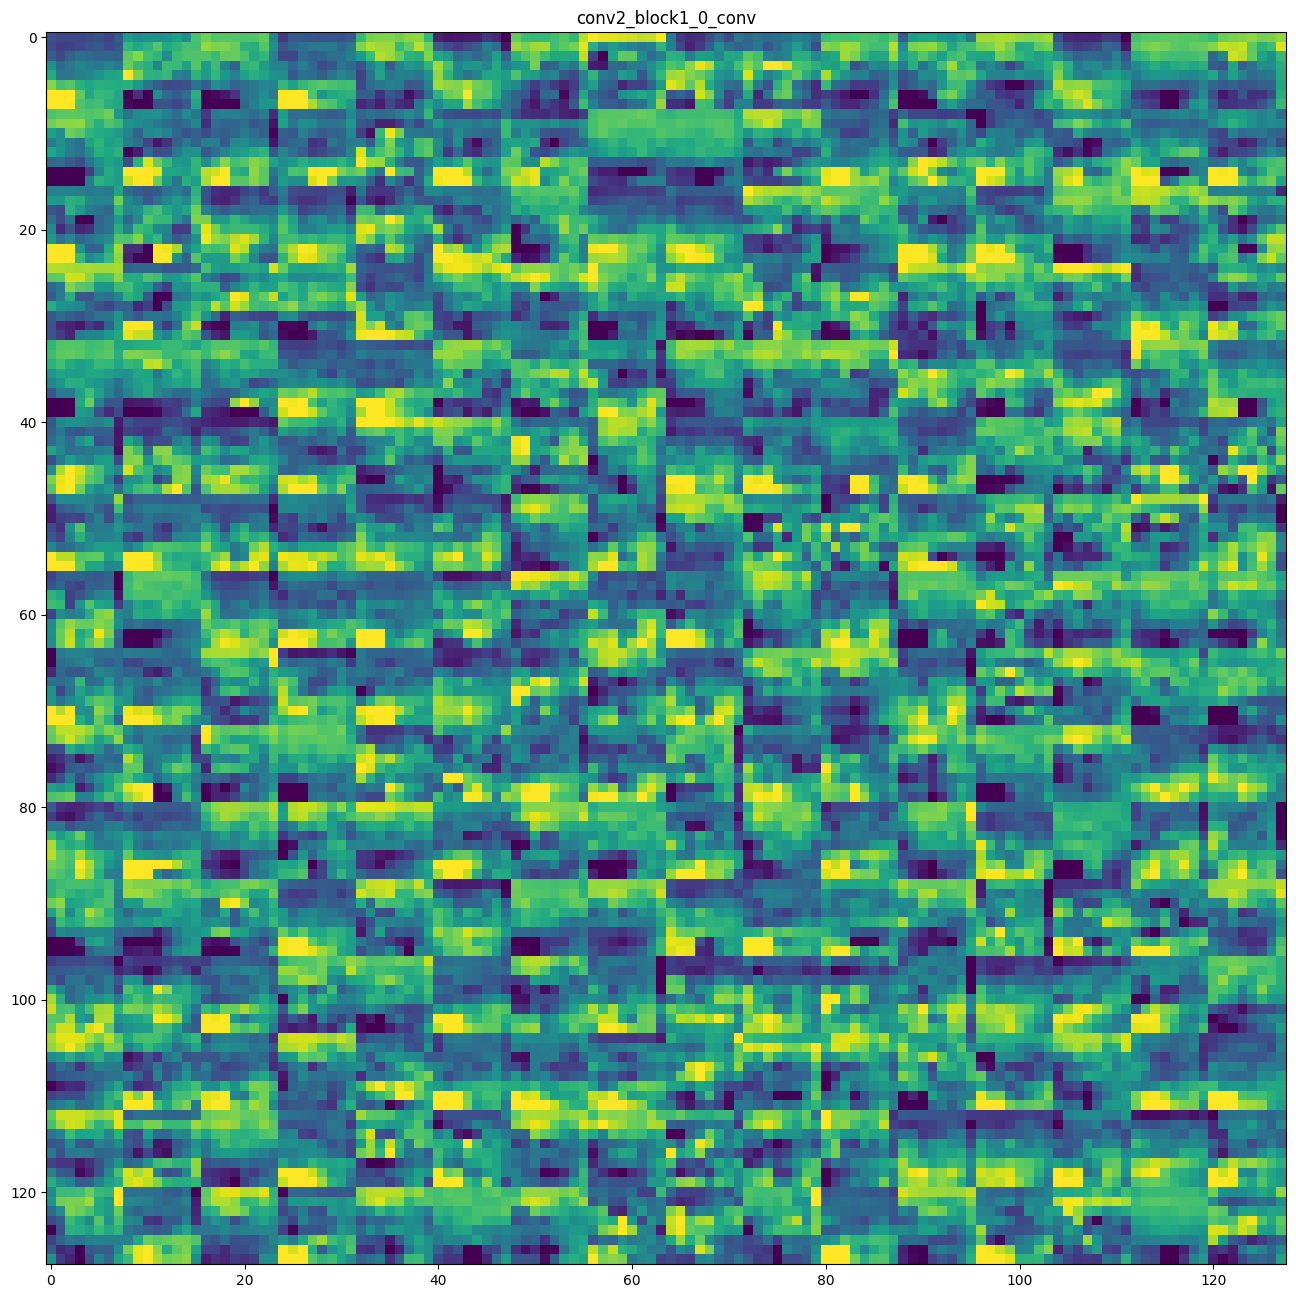

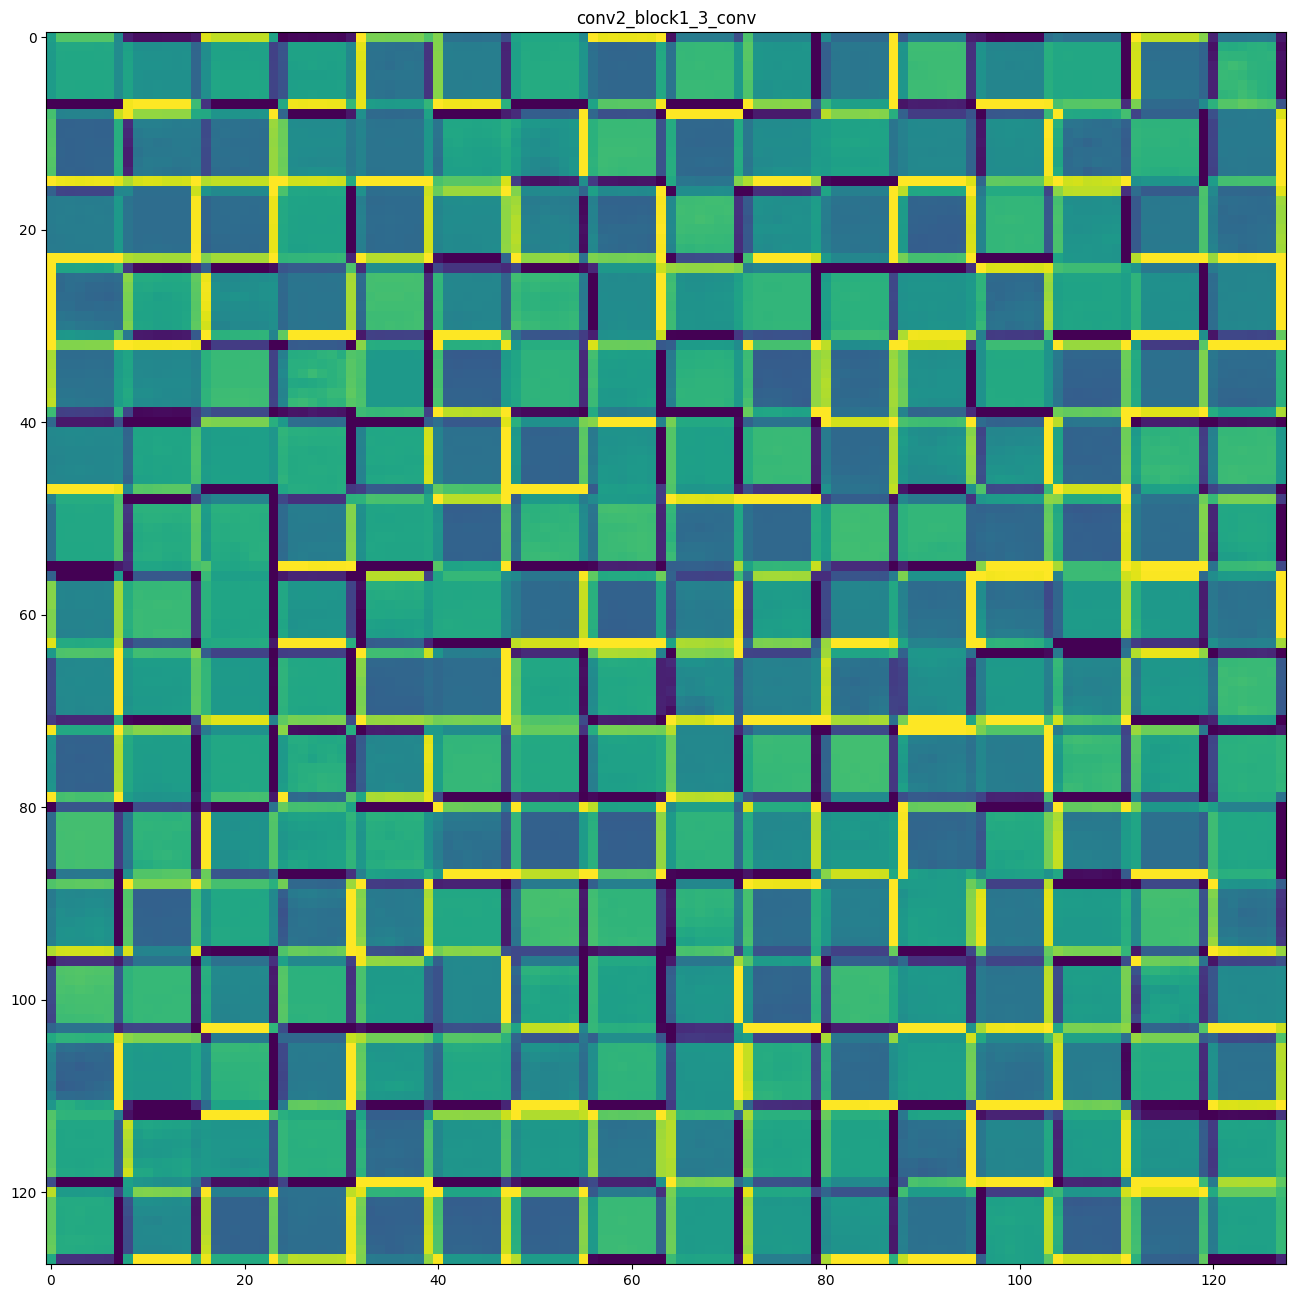

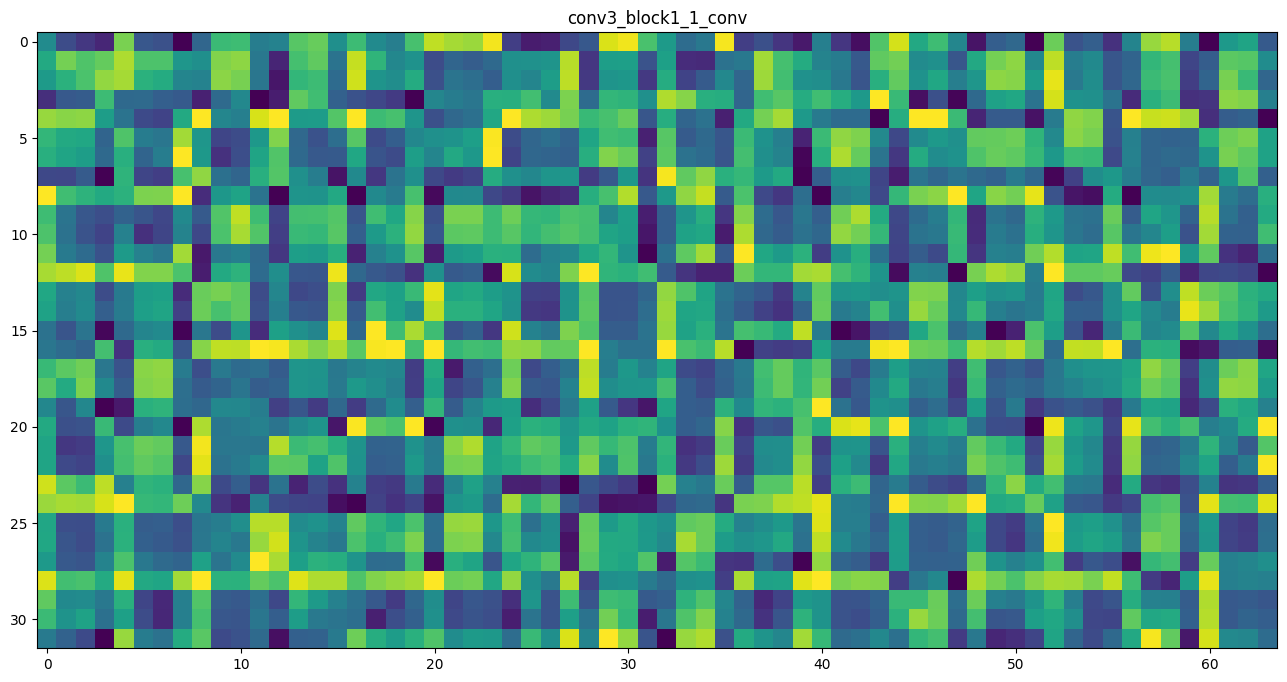

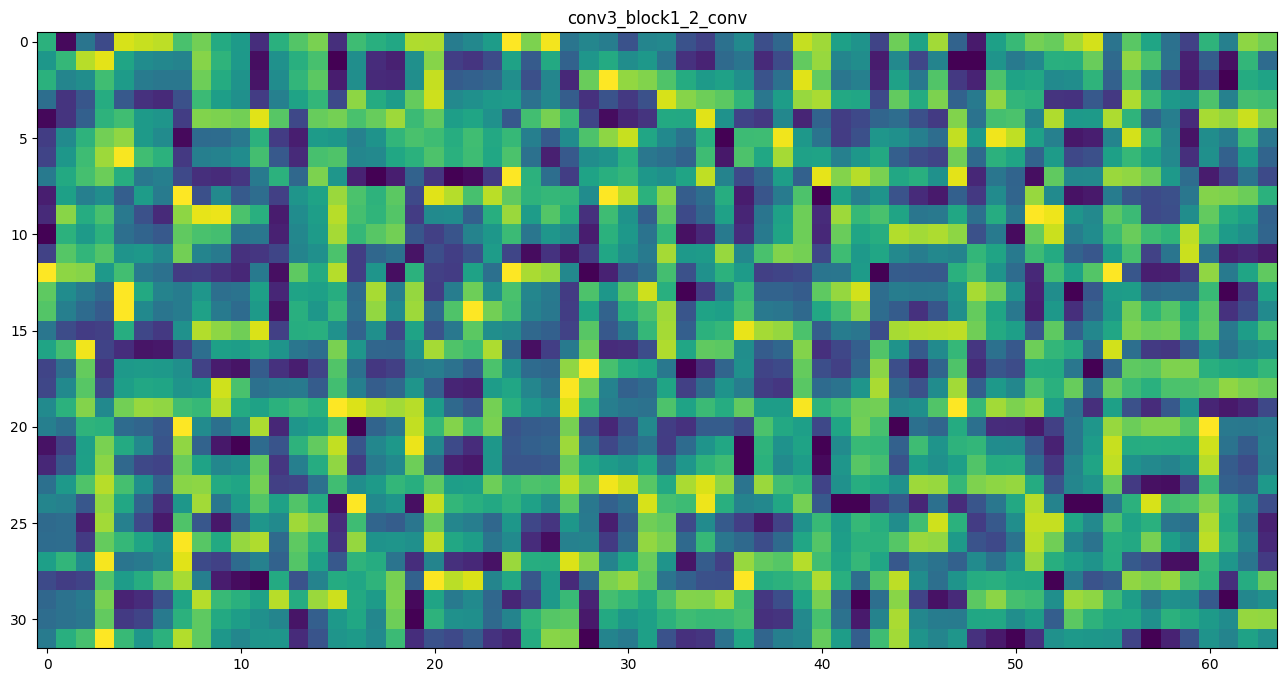

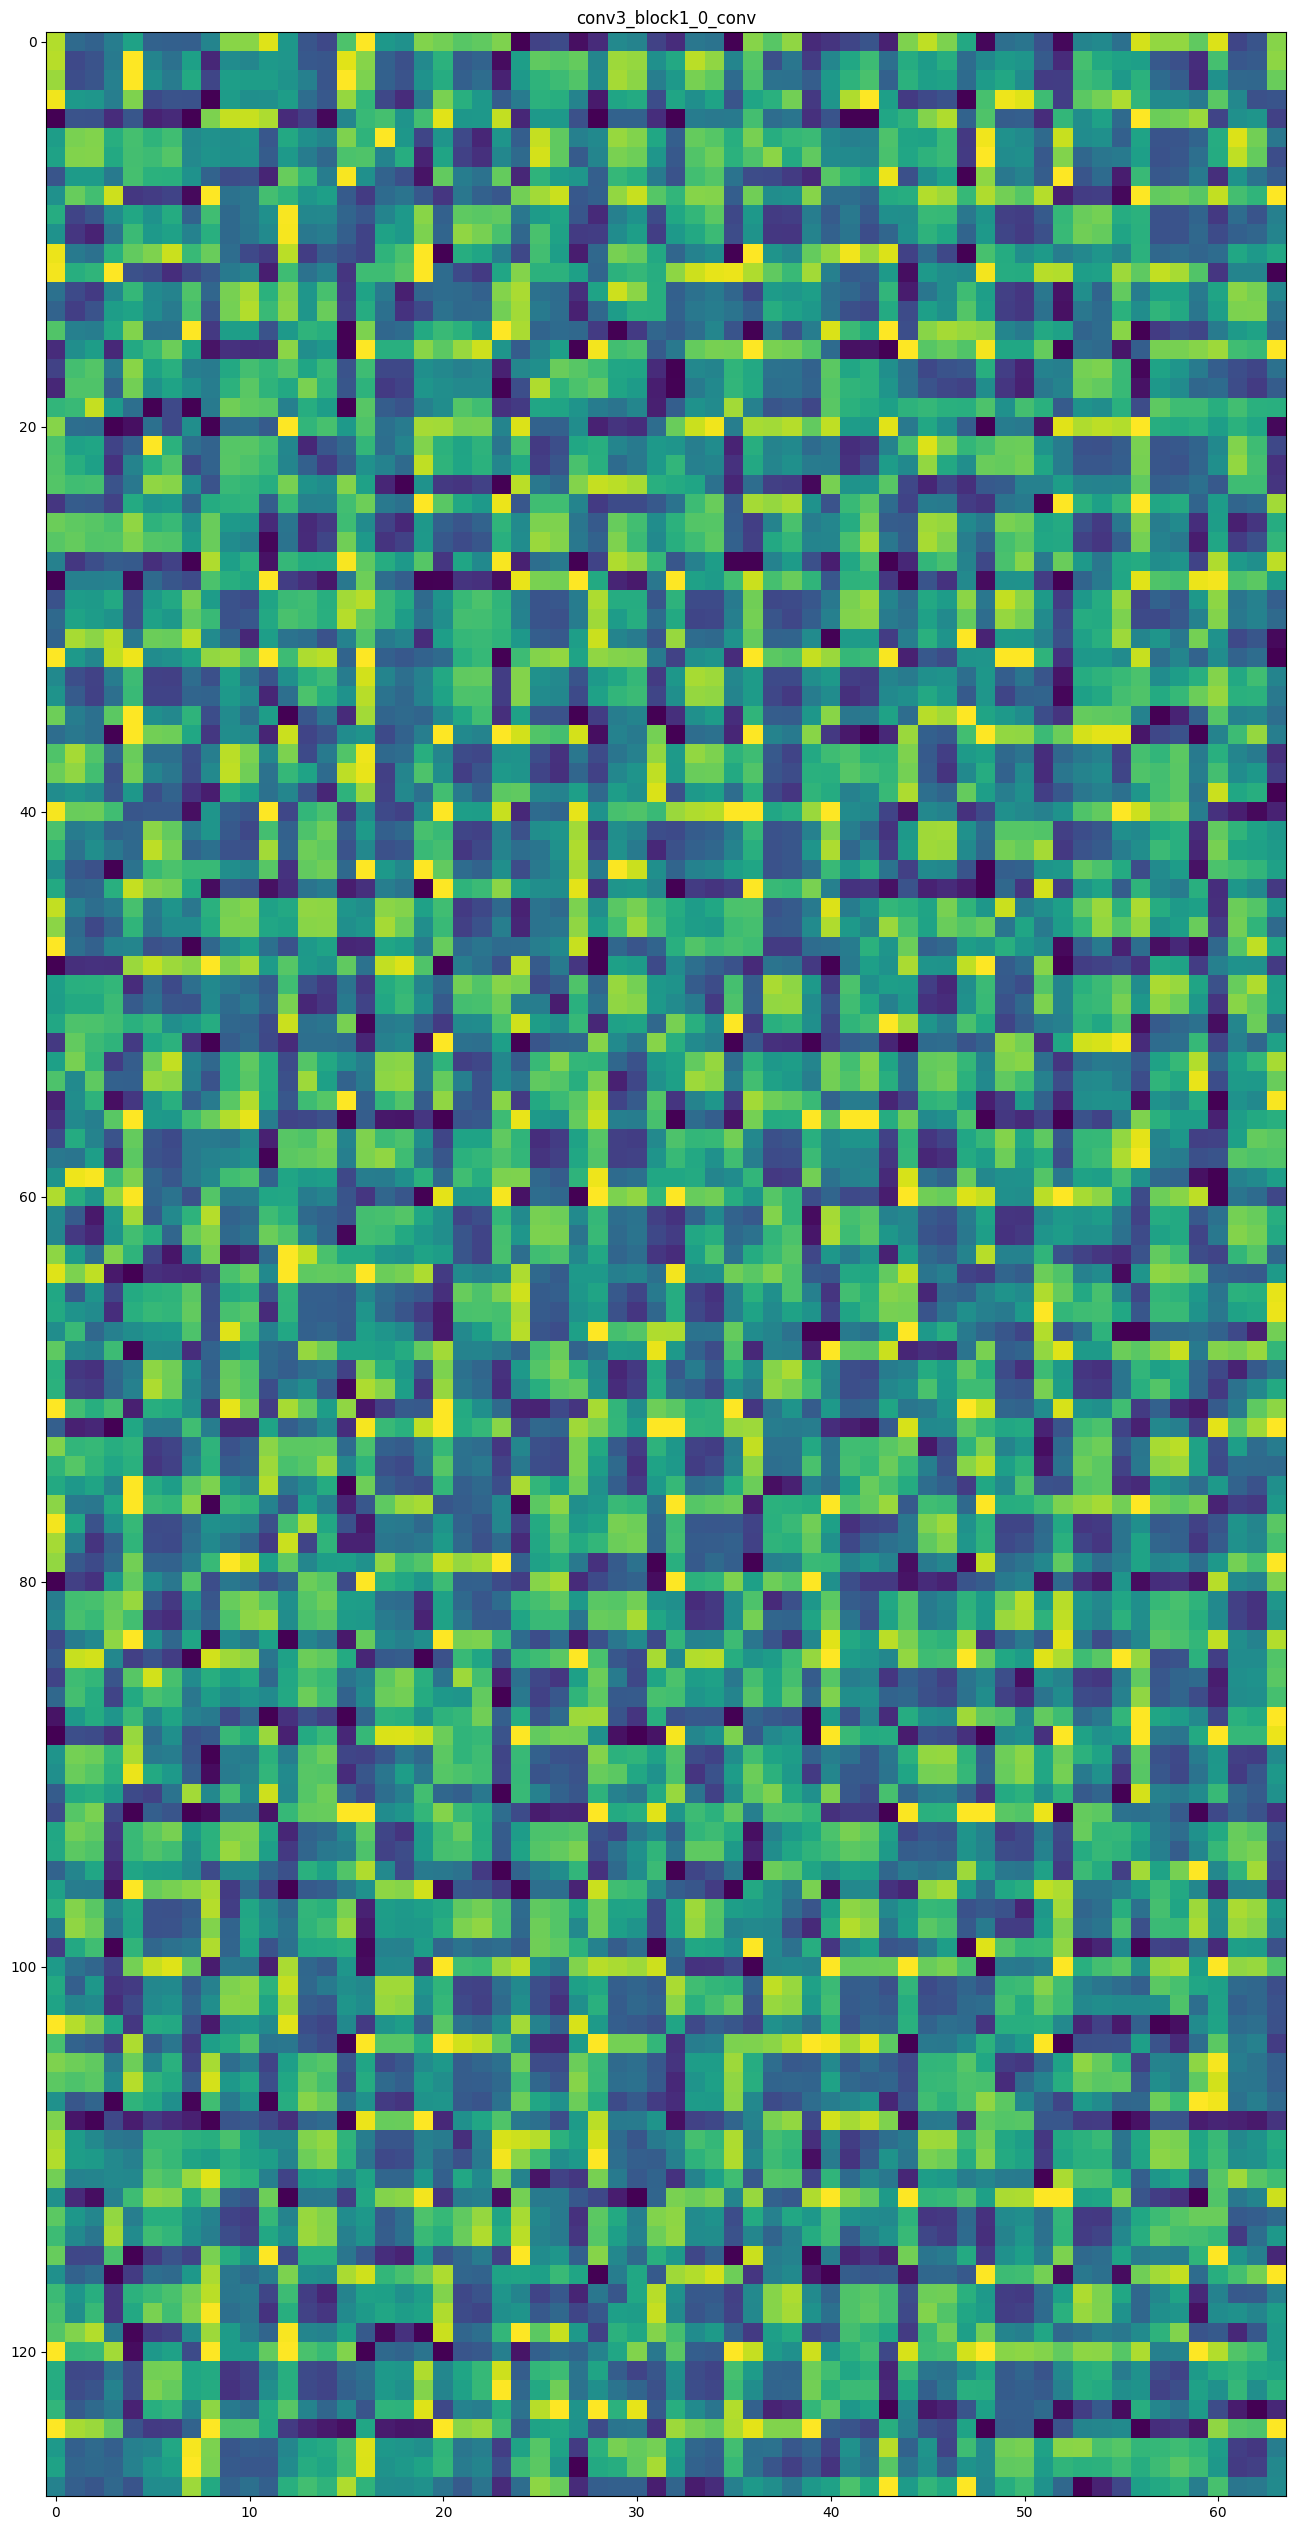

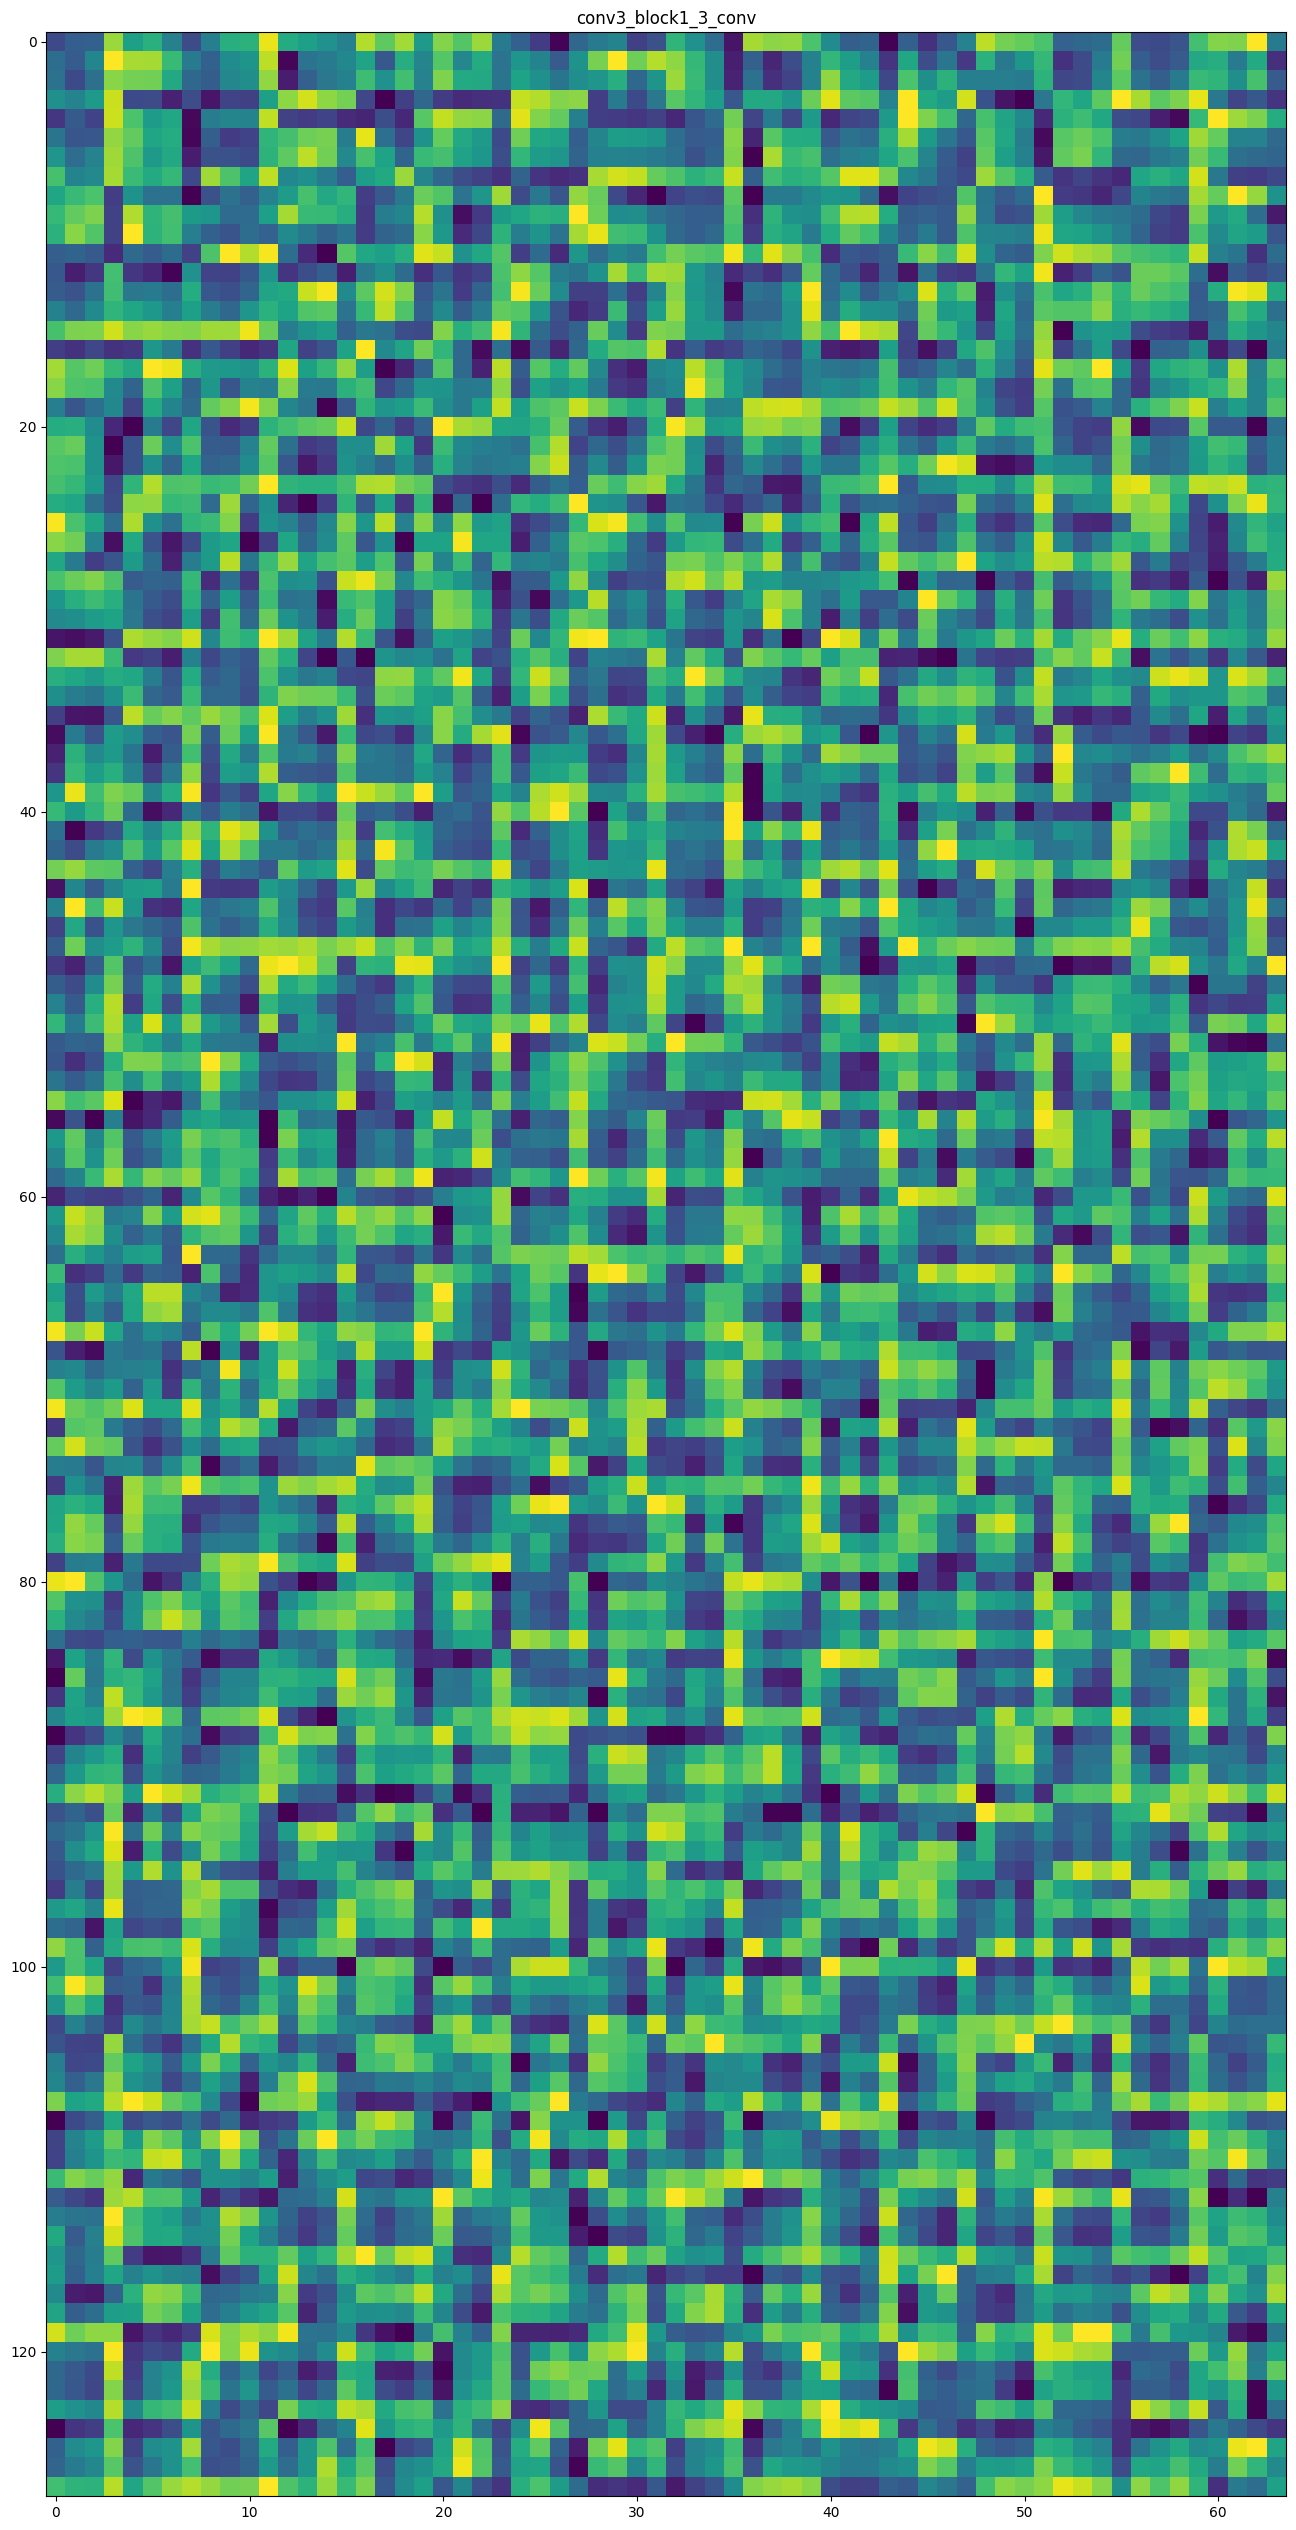

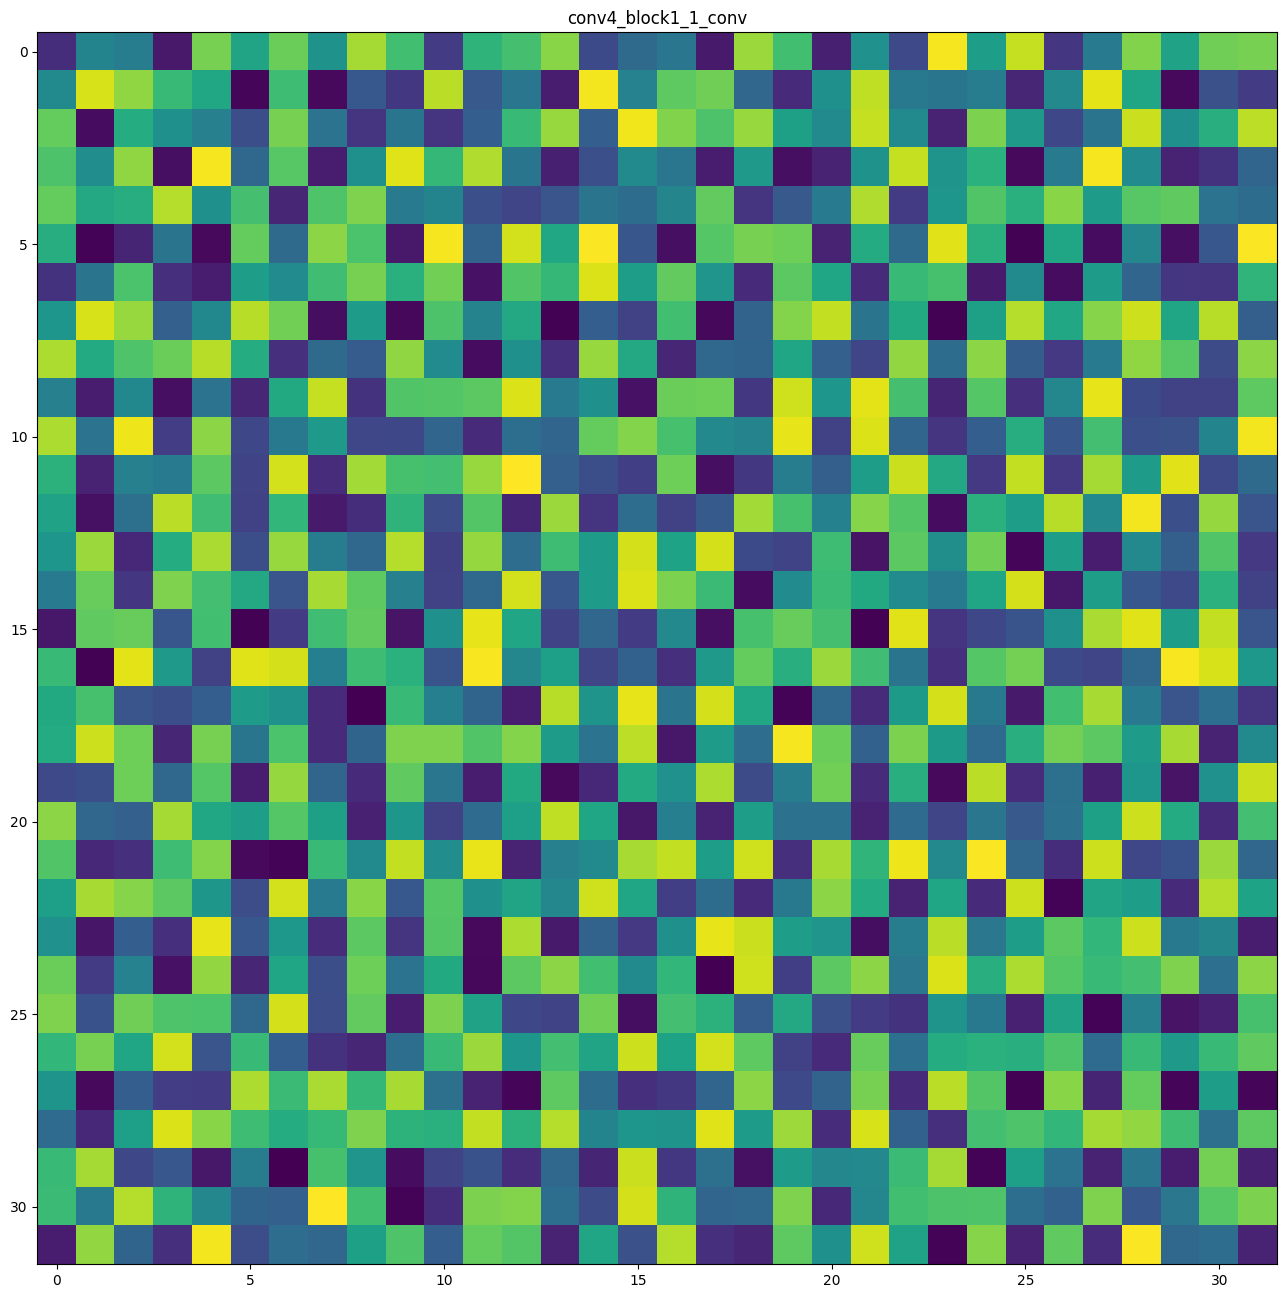

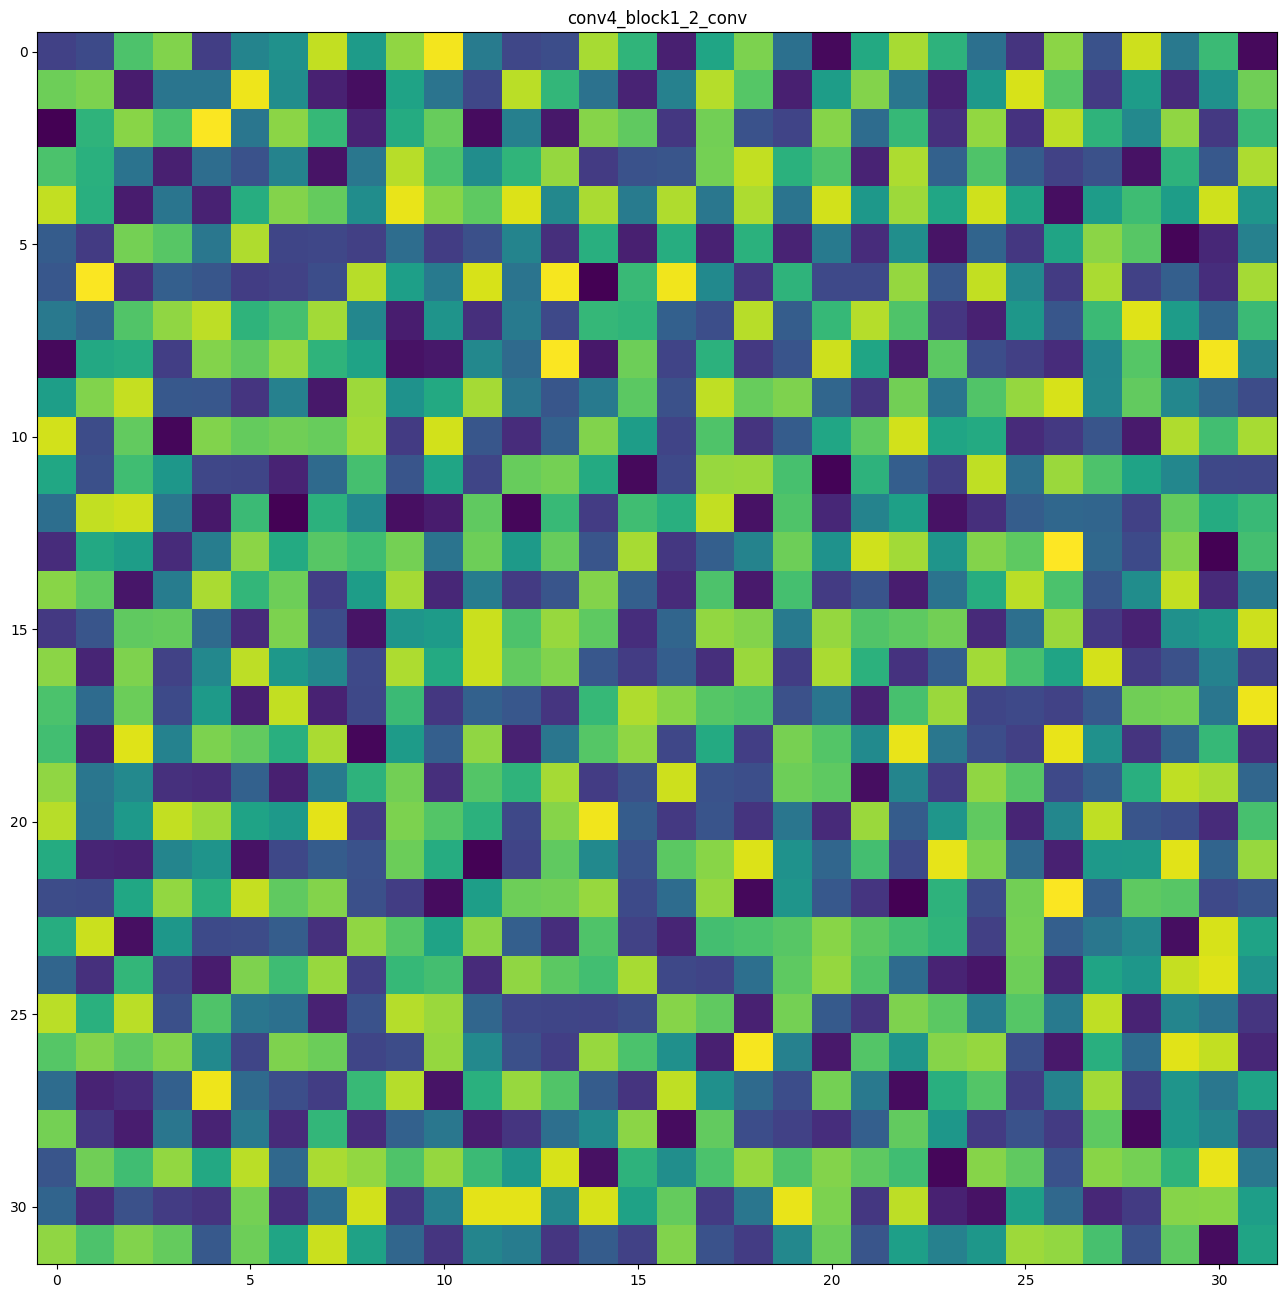

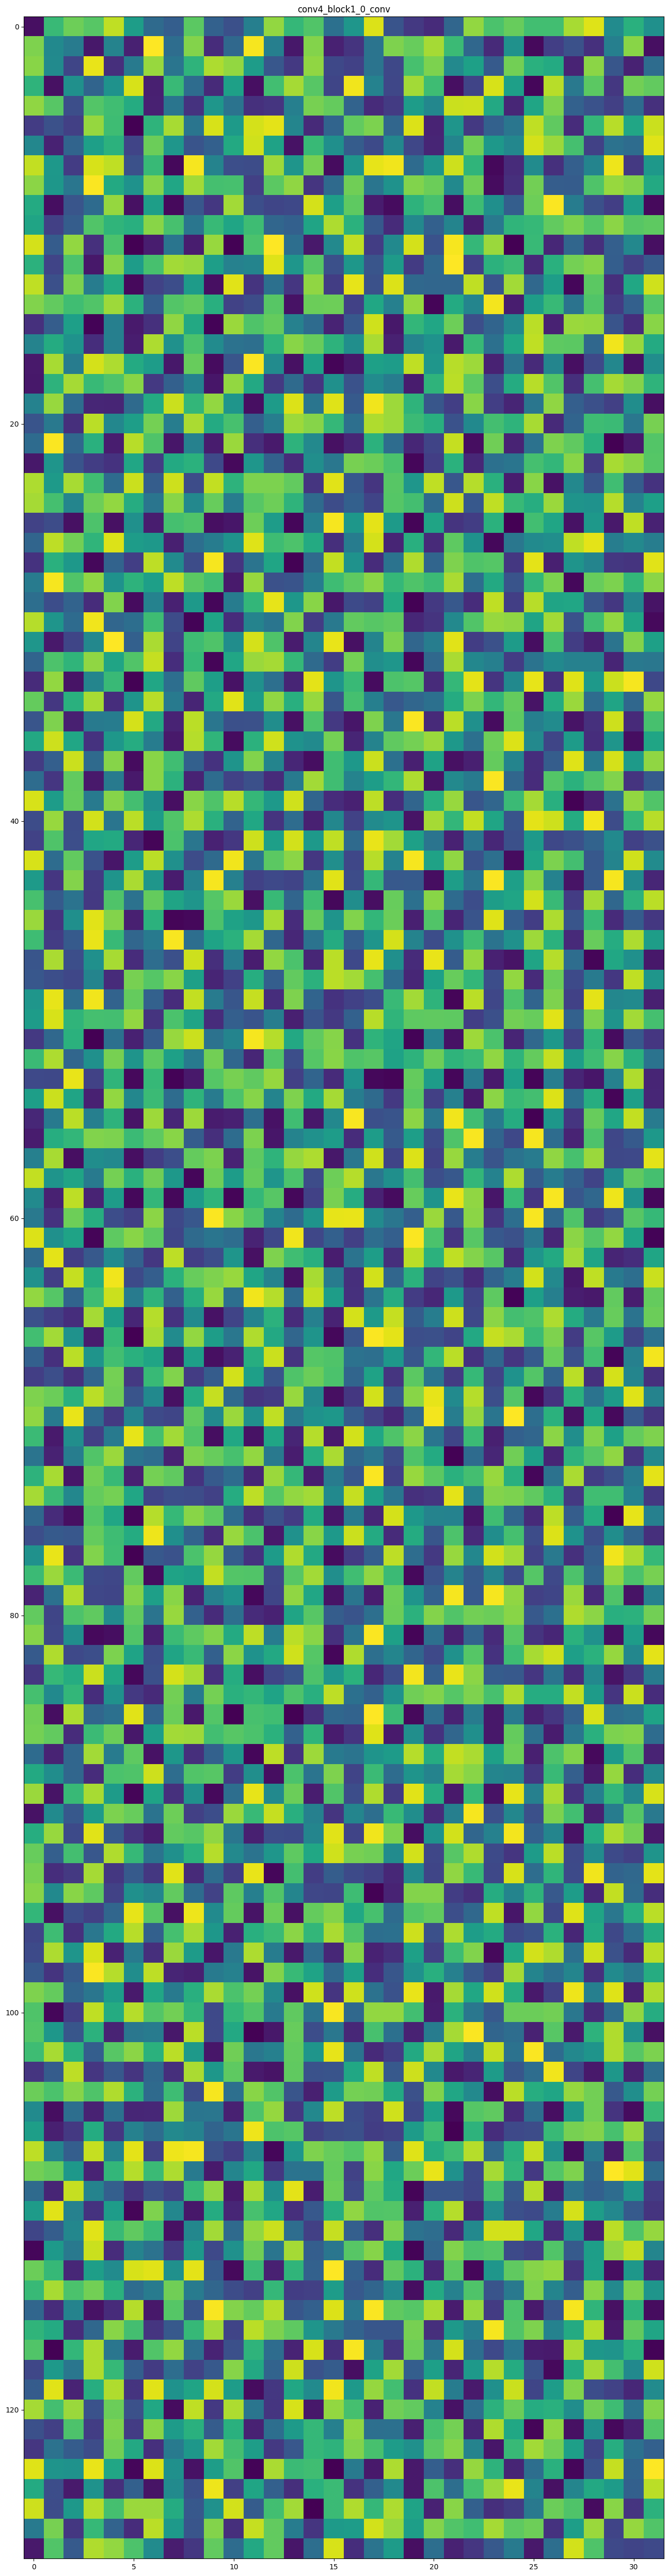

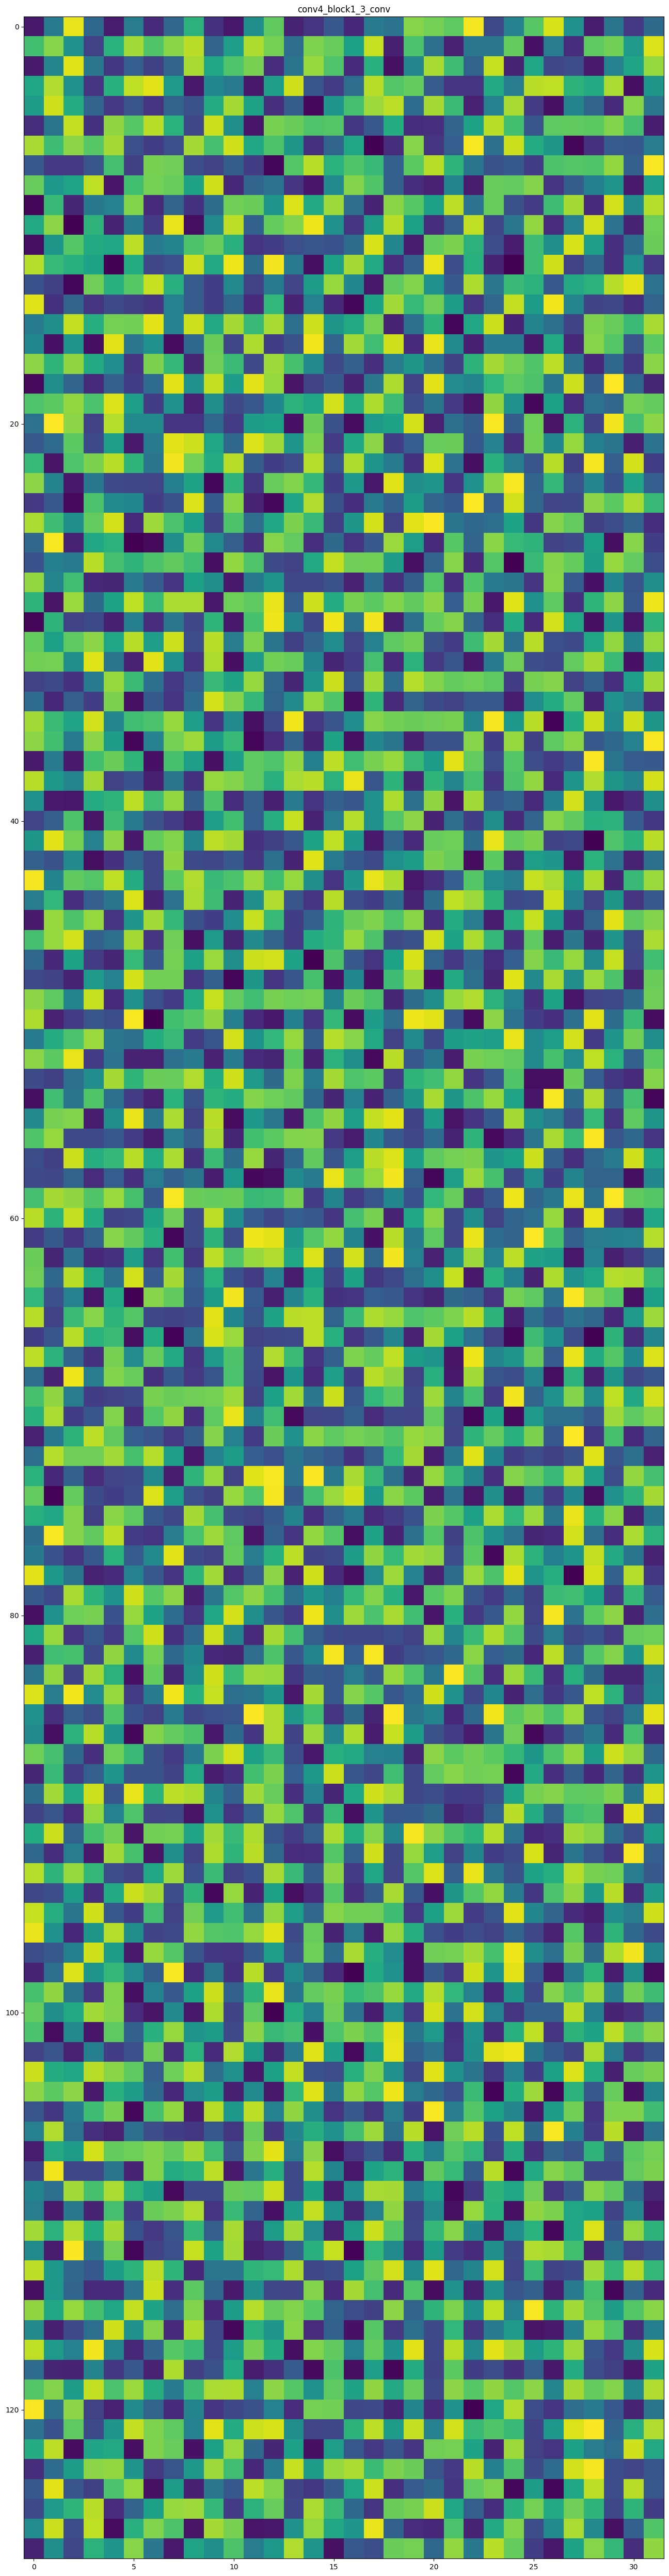

In [221]:
images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(block1_names, activations1):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()

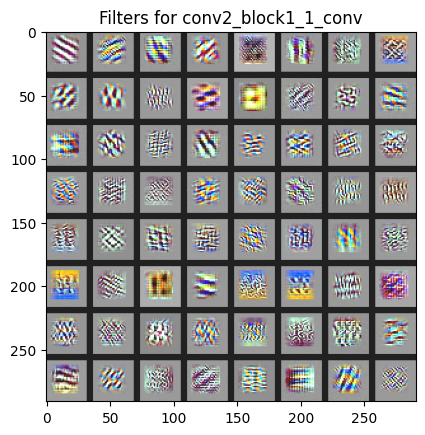

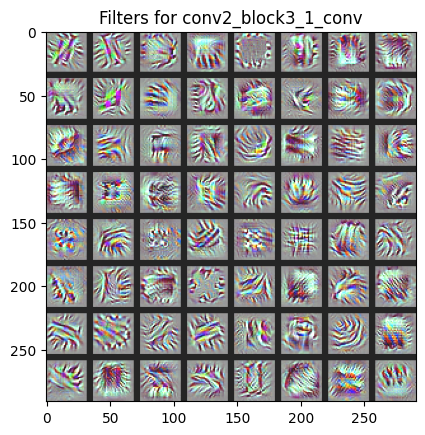

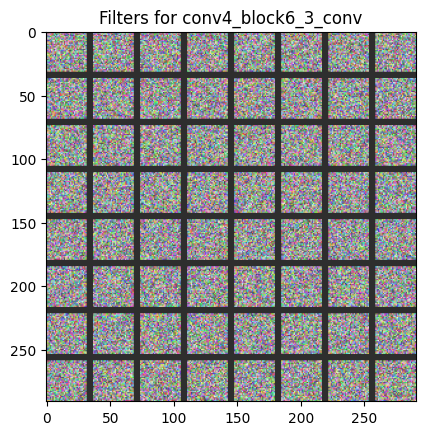

In [79]:
img_width, img_height, _ = X_test.shape[1:]
blocknames = ['conv2_block1_1_conv', 'conv2_block3_1_conv', 'conv4_block6_3_conv']
for l in blocknames:
  # Define the feature extractor
  layer_name = l
  feature_extractor = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
  layer = feature_extractor.get_layer(layer_name)
  num_filters = layer.output.shape[-1]

  all_images = []
  for filter_index in range(num_filters):
      image = deprocess_image(
          generate_filter_pattern(filter_index, layer)
      )
      all_images.append(image)

  margin = 5
  n = 8
  cropped_width = img_width
  cropped_height = img_height
  width = n * cropped_width + (n - 1) * margin
  height = n * cropped_height + (n - 1) * margin
  stitched_filters = np.zeros((width, height, 3))

  for i in range(n):
      for j in range(n):
          image = all_images[i * n + j]
          row_start = (cropped_width + margin) * i
          row_end = (cropped_width + margin) * i + cropped_width
          column_start = (cropped_height + margin) * j
          column_end = (cropped_height + margin) * j + cropped_height
          stitched_filters[
              row_start: row_end,
              column_start: column_end, :] = image

  plt.title("Filters for "+ layer_name)
  plt.imshow(deprocess_image(stitched_filters))
  plt.show()

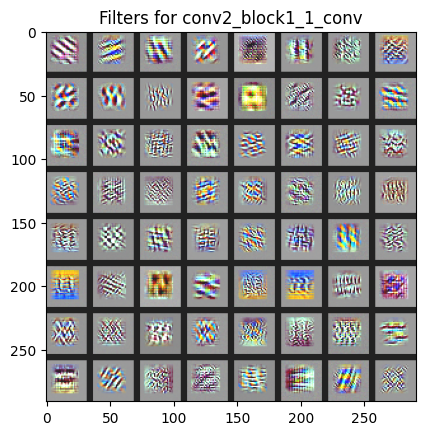

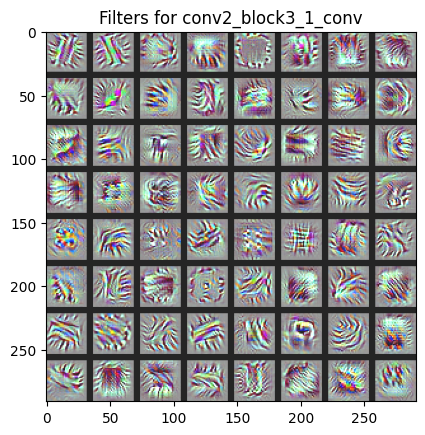

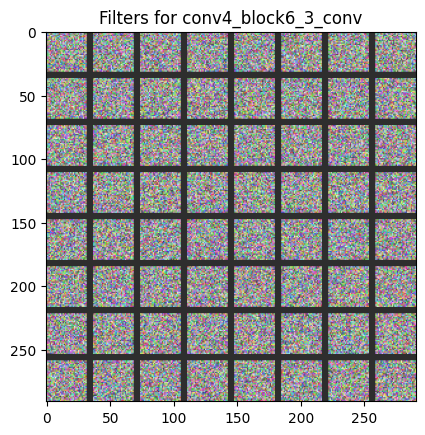

In [80]:
### After transfer learning #######


img_width, img_height, _ = X_test.shape[1:]
blocknames = ['conv2_block1_1_conv', 'conv2_block3_1_conv', 'conv4_block6_3_conv']
for l in blocknames:
  # Define the feature extractor
  layer_name = l
  feature_extractor = tf.keras.Model(inputs=ship_model.input, outputs=ship_model.get_layer(layer_name).output)
  layer = feature_extractor.get_layer(layer_name)
  num_filters = layer.output.shape[-1]

  all_images = []
  for filter_index in range(num_filters):
      image = deprocess_image(
          generate_filter_pattern(filter_index, layer)
      )
      all_images.append(image)

  margin = 5
  n = 8
  cropped_width = img_width
  cropped_height = img_height
  width = n * cropped_width + (n - 1) * margin
  height = n * cropped_height + (n - 1) * margin
  stitched_filters = np.zeros((width, height, 3))

  for i in range(n):
      for j in range(n):
          image = all_images[i * n + j]
          row_start = (cropped_width + margin) * i
          row_end = (cropped_width + margin) * i + cropped_width
          column_start = (cropped_height + margin) * j
          column_end = (cropped_height + margin) * j + cropped_height
          stitched_filters[
              row_start: row_end,
              column_start: column_end, :] = image

  plt.title("Filters for "+ layer_name)
  plt.imshow(deprocess_image(stitched_filters))
  plt.show()

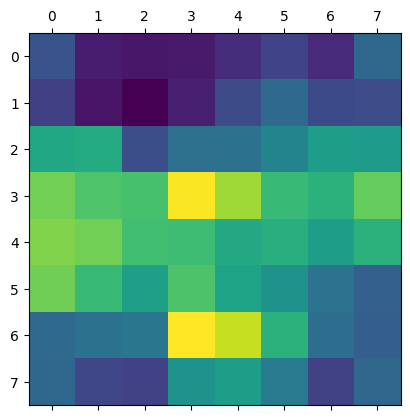

In [222]:
last_conv_layer_name = "conv2_block1_1_conv"
classifier_layer_names = [
 "avg_pool",
]
last_conv_layer = model.get_layer(last_conv_layer_name)
last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in classifier_layer_names:
  x = model.get_layer(layer_name)(x)
classifier_model = keras.Model(classifier_input, x)

with tf.GradientTape() as tape:
  last_conv_layer_output = last_conv_layer_model(sample_img)
  tape.watch(last_conv_layer_output)
  preds = classifier_model(last_conv_layer_output)
  top_pred_index = tf.argmax(preds[0])
  top_class_channel = preds[:, top_pred_index]

grads = tape.gradient(top_class_channel, last_conv_layer_output)

pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2)).numpy()
last_conv_layer_output = last_conv_layer_output.numpy()[0]
for i in range(pooled_grads.shape[-1]):
  last_conv_layer_output[:, :, i] *= pooled_grads[i]
heatmap = np.mean(last_conv_layer_output, axis=-1)

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)


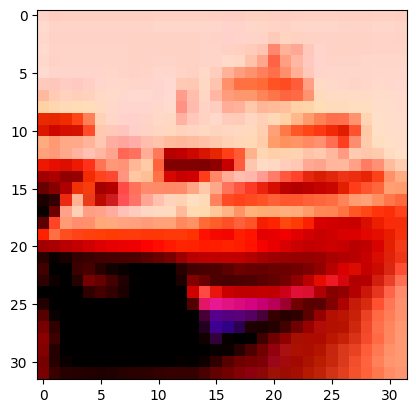

In [228]:
heatmap_resized = tf.image.resize(tf.expand_dims(heatmap, -1), (sample_img.shape[1], sample_img.shape[2])).numpy()
heatmap_jet = cm.jet(heatmap_resized[..., 0])
superimposed_img = (heatmap_jet[:, :, :3] * 0.4 + sample_img[0] * 0.6).clip(0, 1)
plt.imshow(superimposed_img*3)
plt.show()

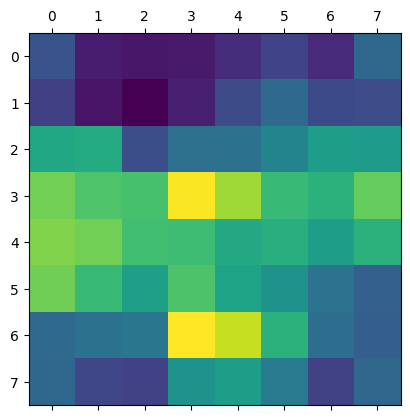

In [215]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
sample_img = X_test[1]
sample_img = sample_img.astype('float32')
sample_img = tf.keras.applications.resnet50.preprocess_input(sample_img)
sample_img = np.expand_dims(sample_img, axis=0)
sample_img /= 255

last_conv_layer_name = "conv2_block1_1_conv"
classifier_layer_names = [
 "avg_pool",

]
last_conv_layer = ship_model.get_layer(last_conv_layer_name)
last_conv_layer_model = keras.Model(ship_model.inputs, last_conv_layer.output)

classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in classifier_layer_names:
  x = ship_model.get_layer(layer_name)(x)
classifier_model = keras.Model(classifier_input, x)

with tf.GradientTape() as tape:
  last_conv_layer_output = last_conv_layer_model(sample_img)
  tape.watch(last_conv_layer_output)
  preds = classifier_model(last_conv_layer_output)
  top_pred_index = tf.argmax(preds[0])
  top_class_channel = preds[:, top_pred_index]

grads = tape.gradient(top_class_channel, last_conv_layer_output)

pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2)).numpy()
last_conv_layer_output = last_conv_layer_output.numpy()[0]
for i in range(pooled_grads.shape[-1]):
  last_conv_layer_output[:, :, i] *= pooled_grads[i]
heatmap = np.mean(last_conv_layer_output, axis=-1)

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)


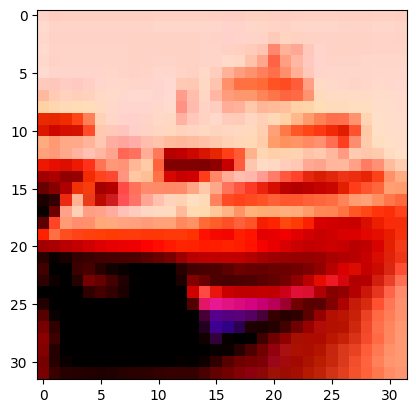

In [218]:
heatmap_resized = tf.image.resize(tf.expand_dims(heatmap, -1), (sample_img.shape[1], sample_img.shape[2])).numpy()
heatmap_jet = cm.jet(heatmap_resized[..., 0])
superimposed_img = (heatmap_jet[:, :, :3] * 0.4 + sample_img[0] * 0.6).clip(0, 1)
plt.imshow(superimposed_img*3)
plt.show()

**Conclusion:**

The two methods of transfer learning implemented in ship_model (P2), fine tuning and ConvNet as a fixed feature extractor, significantly improve the training time and the accuracy of the model and preserve resources by not having to train a new model from scratch.

The filters from the convolutional layers shown in P2 are identical before and after transfer learning, and this is due to the fact that the initial model weights are 'frozen' and untrainable when using it as a fixed feature extractor. The final Dense layer on the new model is the only layer that trains during model fitting.

This allows the new model to have much higher accuracy than a model from scratch because the new model can rule out if the item it is evaluating is actually an item it already knows, and therefore not a 'ship,' or generally, the new class it does not know.